Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# CoronaVirus Prediction

### Number of Day to Predict 42

In [1]:
%autosave 360

Autosaving every 360 seconds


In [2]:
num_days_R_prediction=42
num_BackTrack_Days=4

In [3]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [4]:
%%R
max_days_prediction<-num_days_R_prediction

In [5]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=24 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=50
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
## DROP_N=175 => 15/07
#
drop_n_dataset_days=235
#

### Load Data from Github - John Hopkins Institute 

In [6]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [7]:
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
249                                           NaN             Timor-Leste   
250                                           NaN                    Togo   
251                                           NaN     Trinidad and Tobago   
252                                           NaN                 Tunisia   
253                                           NaN                  Turkey   
254                                           NaN           United States   
255                                           NaN                  Uganda   
256                                           NaN                 Ukraine   
257                                           NaN    United Arab Emirates   
258                                      Anguilla          United Kingdom   
259                                       Bermuda          United Kingdom   
260                        British Virgin Islands          United Kingdom   
261                                Cayman Islands          United Kingdom   
262                               Channel Islands          United Kingdom   
263                   Falkland Islands (Malvinas)          United Kingdom   
264                                     Gibraltar          United Kingdom   
265                                   Isle of Man          United Kingdom   
266                                    Montserrat          United Kingdom   
267  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
268                      Turks and Caicos Islands          United Kingdom   
269                            

## Get Population

In [8]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [9]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
255                                           NaN             Timor-Leste   
256                                           NaN                    Togo   
257                                           NaN     Trinidad and Tobago   
258                                           NaN                 Tunisia   
259                                           NaN                  Turkey   
260                                           NaN           United States   
261                                           NaN                  Uganda   
262                                           NaN                 Ukraine   
263                                           NaN    United Arab Emirates   
264                                      Anguilla          United Kingdom   
265                                       Bermuda          United Kingdom   
266                        British Virgin Islands          United Kingdom   
267                                Cayman Islands          United Kingdom   
268                               Channel Islands          United Kingdom   
269                   Falkland Islands (Malvinas)          United Kingdom   
270                                     Gibraltar          United Kingdom   
271                                   Isle of Man          United Kingdom   
272                                    Montserrat          United Kingdom   
273  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
274                      Turks and Caicos Islands          United Kingdom   
275                            

In [10]:
# merge region death
death.iloc[185:195,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN             Malta  35.937500   14.375400        0        0   
186            NaN  Marshall Islands   7.131500  171.184500        0        0   
187            NaN        Mauritania  21.007900  -10.940800        0        0   
188            NaN         Mauritius -20.348404   57.552152        0        0   
189            NaN            Mexico  23.634500 -102.552800        0        0   
190            NaN        Micronesia   7.425600  150.550800        0        0   
191            NaN           Moldova  47.411600   28.369900        0        0   
192            NaN            Monaco  43.733300    7.416700        0        0   
193            NaN          Mongolia  46.862500  103.846700        0        0   
194            NaN        Montenegro  42.708678   19.374390        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  9/10/21  9/11/21  9/12/21  \
185        0        0        0        0  ...      446      447      449   
186        0        0        0        0  ...        0        0        0   
187        0        0        0        0  ...      747      749      754   
188        0        0        0        0  ...       37       42       42   
189        0        0        0        0  ...   266150   267524   267748   
190        0        0        0        0  ...        0        0        0   
191        0        0        0        0  ...     6492     6507     6521   
192        0        0        0        0  ...       33       33       33   
193        0        0        0        0  ...     1007     1021     1046   
194        0        0        0        0  ...     1792     1798     1800   

     9/13/21  9/14/21  9/15/21  9/16/21  9/17/21   Population   \
185      449      449      450      452      453       441,543   
186        0        0        0        0        0           NaN   
187      760      760      760      761      763     4,649,658   
188       43       45       45       48       50     1,273,985   
189   267969   269016   269913   270348   270538   128,640,794   
190        0        0        0        0        0           NaN   
191     6536     6548     6559     6569     6578     4,035,942   
192       33       33       33       33       33        39,183   
193     1046     1056     1074     1074     1083     3,278,290   
194     1806     1813     1818     1822     1832       622 500   

                   region  
185             Malta_nan  
186  Marshall Islands_nan  
187        Mauritania_nan  
188         Mauritius_nan  
189            Mexico_nan  
190        Micronesia_nan  
191           Moldova_nan  
192            Monaco_nan  
193          Mongolia_nan  
194        Montenegro_nan  

[10 rows x 611 columns]

In [11]:
# merge region recover
recover.iloc[175:185,:]

Province/State Country/Region        Lat       Long  \
175                               NaN         Monaco  43.733300    7.41670   
176                               NaN       Mongolia  46.862500  103.84670   
177                               NaN     Montenegro  42.708678   19.37439   
178                               NaN        Morocco  31.791700   -7.09260   
179                               NaN     Mozambique -18.665700   35.52960   
180                               NaN        Namibia -22.957600   18.49040   
181                               NaN          Nepal  28.166700   84.25000   
182                             Aruba    Netherlands  12.521100  -69.96830   
183  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.23850   
184                           Curacao    Netherlands  12.169600  -68.99000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  9/10/21  \
175        0        0        0        0        0        0  ...        0   
176        0        0        0        0        0        0  ...        0   
177        0        0        0        0        0        0  ...        0   
178        0        0        0        0        0        0  ...        0   
179        0        0        0        0        0        0  ...        0   
180        0        0        0        0        0        0  ...        0   
181        0        0        0        0        0        0  ...        0   
182        0        0        0        0        0        0  ...        0   
183        0        0        0        0        0        0  ...        0   
184        0        0        0        0        0        0  ...        0   

     9/11/21  9/12/21  9/13/21  9/14/21  9/15/21  9/16/21  9/17/21  \
175        0        0        0        0        0        0        0   
176        0        0        0        0        0        0        0   
177        0        0        0        0        0        0        0   
178        0        0        0        0        0        0        0   
179        0        0        0        0        0        0        0   
180        0        0        0        0        0        0        0   
181        0        0        0        0        0        0        0   
182        0        0        0        0        0        0        0   
183        0        0        0        0        0        0        0   
184        0        0        0        0        0        0        0   

      Population                                         region  
175        39,183                                    Monaco_nan  
176     3,278,290                                  Mongolia_nan  
177       622 500                                Montenegro_nan  
178    36,817,128                                   Morocco_nan  
179    31,542,919                                Mozambique_nan  
180     2,540,905                                   Namibia_nan  
181    29,300,000                                     Nepal_nan  
182       116,600                             Netherlands_Aruba  
183        26,000  Netherlands_Bonaire, Sint Eustatius and Saba  
184       158,665                           Netherlands_Curacao  

[10 rows x 611 columns]

In [12]:
confirmed.iloc[185:195,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN             Malta  35.937500   14.375400        0        0   
186            NaN  Marshall Islands   7.131500  171.184500        0        0   
187            NaN        Mauritania  21.007900  -10.940800        0        0   
188            NaN         Mauritius -20.348404   57.552152        0        0   
189            NaN            Mexico  23.634500 -102.552800        0        0   
190            NaN        Micronesia   7.425600  150.550800        0        0   
191            NaN           Moldova  47.411600   28.369900        0        0   
192            NaN            Monaco  43.733300    7.416700        0        0   
193            NaN          Mongolia  46.862500  103.846700        0        0   
194            NaN        Montenegro  42.708678   19.374390        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  9/10/21  9/11/21  9/12/21  \
185        0        0        0        0  ...    36674    36708    36758   
186        0        0        0        0  ...        4        4        4   
187        0        0        0        0  ...    34692    34771    34878   
188        0        0        0        0  ...    12783    13114    13114   
189        0        0        0        0  ...  3479999  3506743  3511882   
190        0        0        0        0  ...        1        1        1   
191        0        0        0        0  ...   273918   274599   274812   
192        0        0        0        0  ...     3273     3275     3276   
193        0        0        0        0  ...   249408   252648   257770   
194        0        0        0        0  ...   120723   121351   121908   

     9/13/21  9/14/21  9/15/21  9/16/21  9/17/21   Population   \
185    36793    36843    36875    36900    36927       441,543   
186        4        4        4        4        4           NaN   
187    34950    35042    35142    35212    35328     4,649,658   
188    13289    13782    13782    14073    14243     1,273,985   
189  3516043  3528972  3542189  3549229  3552983   128,640,794   
190        1        1        1        1        1           NaN   
191   275558   276701   277854   279143   280175     4,035,942   
192     3281     3284     3285     3288     3290        39,183   
193   257770   260709   266680   266680   269476     3,278,290   
194   122364   123129   123755   124485   125128       622 500   

                   region  
185             Malta_nan  
186  Marshall Islands_nan  
187        Mauritania_nan  
188         Mauritius_nan  
189            Mexico_nan  
190        Micronesia_nan  
191           Moldova_nan  
192            Monaco_nan  
193          Mongolia_nan  
194        Montenegro_nan  

[10 rows x 611 columns]

In [13]:
confirmed.iloc[220:230,:]

Province/State                    Country/Region        Lat        Long  \
220            NaN                          Portugal  39.399900   -8.224500   
221            NaN                             Qatar  25.354800   51.183900   
222            NaN                           Romania  45.943200   24.966800   
223            NaN                            Russia  61.524010  105.318756   
224            NaN                            Rwanda  -1.940300   29.873900   
225            NaN             Saint Kitts and Nevis  17.357822  -62.782998   
226            NaN                       Saint Lucia  13.909400  -60.978900   
227            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
228            NaN                             Samoa -13.759000 -172.104600   
229            NaN                        San Marino  43.942400   12.457800   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  9/10/21  \
220        0        0        0        0        0        0  ...  1053450   
221        0        0        0        0        0        0  ...   234362   
222        0        0        0        0        0        0  ...  1115901   
223        0        0        0        0        0        0  ...  7000636   
224        0        0        0        0        0        0  ...    92025   
225        0        0        0        0        0        0  ...     1352   
226        0        0        0        0        0        0  ...     9403   
227        0        0        0        0        0        0  ...     2421   
228        0        0        0        0        0        0  ...        3   
229        0        0        0        0        0        0  ...     5373   

     9/11/21  9/12/21  9/13/21  9/14/21  9/15/21  9/16/21  9/17/21  \
220  1054673  1055584  1056042  1057100  1058347  1059409  1060432   
221   234509   234642   234773   234895   235054   235187   235304   
222  1118549  1120804  1122653  1126582  1130586  1135027  1139505   
223  7019200  7037435  7055296  7072825  7091368  7110656  7130245   
224    92025    92620    93079    93567    94055    94478    94893   
225     1439     1464     1476     1510     1556     1589     1589   
226     9527     9823     9823     9971    10082    10217    10344   
227     2446     2446     2487     2521     2559     2613     2613   
228        3        3        3        3        3        3        3   
229     5373     5373     5388     5399     5402     5408     5412   

      Population                                 region  
220    10,290,000                          Portugal_nan  
221     2,870,256                             Qatar_nan  
222    19,530,000                           Romania_nan  
223   144,500,000                            Russia_nan  
224    12,952,218                            Rwanda_nan  
225           NaN             Saint Kitts and Nevis_nan  
226       184,106                       Saint Lucia_nan  
227       110,940  Saint Vincent and the Grenadines_nan  
228           NaN                             Samoa_nan  
229        33,916                        San Marino_nan  

[10 rows x 611 columns]

## Create Time Series + Plots

In [14]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [15]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [16]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

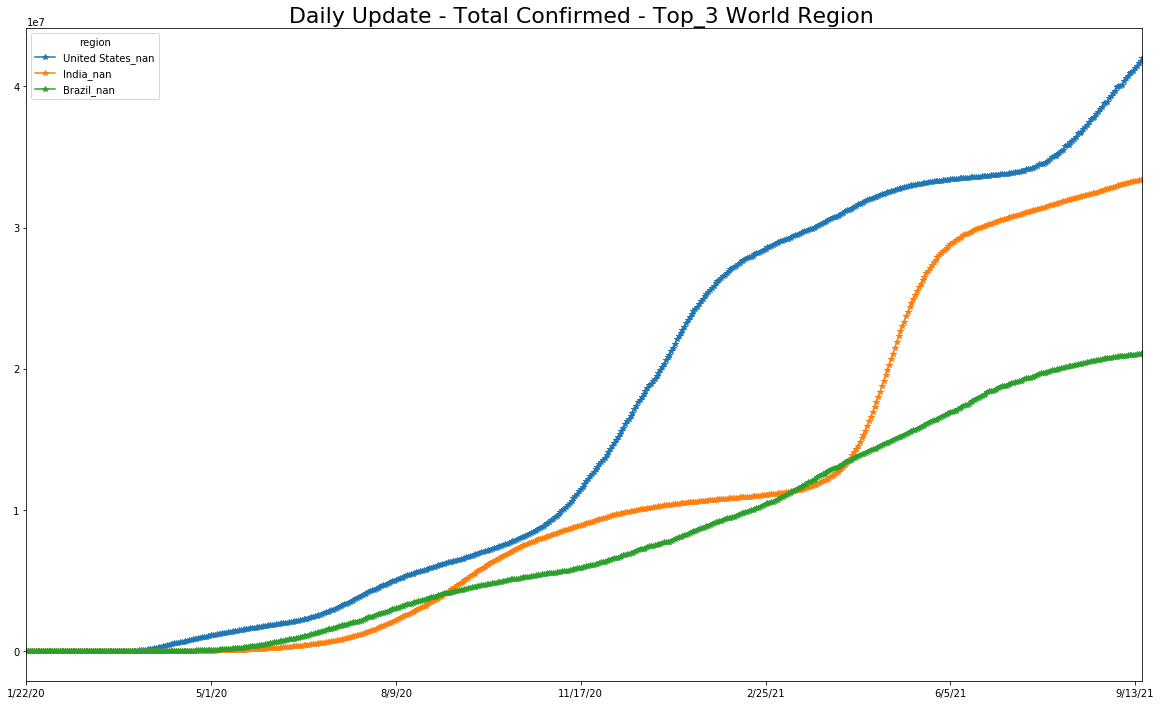

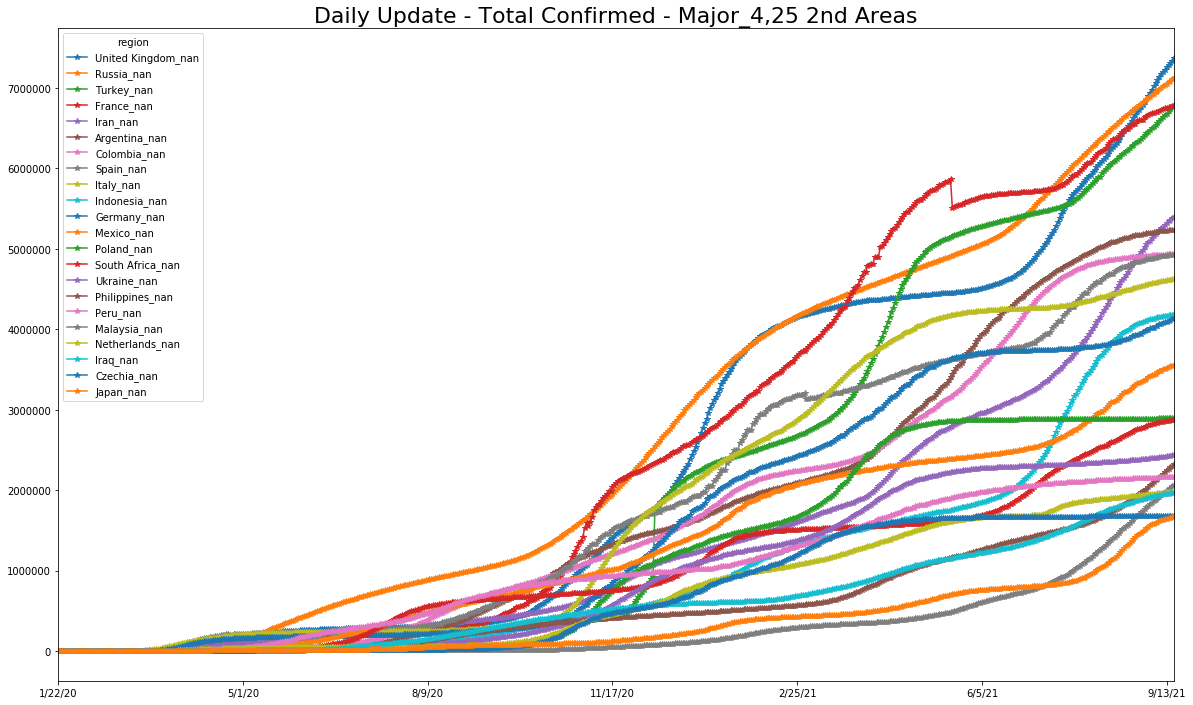

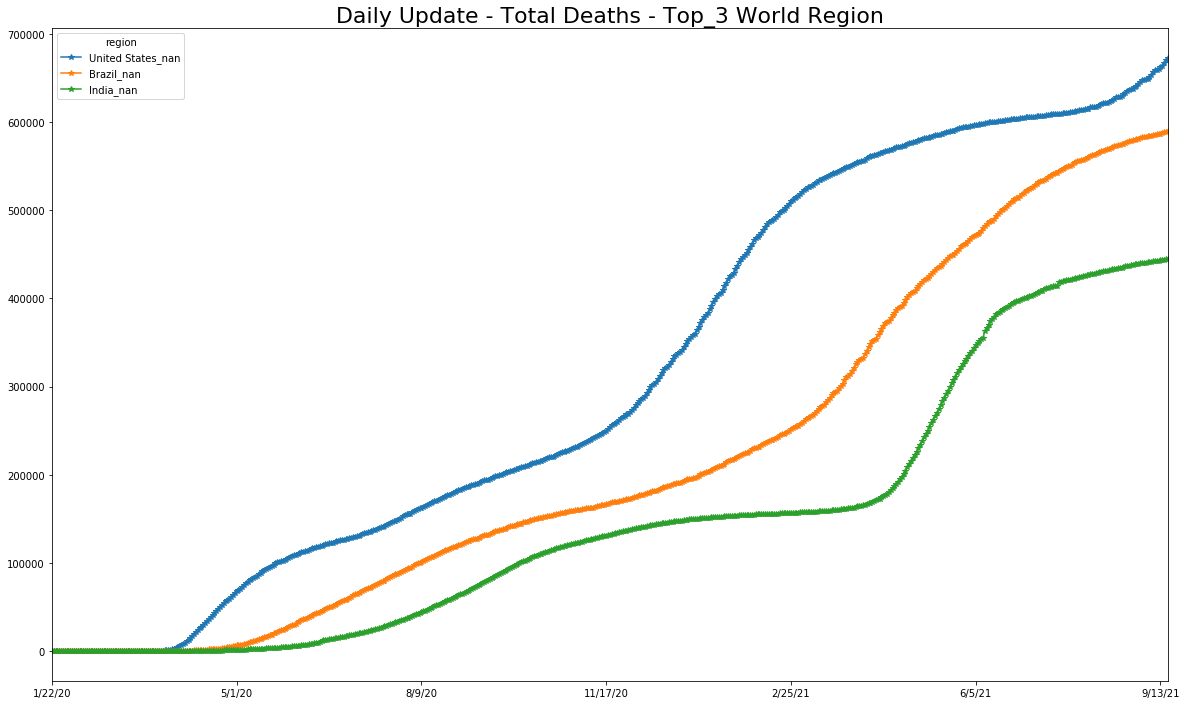

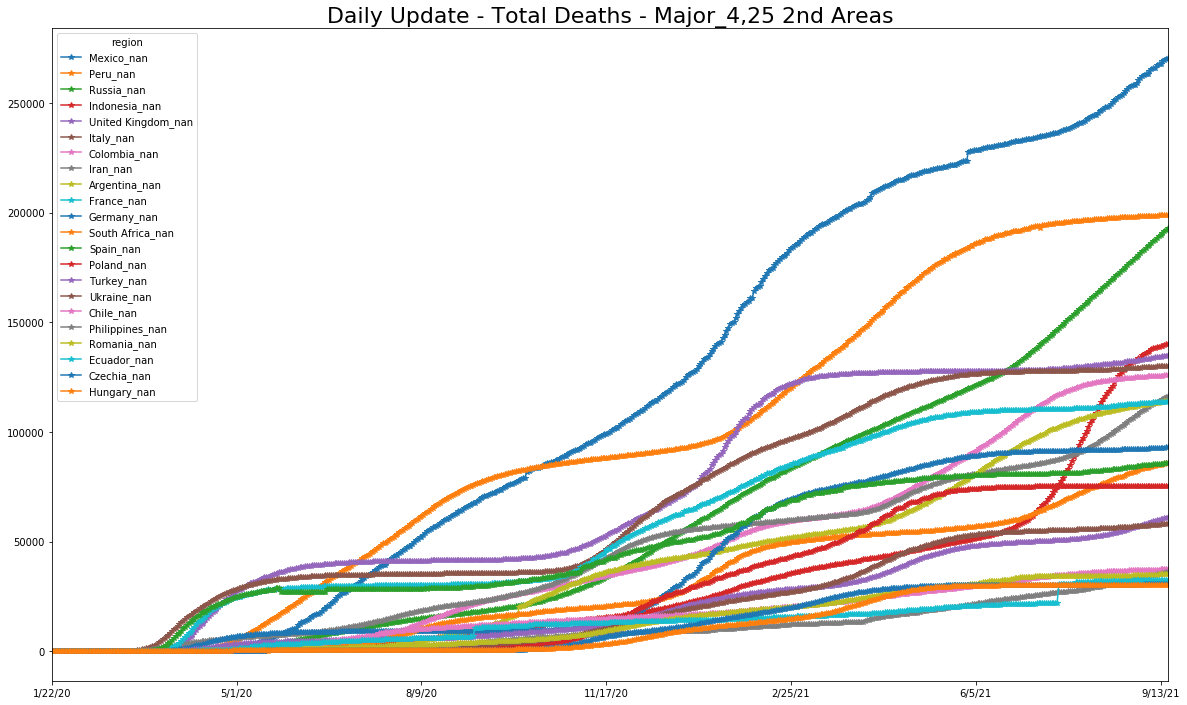

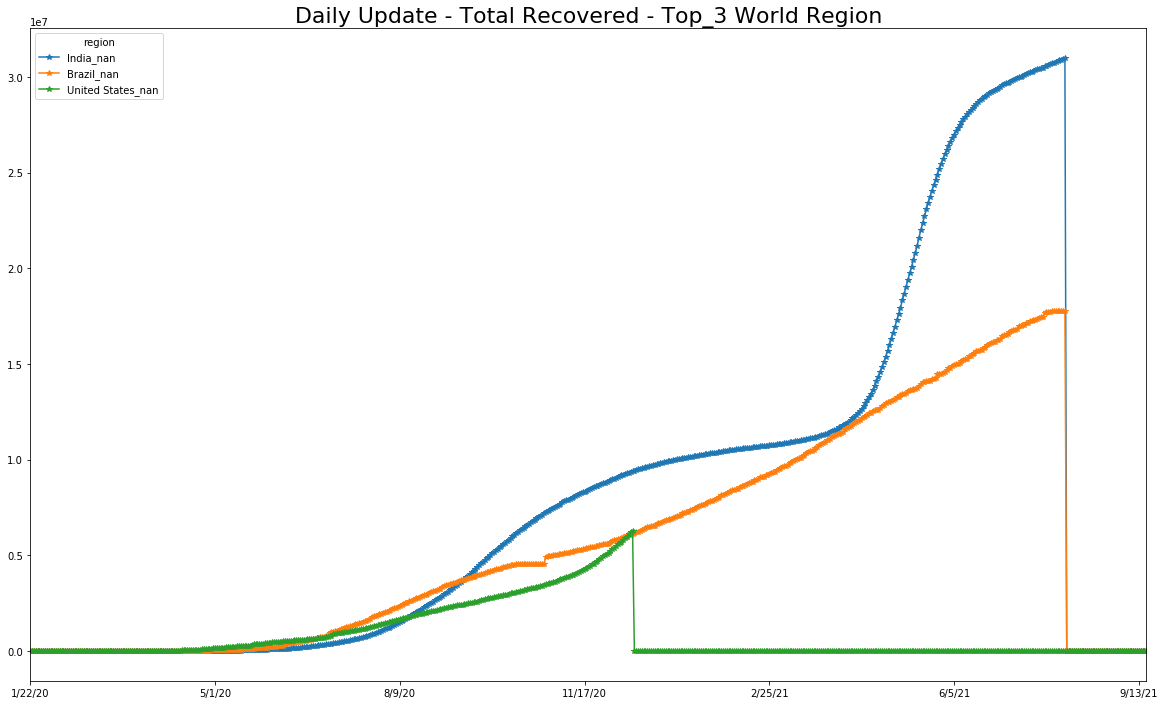

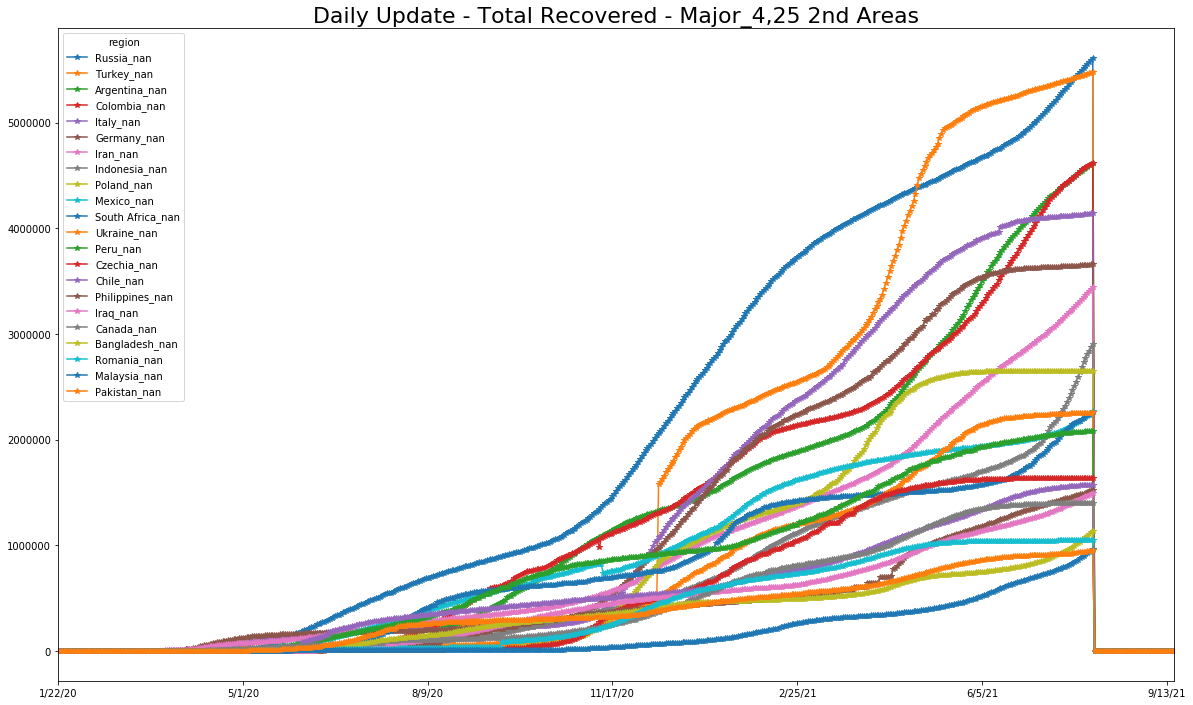

In [17]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [18]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime

#
api_key="29d9e51c56b94621b16297bcdeee9c4d" # hxj@mail.xcom
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [19]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [20]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2021/09/18


In [21]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [22]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [23]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [24]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
9/13/20            38802        11353        48254         1344        3388   
9/14/20            38858        11520        48496         1438        3439   
9/15/20            38901        11672        48734         1438        3569   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
9/13/20                       95         555537        45862   
9/14/20                       95         565446        45969   
9/15/20                       95         577338        46119   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
9/13/20                                     113                       4170   
9/14/20                                     113                       4177   
9/15/20                                     113                       4185   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
9/13/20  ...            6522118         1808           47287            0   
9/14/20  ...            6555366         1812           47836            0   
9/15/20  ...            6594827         1827           48429            0   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
9/13/20          60540         1063                   30574       2011   
9/14/20          61569         1063                   31362       2013   
9/15/20          62655         1063                   32250       2016   

region   Zambia_nan  Zimbabwe_nan  
9/13/20       13539          7526  
9/14/20       13720          7531  
9/15/20       13819          7576  

[3 rows x 279 columns]

In [25]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
9/14/21           154180       158431       200528        15099       51047   
9/15/21           154283       159423       200770        15108       51407   
9/16/21           154361       160365       200989        15113       51827   
9/17/21           154487       161324       201224        15124       52208   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
9/14/21                     2304        5229848       249803   
9/15/21                     2304        5232358       250559   
9/16/21                     2304        5234851       251323   
9/17/21                     2603        5237159       252082   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
9/14/21                                     665                      47007   
9/15/21                                     680                      48341   
9/16/21                                     710                      49611   
9/17/21                                     725                      50919   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
9/14/21  ...           41461662       387028          165421            4   
9/15/21  ...           41627946       387156          166025            4   
9/16/21  ...           41785903       387299          166644            4   
9/17/21  ...           41993789       387449          167268            4   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
9/14/21         348873       635055                  374768       8502   
9/15/21         349731       645640                  377134       8527   
9/16/21         350795       656129                  379635       8557   
9/17/21         353401       667650                  381854       8593   

region   Zambia_nan  Zimbabwe_nan  
9/14/21      208049        126817  
9/15/21      208161        127083  
9/16/21      208267        127368  
9/17/21      208353        127632  

[4 rows x 279 columns]

In [26]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [27]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [28]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [29]:
p=%R pred_all

In [30]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [31]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [32]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [33]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [34]:
w_in_model.tail(2)

date       region   min   max
8379 2020-05-10  Vietnam_nan  26.9  33.0
8380 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [35]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [36]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [37]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1      2020-09-14  Afghanistan_nan      38858             0             0   
2      2020-09-15  Afghanistan_nan      38901            56             0   
3      2020-09-16  Afghanistan_nan      38941            43             0   
4      2020-09-17  Afghanistan_nan      38958            40           139   
5      2020-09-18  Afghanistan_nan      38969            17           100   
6      2020-09-19  Afghanistan_nan      39005            11            68   
7      2020-09-20  Afghanistan_nan      39130            36            64   
8      2020-09-21  Afghanistan_nan      39160           125           172   
9      2020-09-22  Afghanistan_nan      39182            30           191   
10     2020-09-23  Afghanistan_nan      39231            22           177   
11     2020-09-24  Afghanistan_nan      39256            49           101   
12     2020-09-25  Afghanistan_nan      39272            25            96   
13     2020-09-26  Afghanistan_nan      39278            16            90   
14     2020-09-27  Afghanistan_nan      39313             6            47   
15     2020-09-28  Afghanistan_nan      39325            35            57   
16     2020-09-29  Afghanistan_nan      39340            12            53   
17     2020-09-30  Afghanistan_nan      39354            15            62   
18     2020-10-01  Afghanistan_nan      39371            14            41   
19     2020-10-02  Afghanistan_nan      39376            17            46   
20     2020-10-03  Afghanistan_nan      39383             5            36   
21     2020-10-04  Afghanistan_nan      39427             7            29   
22     2020-10-05  Afghanistan_nan      39508            44            56   
23     2020-10-06  Afghanistan_nan      39572            81           132   
24     2020-10-07  Afghanistan_nan      39634            64           189   
25     2020-10-08  Afghanistan_nan      39702            62           207   
26     2020-10-09  Afghanistan_nan      39779            68           194   
27     2020-10-10  Afghanistan_nan      39789            77           207   
28     2020-10-11  Afghanistan_nan      39885            10           155   
29     2020-10-12  Afghanistan_nan      39956            96           183   
30     2020-10-13  Afghanistan_nan      40014            71           177   
...           ...              ...        ...           ...           ...   
105705 2021-08-20     Zimbabwe_nan     121902           404          1814   
105706 2021-08-21     Zimbabwe_nan     122487             0           856   
105707 2021-08-22     Zimbabwe_nan     122652           585           989   
105708 2021-08-23     Zimbabwe_nan     123001           165           750   
105709 2021-08-24     Zimbabwe_nan     123320           349          1099   
105710 2021-08-25     Zimbabwe_nan     123711           319           833   
105711 2021-08-26     Zimbabwe_nan     123986           391          1059   
105712 2021-08-27     Zimbabwe_nan     124236           275           985   
105713 2021-08-28     Zimbabwe_nan     124367           250           916   
105714 2021-08-29     Zimbabwe_nan     124437           131           656   
105715 2021-08-30     Zimbabwe_nan     124581            70           451   
105716 2021-08-31     Zimbabwe_nan     124773           144           345   
105717 2021-09-01     Zimbabwe_nan     124960           192           406   
105718 2021-09-02     Zimbabwe_nan     125118           187           523   
105719 2021-09-03     Zimbabwe_nan     125331           158           537   
105720 2021-09-04     Zimbabwe_nan     125425           213           558   
105721 2021-09-05     Zimbabwe_nan     125550            94           465   
105722 2021-09-06     Zimbabwe_nan     125671           125           432   
105723 2021-09-07     Zimbabwe_nan     125796           121           340   
105724 2021-09-08     Zimbabwe_nan     125931           125           371   
105725 20

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [39]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
105734 2021-09-18  Zimbabwe_nan          0           264           815   

        7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
105734          1469         100.207281         100.642666         101.164375   

        last_day  kalman_prediction  population  infected_rate  min  max  
105734    127632           127783.0    14862924       0.000086  NaN  NaN

In [40]:
## JOAO - FIX Drop Duplicates
train=train.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
## JOAO - FIX Drop empty region='nan_nan'
train=train[train['region']!='nan_nan']
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
105734 2021-09-18  Zimbabwe_nan          0           264           815   

        7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
105734          1469         100.207281         100.642666         101.164375   

        last_day  kalman_prediction  population  infected_rate  min  max  
105734    127632           127783.0    14862924       0.000086  NaN  NaN

In [41]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
### Assumption : Each affected person can contact up to 9 others that not report or are assimptomatic COVID19 cases.
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=np.clip(ratiod['infected_rate']*900,0.0,1.0)
#
ratiod['delta : pred new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : pred new_cases per 1M hab']=ratiod['delta : pred new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
103506  2021-09-16  Zimbabwe_nan     127368           266           814   
103507  2021-09-17  Zimbabwe_nan     127632           285           969   
103508  2021-09-18  Zimbabwe_nan          0           264           815   

        7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
103506          1152         100.209759         100.644663         100.914795   
103507          1312         100.224271         100.766628         101.040815   
103508          1469         100.207281         100.642666         101.164375   

        confirmed_yesterday  ...  population  infected_rate  min  max  \
103506               127083  ...    14862924       0.000086  NaN  NaN   
103507               127368  ...    14862924       0.000086  NaN  NaN   
103508               127632  ...    14862924       0.000086  NaN  NaN   

        population_percentage : infected_rate confirmed  \
103506                                         0.008550   
103507                                         0.008570   
103508                                         0.008587   

        population_percentage : factor 9/10 infected_rate confirmed  \
103506                                           0.076954             
103507                                           0.077126             
103508                                           0.077286             

        delta : pred new_cases  delta : pred new_cases per 1M hab  \
103506                    26.0                           1.749319   
103507                    83.0                           5.584365   
103508                   151.0                          10.159508   

        delta : roling 7day AVG  \
103506               164.571429   
103507               187.428571   
103508               209.857143   

        delta : aprox 14-day case notification rate per 100k hab  
103506                                          15.501660         
103507                                          17.654669         
103508                                          19.767308         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse            mae
269  United States_nan  4.800412e+12  2.190984e+06  142956.008108


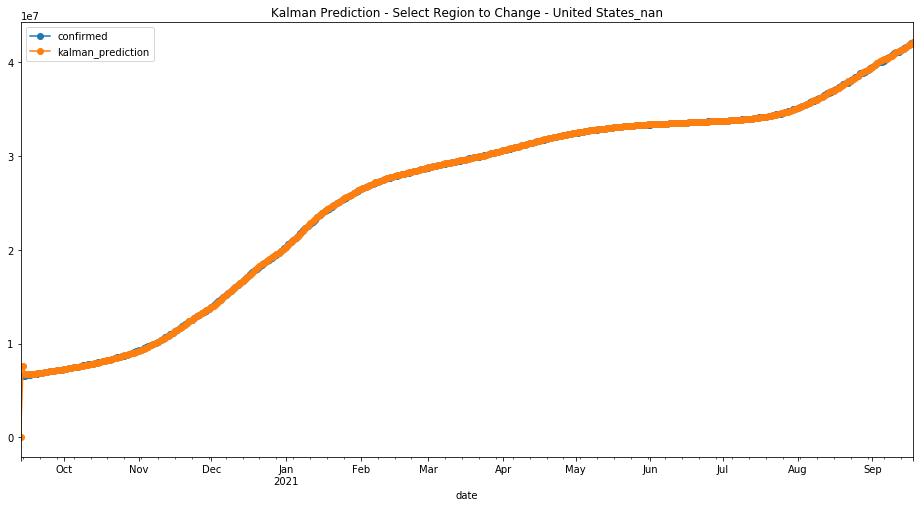

In [42]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse           rmse           mae
217  Russia_nan  1.381596e+11  371698.225467  21354.037838


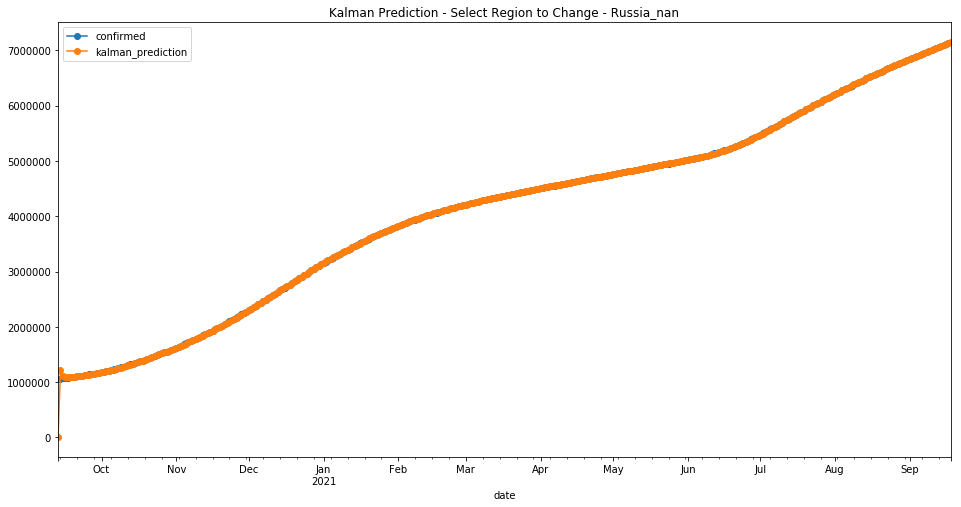

In [43]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse           mae
30  Brazil_nan  1.204356e+12  1.097431e+06  78352.405405


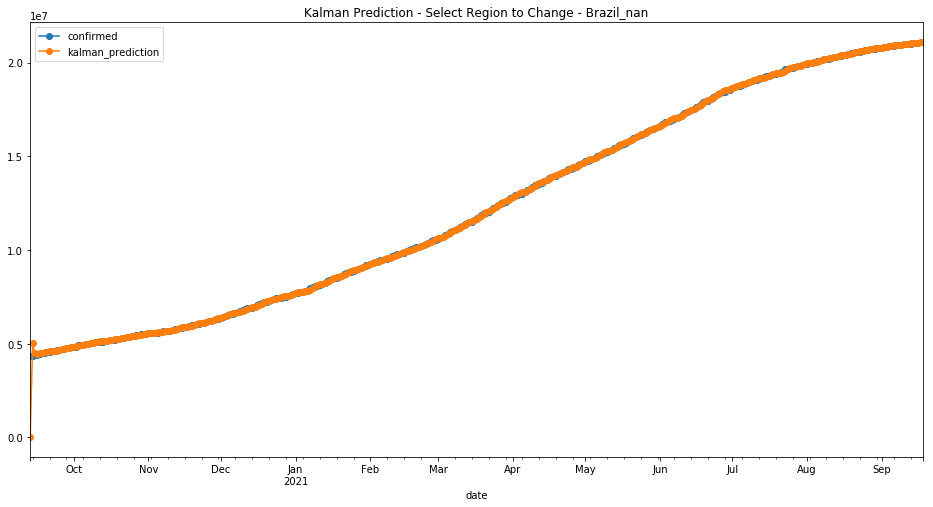

In [44]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse           rmse           mae
268  United Kingdom_nan  1.480722e+11  384801.517343  24997.327027


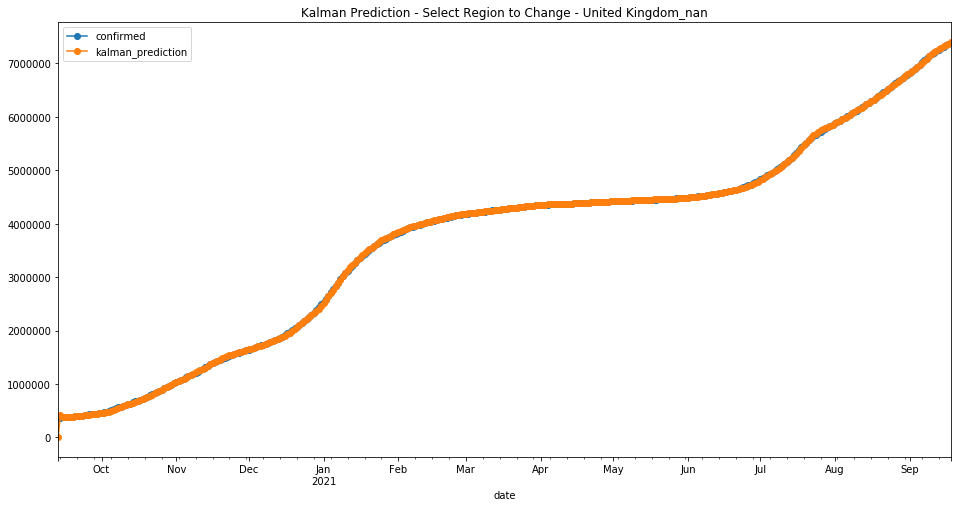

In [45]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [46]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpymy1dg9_
  JVM stdout: /tmp/tmpymy1dg9_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpymy1dg9_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    2 years, 10 months and 22 days !!!
H2O cluster name:           H2O_from_python_unknownUser_ndzf2k
H2O cluster total nodes:    1
H2O cluster free memory:    3.541 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.7 final
--------------------------  ----------------------------------------

In [47]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2021-08-25
last_train_date= 2021-09-17
first_bootstrap_date= 2021-09-09
boost_bootstrap_date= 2021-09-14
first_test_date= 2021-09-08
last_test_date= 2021-09-18
first_valid_date= 2021-09-16


In [48]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [49]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [50]:
pred2.iloc[:25]

0  confirmed       date           region
0   153867.0     153840 2021-09-09  Afghanistan_nan
1   153975.0     153962 2021-09-10  Afghanistan_nan
2   154111.0     153982 2021-09-11  Afghanistan_nan
3   154128.0     153990 2021-09-12  Afghanistan_nan
4   154143.0     154094 2021-09-13  Afghanistan_nan
5   154250.0     154180 2021-09-14  Afghanistan_nan
6   154322.0     154283 2021-09-15  Afghanistan_nan
7   154430.0     154361 2021-09-16  Afghanistan_nan
8   154506.0     154487 2021-09-17  Afghanistan_nan
9   154644.0          0 2021-09-18  Afghanistan_nan
10  154194.0     154316 2021-09-09      Albania_nan
11  155152.0     155293 2021-09-10      Albania_nan
12  156155.0     156162 2021-09-11      Albania_nan
13  157047.0     157026 2021-09-12      Albania_nan
14  157945.0     157436 2021-09-13      Albania_nan
15  158295.0     158431 2021-09-14      Albania_nan
16  159338.0     159423 2021-09-15      Albania_nan
17  160259.0     160365 2021-09-16      Albania_nan
18  161219.0     161324 2021-09-17      Albania_nan
19  162198.0          0 2021-09-18      Albania_nan
20  199385.0     199275 2021-09-09      Algeria_nan
21  199682.0     199560 2021-09-10      Algeria_nan
22  199952.0     199822 2021-09-11      Algeria_nan
23  200201.0     200068 2021-09-12      Algeria_nan
24  200434.0     200301 2021-09-13      Algeria_nan

In [51]:
pred2.iloc[175:195]

0  confirmed       date          region
175  463931.0     463326 2021-09-14  Azerbaijan_nan
176  465125.0     463326 2021-09-15  Azerbaijan_nan
177  465360.0     467173 2021-09-16  Azerbaijan_nan
178  469568.0     467173 2021-09-17  Azerbaijan_nan
179  469154.0          0 2021-09-18  Azerbaijan_nan
180   19192.0      19139 2021-09-09     Bahamas_nan
181   19280.0      19275 2021-09-10     Bahamas_nan
182   19383.0      19335 2021-09-11     Bahamas_nan
183   19472.0      19335 2021-09-12     Bahamas_nan
184   19486.0      19601 2021-09-13     Bahamas_nan
185   19651.0      19601 2021-09-14     Bahamas_nan
186   19742.0      19795 2021-09-15     Bahamas_nan
187   19894.0      19795 2021-09-16     Bahamas_nan
188   19938.0      20030 2021-09-17     Bahamas_nan
189   20120.0          0 2021-09-18     Bahamas_nan
190  273436.0     273454 2021-09-09     Bahrain_nan
191  273527.0     273542 2021-09-10     Bahrain_nan
192  273619.0     273622 2021-09-11     Bahrain_nan
193  273698.0     273743 2021-09-12     Bahrain_nan
194  273820.0     273835 2021-09-13     Bahrain_nan

In [52]:
pred2.iloc[220:240]

0  confirmed       date       region
220   497344.0     497420 2021-09-09  Belarus_nan
221   499158.0     499279 2021-09-10  Belarus_nan
222   501025.0     501166 2021-09-11  Belarus_nan
223   502935.0     503073 2021-09-12  Belarus_nan
224   504879.0     504961 2021-09-13  Belarus_nan
225   506773.0     506591 2021-09-14  Belarus_nan
226   508376.0     508514 2021-09-15  Belarus_nan
227   510366.0     510481 2021-09-16  Belarus_nan
228   512316.0     512460 2021-09-17  Belarus_nan
229   514316.0          0 2021-09-18  Belarus_nan
230  1203108.0    1203326 2021-09-09  Belgium_nan
231  1205326.0    1205516 2021-09-10  Belgium_nan
232  1207726.0    1205516 2021-09-11  Belgium_nan
233  1207358.0    1205516 2021-09-12  Belgium_nan
234  1207293.0    1210381 2021-09-13  Belgium_nan
235  1212733.0    1212106 2021-09-14  Belgium_nan
236  1213543.0    1215114 2021-09-15  Belgium_nan
237  1217219.0    1217473 2021-09-16  Belgium_nan
238  1219471.0    1219814 2021-09-17  Belgium_nan
239  1222117.0          0 2021-09-18  Belgium_nan

In [53]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  3844842648.0372105
# MSE on the validation data =  31694410327551.0
# R^2 on the training data =  0.9998916129080324
# R^2 on the validation data =  0.439909165792121


In [55]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1631945323244_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 3844842648.0372105
RMSE: 62006.795176312815
MAE: 6787.918812950637
RMSLE: 0.15225558522407306
Mean Residual Deviance: 3844842648.0372105

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 31694410327551.0
RMSE: 5629778.887980504
MAE: 1506636.0505431956
RMSLE: 7.896339935979708
Mean Residual Deviance: 31694410327551.0
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse    validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  -----------------  ------------------  ---------------------
     2021-09-18 06:08:51  0.063 sec   0.0                nan                 nan                 nan                  nan                nan                 nan
     2021-09-18 06:08:51  0.570 sec   1.0                108409.62247315582  22842.082265705056  11752646244.772171   5706876.061238173  1526446.1169400602  32568434378333.324
     2021-09-18 06:08:51  0.752 sec   2.0                121163.84263889008  21866.575426621548  14680676763.021719   5719226.268707446  1524835.4203436223  32709549112673.29
     2021-09-18 06:08:51  0.908 sec   3.0                121901.01296284754  22278.07432192691   14859856961.368322   5701109.230379226  1522690.0710944098  32502646456715.207
     2021-09-18 06:08:52  1.237 sec   4.0                110458.33605580292  19758.614513913555  12201044004.216692   5708124.18912648   1524301.0412523425  32582681758490.836
---  ---                  ---         ---                ---                 ---                 ---                  ---                ---                 ---
     2021-09-18 06:09:11  20.230 sec  266.0              65451.106952267924  7357.298739977727   4283847401.2772145   5638981.916531437  1508669.528453959   31798117054968.555
     2021-09-18 06:09:15  24.274 sec  320.0              62748.1953124953    7101.657036424923   3937336014.975057    5644904.001622045  1509759.8625634522  31864941187528.582
     2021-09-18 06:09:19  28.321 sec  382.0              63240.40916702295   7001.624844862326   3999349351.6124806   5636156.398391912  1508028.1415055145  31766258947134.09
     2021-09-18 06:09:23  32.334 sec  441.0              61946.88453390532   6813.528500627105   3837416503.456999    5636910.190974171  1508150.7378301339  31774756501108.47
     2021-09-18 06:09:27  36.280 sec  500.0              62006.795176312815  6787.918812950637   3844842648.0372105   5629778.887980504  1506636.0505431956  31694410327551.0


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
kalman_prediction  8.8535e+19             1                    0.400414
last_day           6.20305e+19            0.700632             0.280543
region             3.14172e+19            0.354856             0.142089
7_day_change       1.4746e+19             0.166556             0.0666913
3_day_change       8.81322e+18            0.0995451            0.0398592
1_day_change       5.69471e+18            0.0643216            0.0257553
infected_rate      2.61377e+18            0.0295225            0.0118212
max                2.52092e+18            0.0284737            0.0114013
7_day_change_rate  1.91773e+18            0.0216607            0.00867324
min                1.62999e+18            0.0184106            0.00737187
3_day_change_rate  9.09579e+17            0.0102737            0.00411372
1_day_change_rate  2.80212e+17            0.00316499           0.00126731

In [56]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         8.853501e+19           1.000000    0.400414
1            last_day         6.203047e+19           0.700632    0.280543
2              region         3.141717e+19           0.354856    0.142089
3        7_day_change         1.474604e+19           0.166556    0.066691
4        3_day_change         8.813223e+18           0.099545    0.039859
5        1_day_change         5.694714e+18           0.064322    0.025755
6       infected_rate         2.613772e+18           0.029522    0.011821
7                 max         2.520919e+18           0.028474    0.011401
8   7_day_change_rate         1.917730e+18           0.021661    0.008673
9                 min         1.629985e+18           0.018411    0.007372
10  3_day_change_rate         9.095793e+17           0.010274    0.004114
11  1_day_change_rate         2.802124e+17           0.003165    0.001267

In [57]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


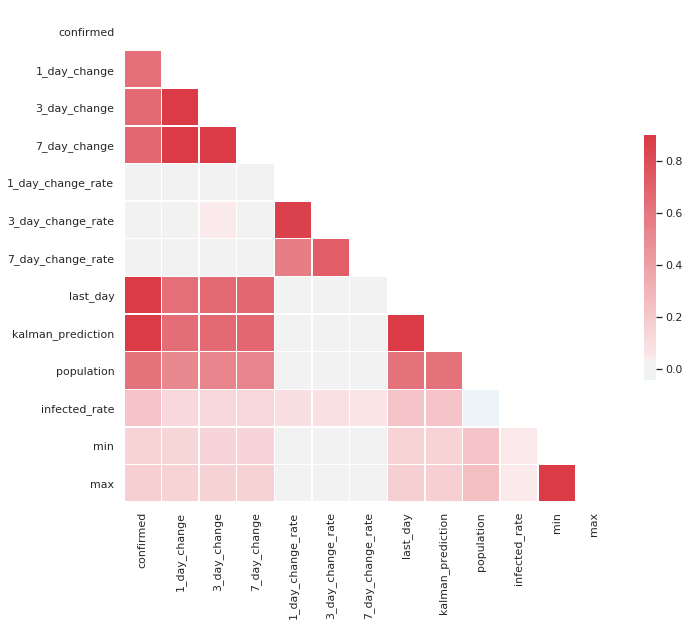

In [58]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [59]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.637899
3_day_change         0.664360
7_day_change         0.678137
1_day_change_rate    0.027964
3_day_change_rate    0.023240
7_day_change_rate    0.012981
last_day             0.996360
kalman_prediction    0.996456
population           0.620167
infected_rate        0.221789
min                  0.154954
max                  0.174542
Name: confirmed, dtype: float64


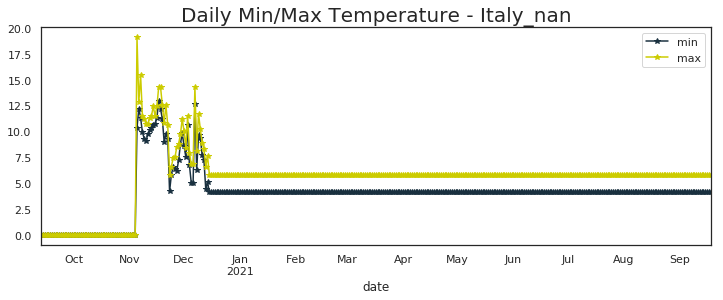

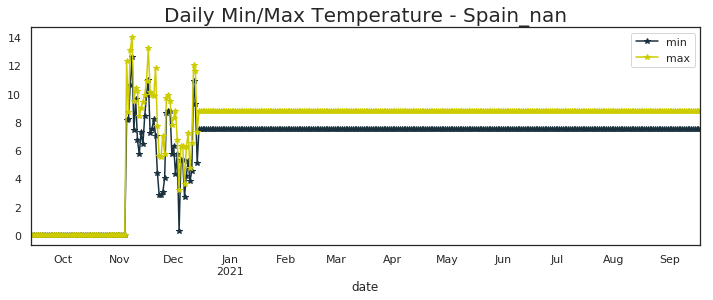

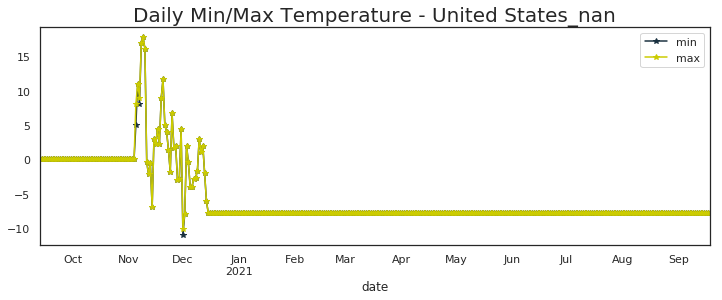

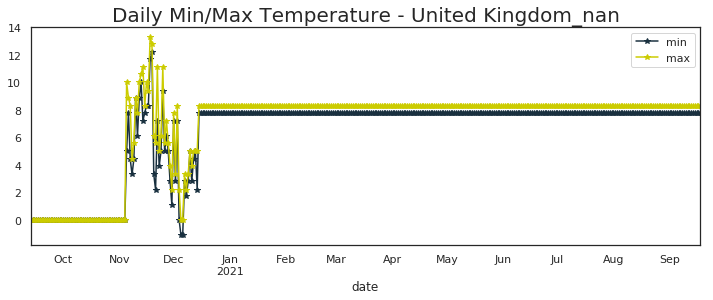

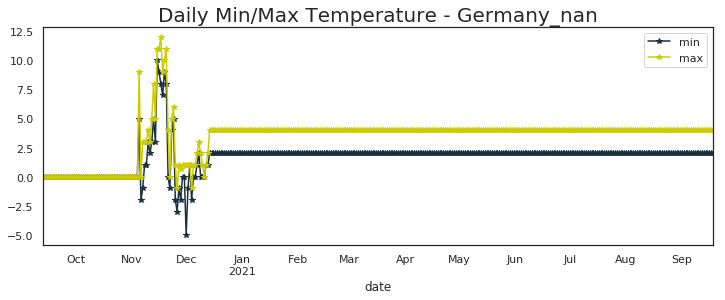

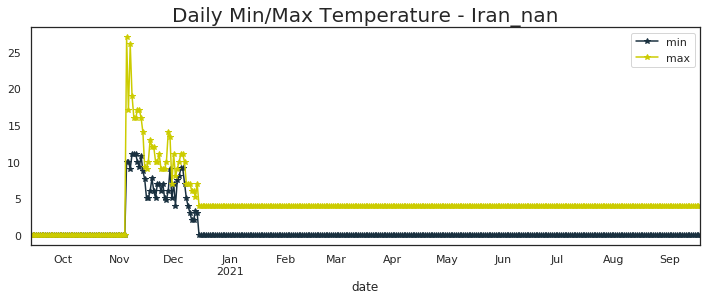

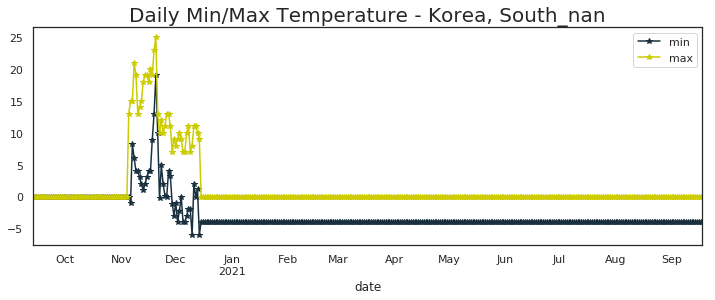

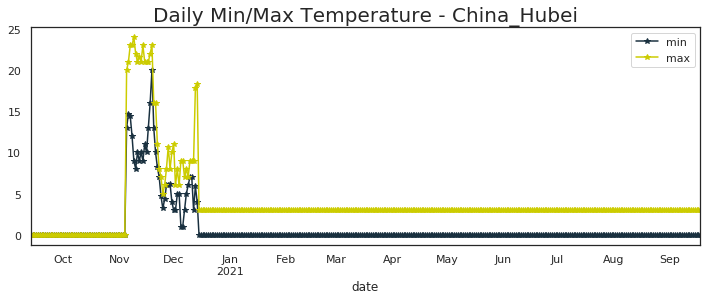

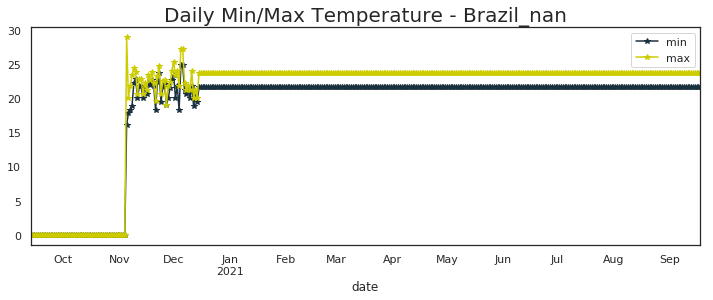

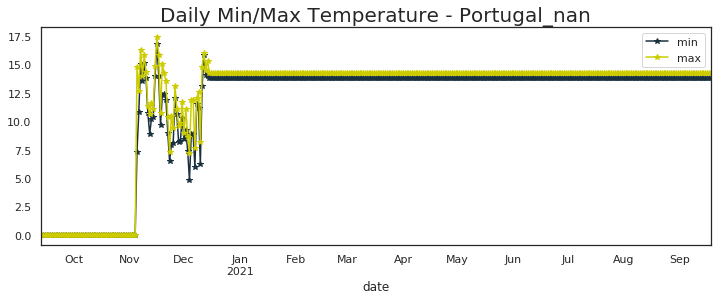

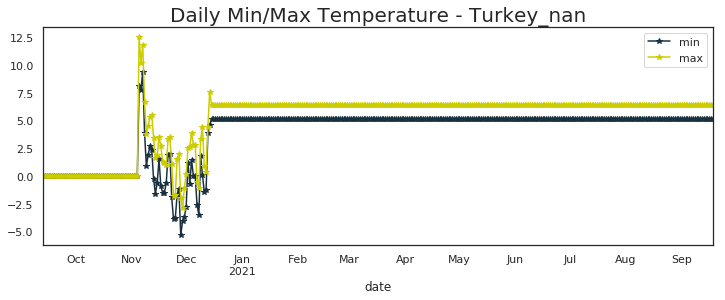

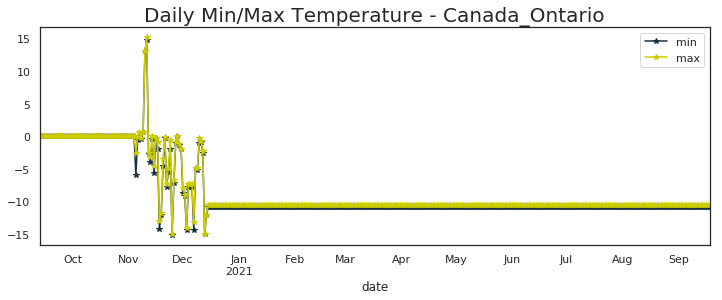

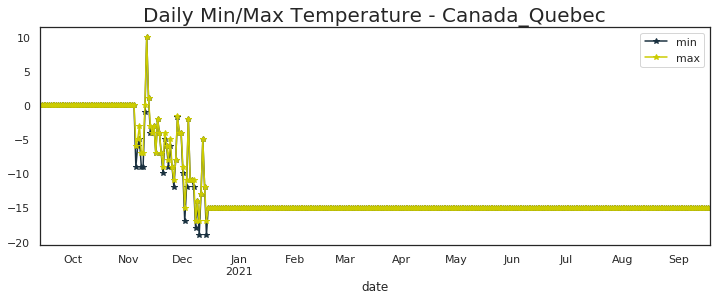

In [60]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [61]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.8  17.8
India_nan                   22.0  31.0
Brazil_nan                  24.8  28.9
United Kingdom_nan          12.2  13.3
Russia_nan                   0.0   4.0
Turkey_nan                   9.4  12.5
France_nan                  12.1  13.3
Iran_nan                    11.0  27.0
Argentina_nan                0.0   0.0
Colombia_nan                 0.0   0.0
Spain_nan                   12.6  14.0
Italy_nan                   12.9  19.1
Indonesia_nan                0.0   0.0
Germany_nan                 10.0  12.0
Mexico_nan                  15.1  15.1
Poland_nan                   8.9  10.6
South Africa_nan             0.0   0.0
Ukraine_nan                  0.0   0.0
Philippines_nan             26.1  31.1
Peru_nan                    24.6  29.9
Malaysia_nan                25.0  33.0
Netherlands_nan             14.4  16.1
Iraq_nan                    

### Kalman X Days Ahead Prediction

In [62]:
%%R

#install.packages('reshape')

NULL


In [63]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [64]:
all_new=%R all_new

In [65]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

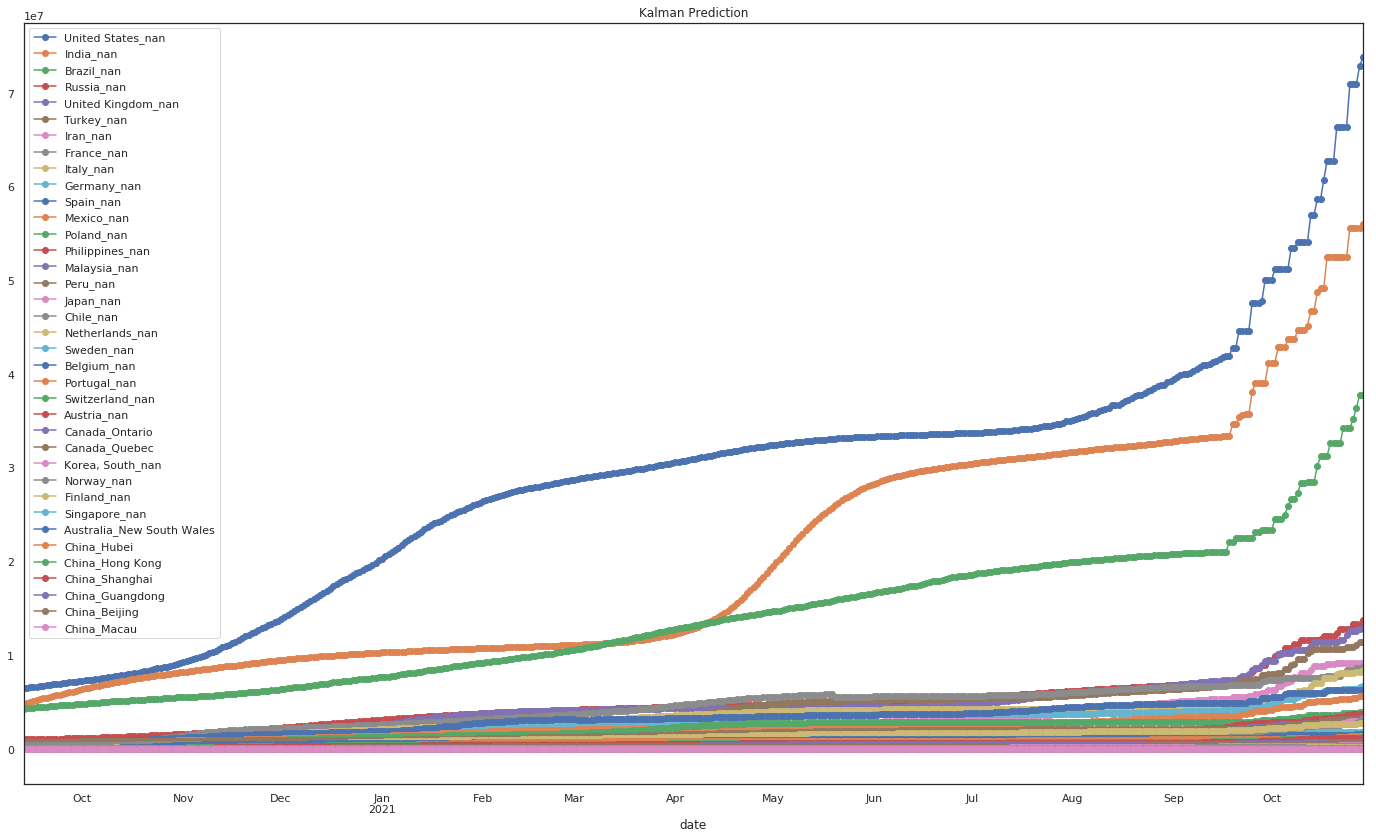

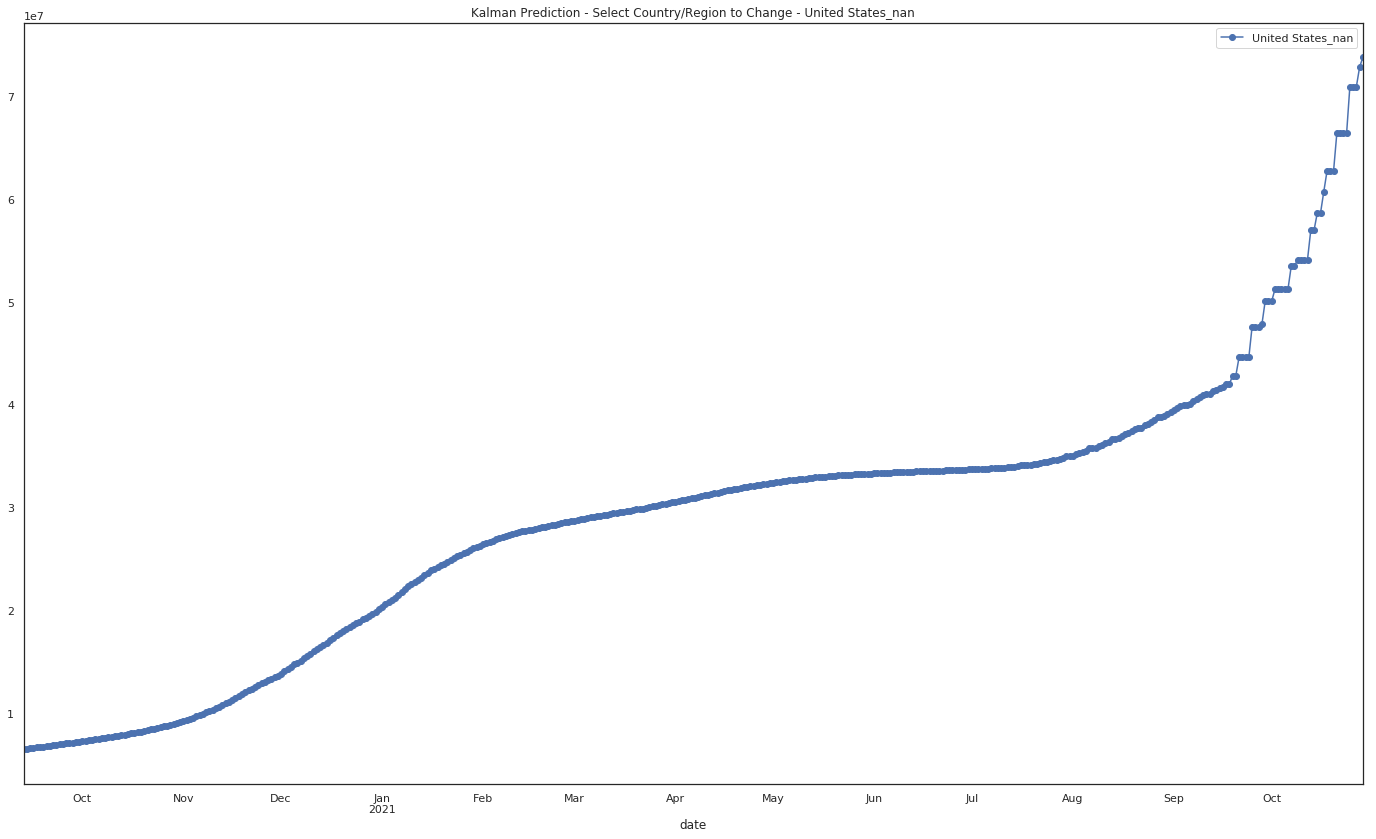

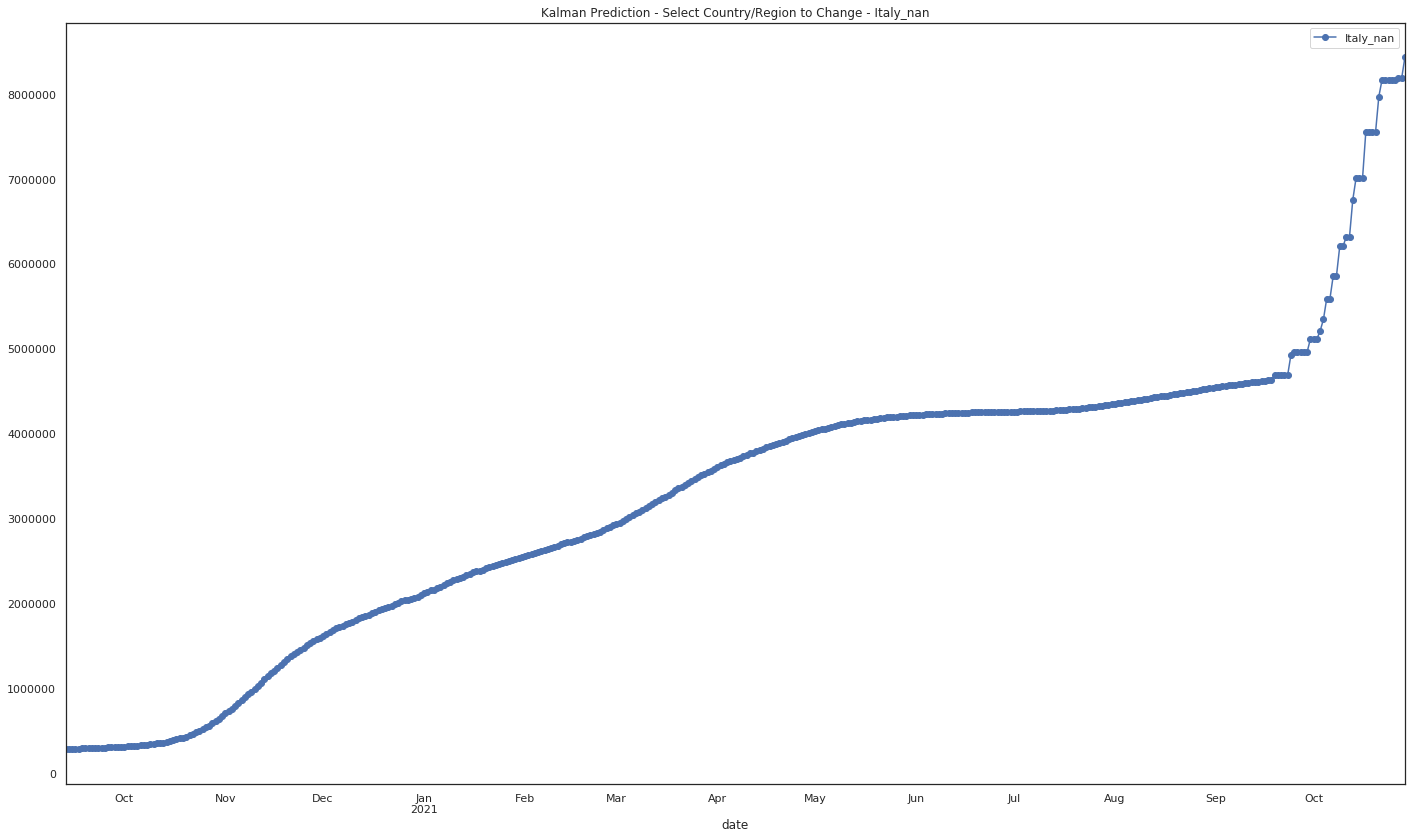

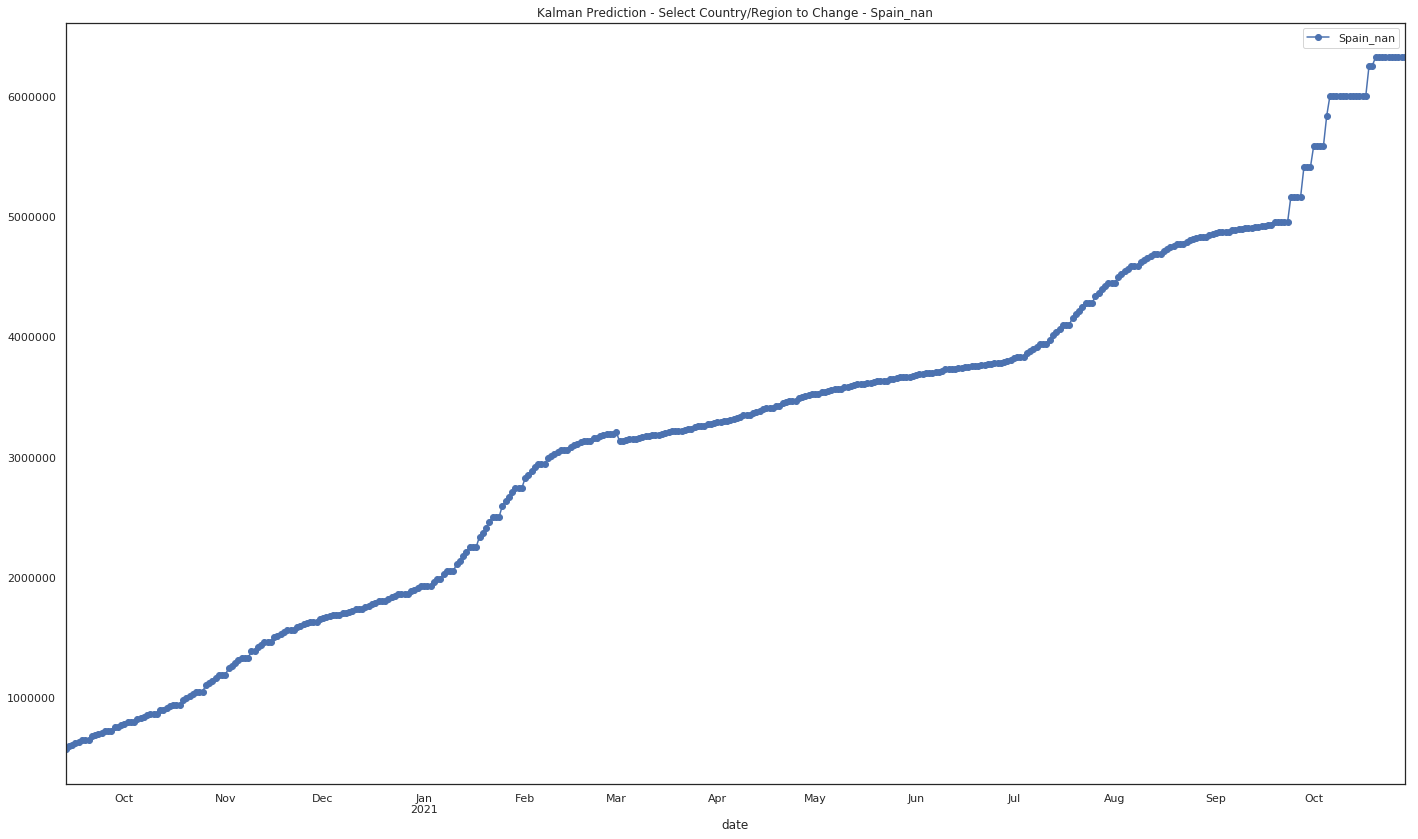

In [66]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


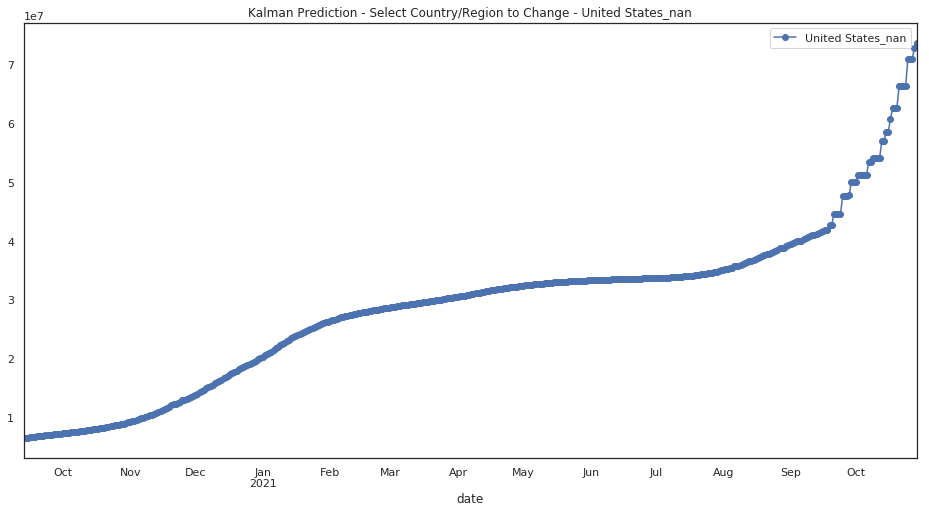

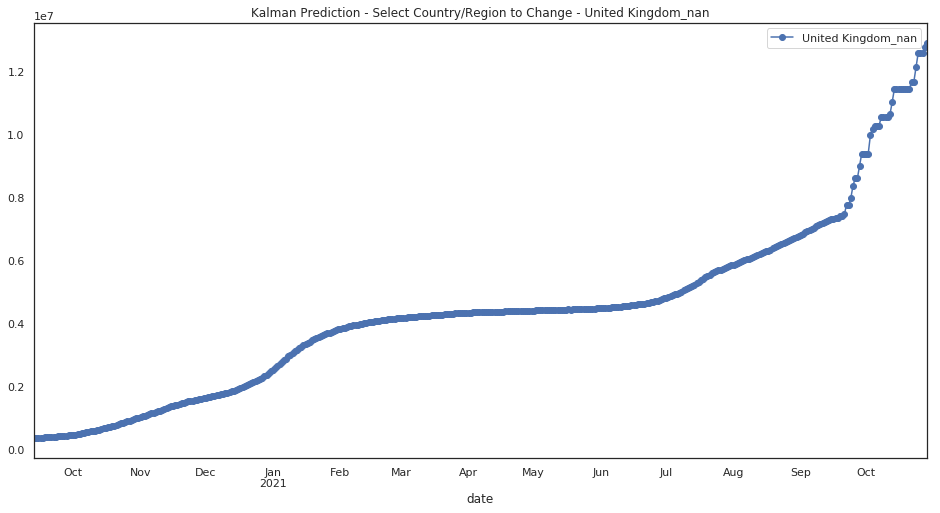

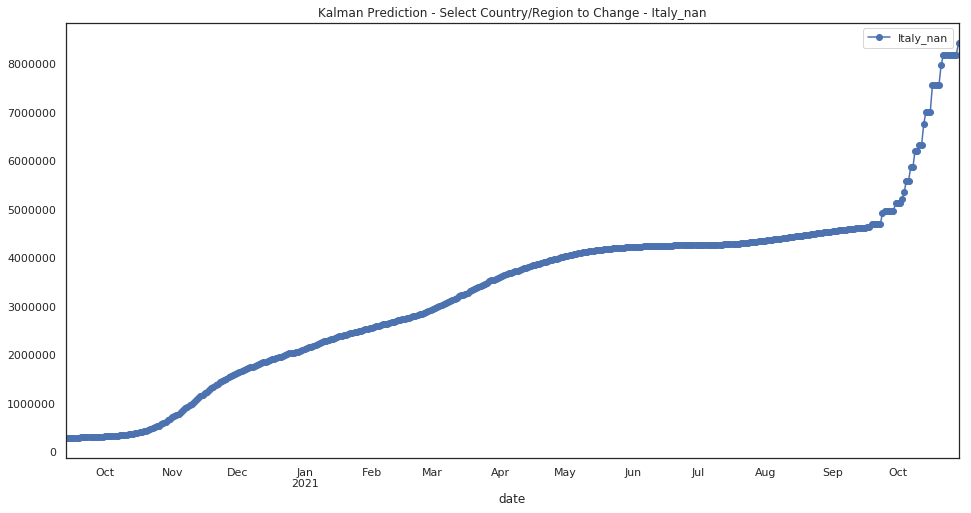

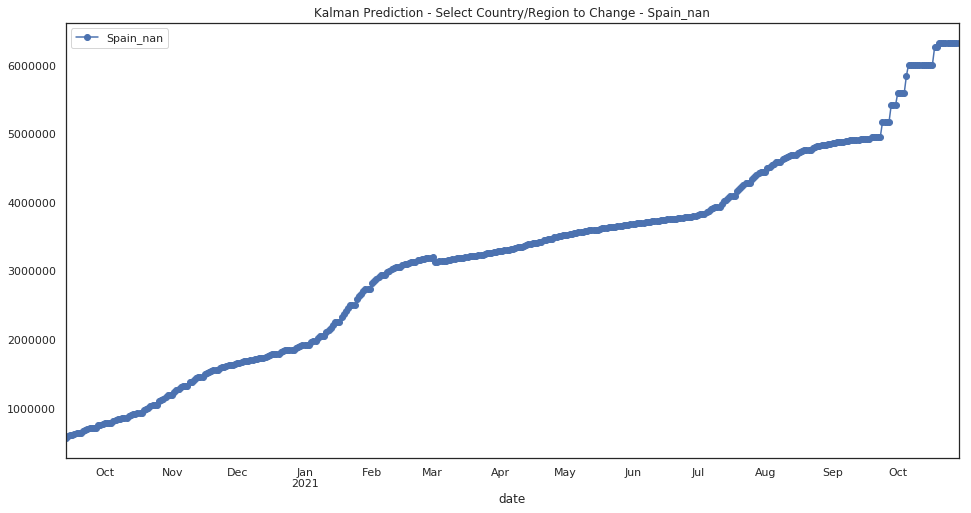

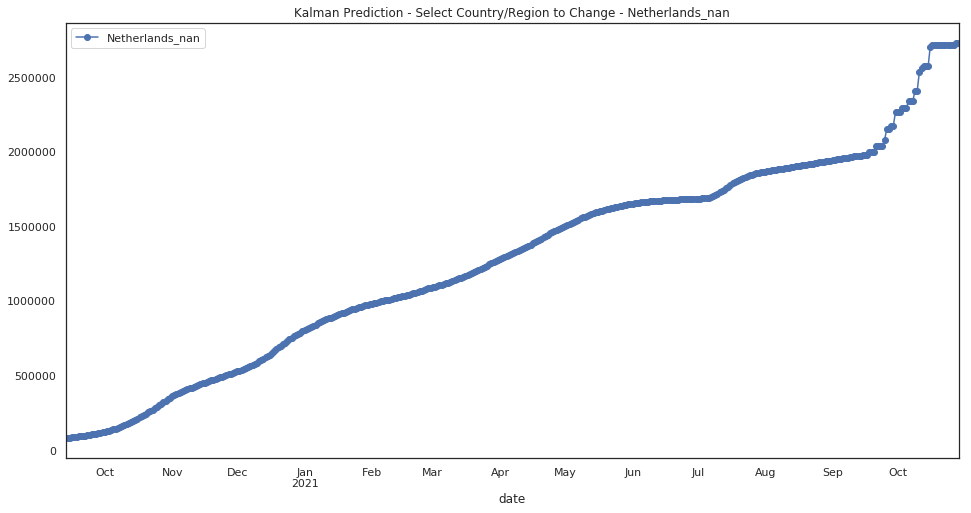

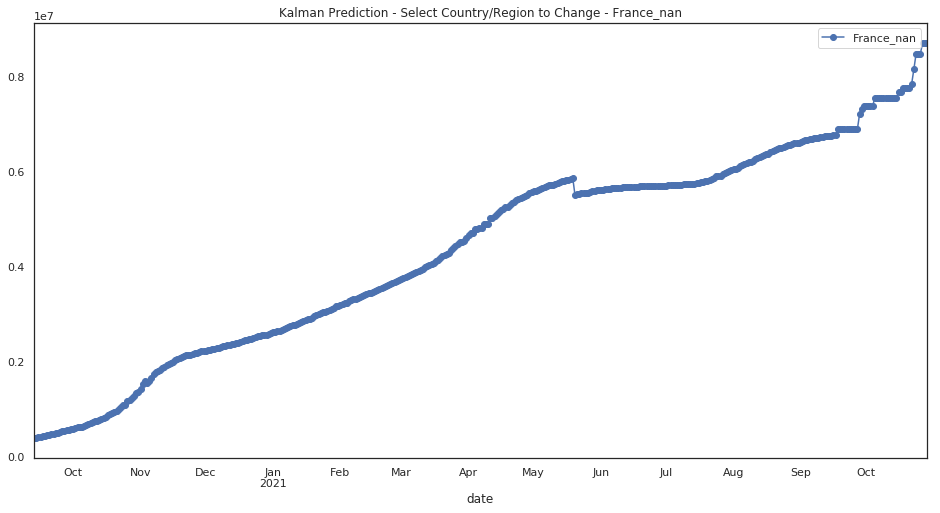

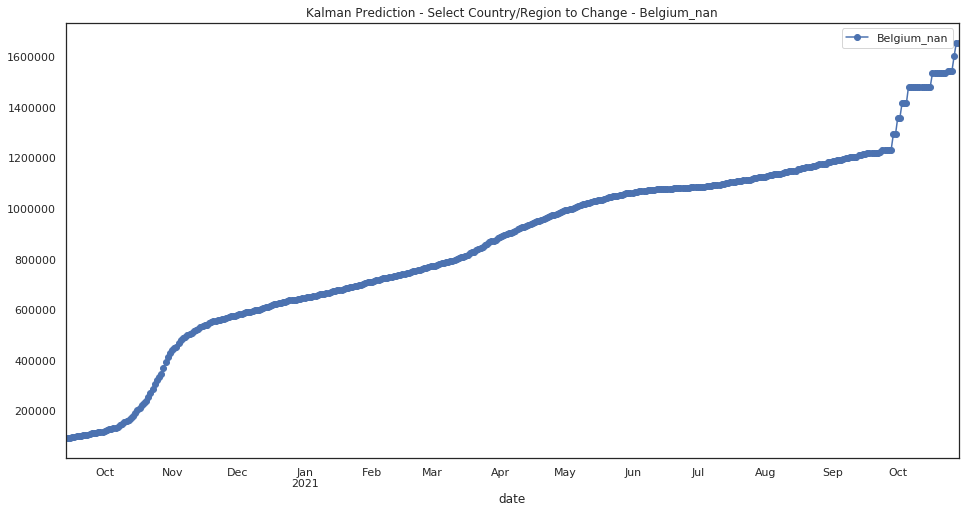

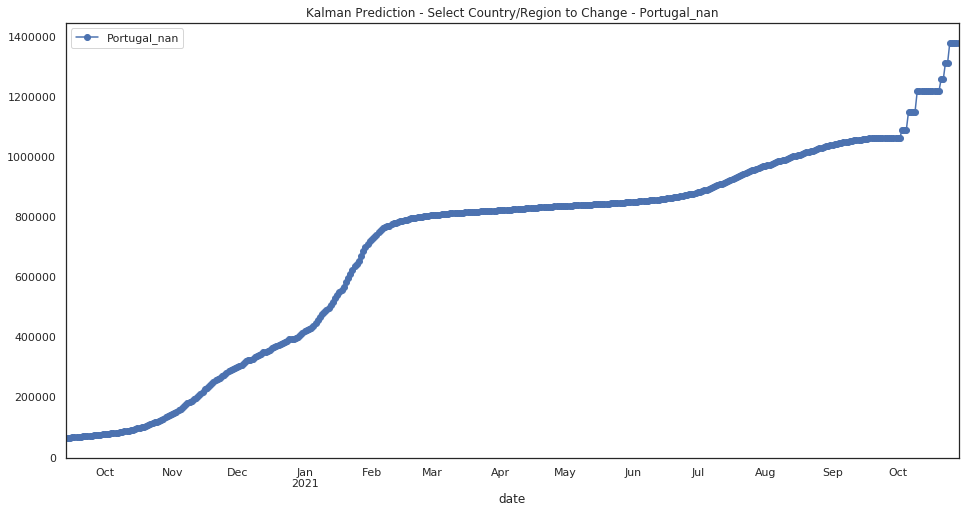

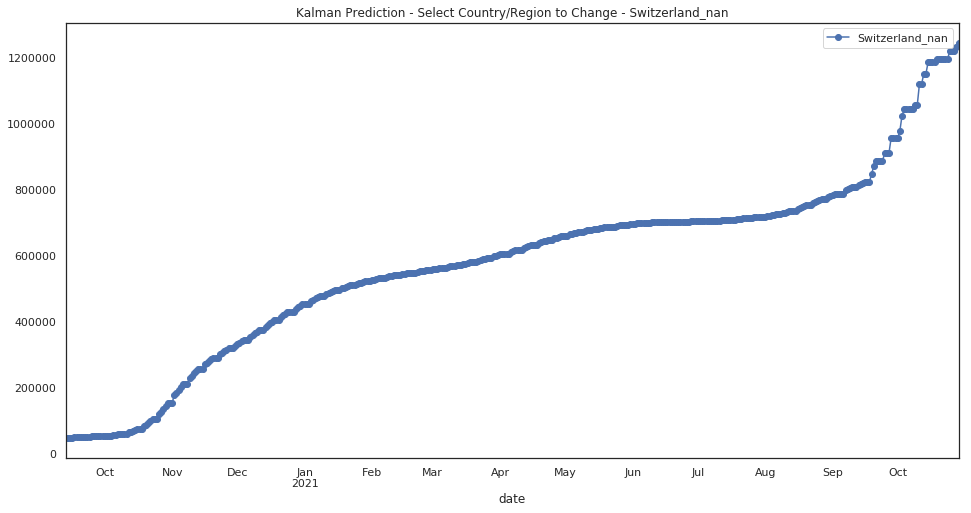

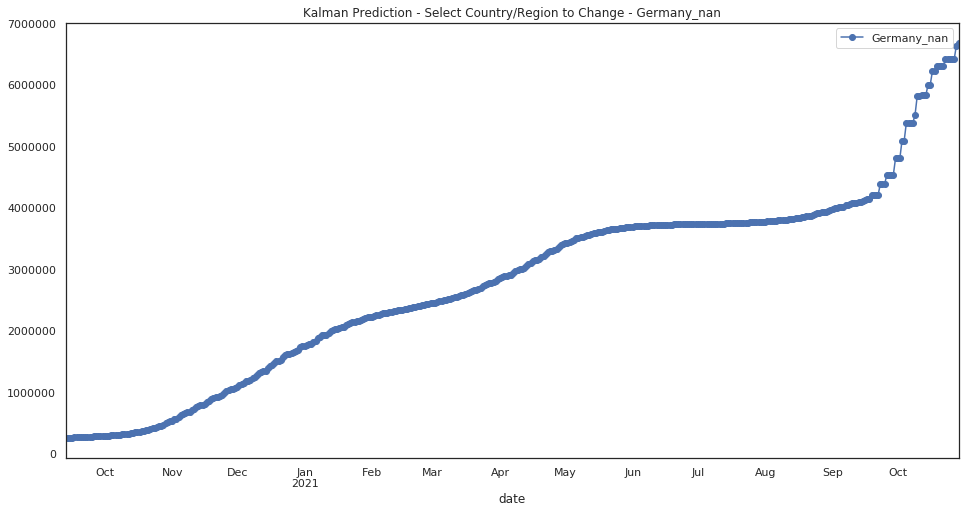

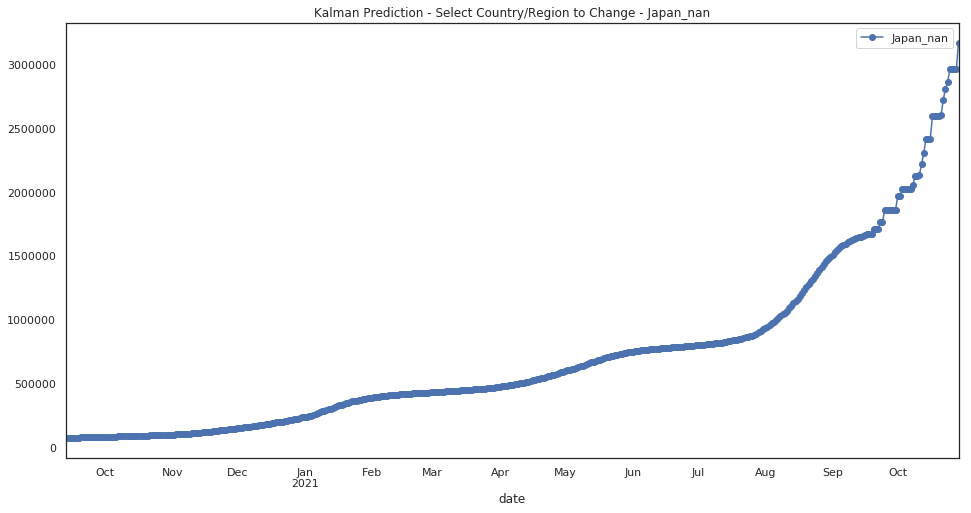

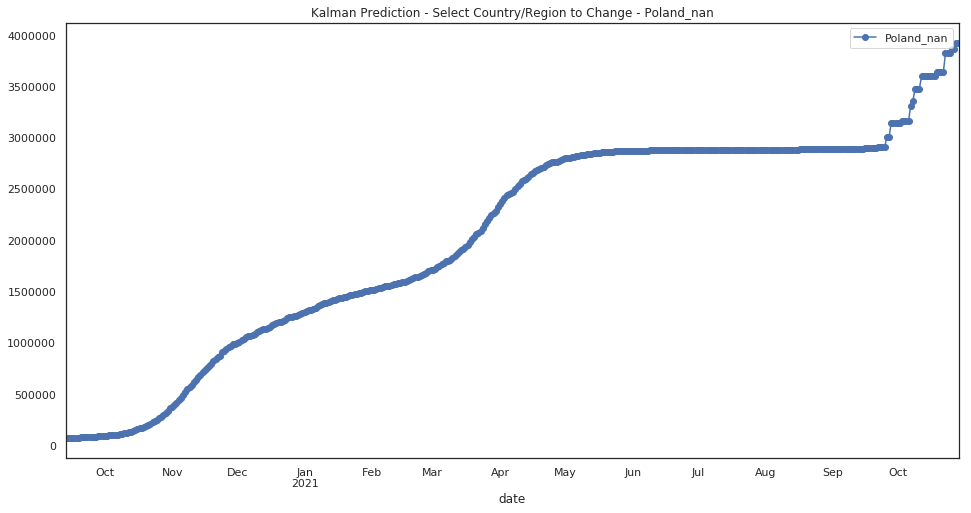

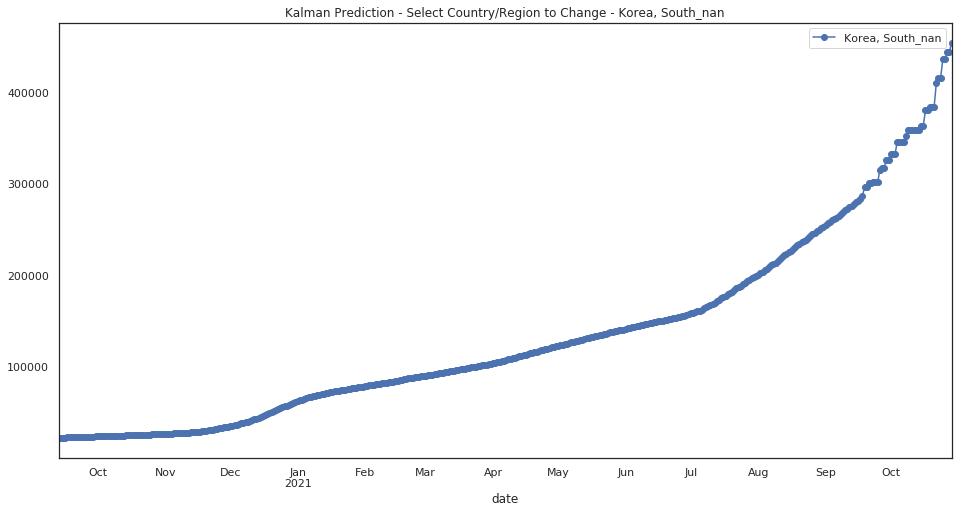

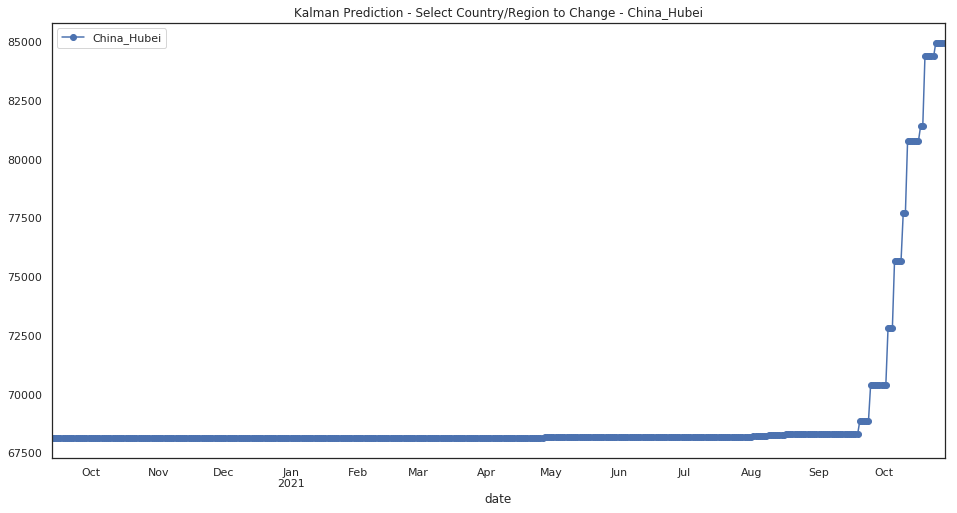

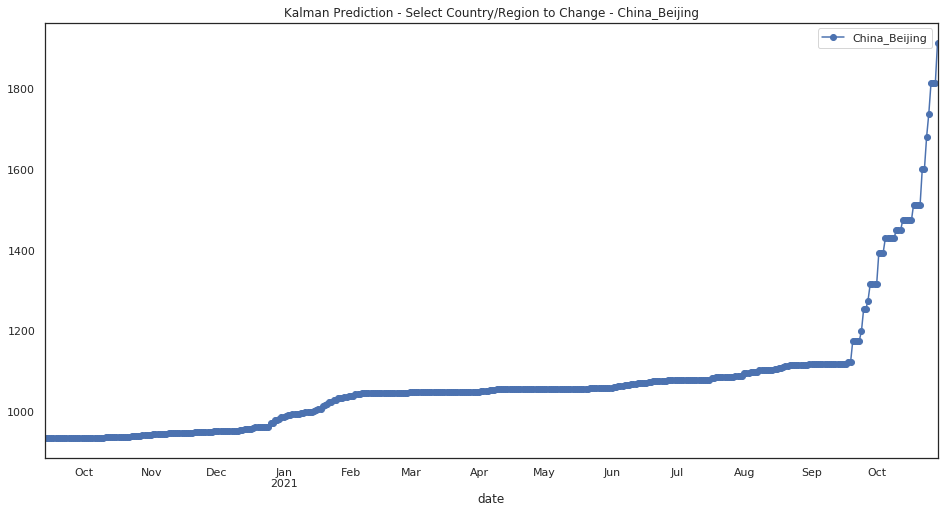

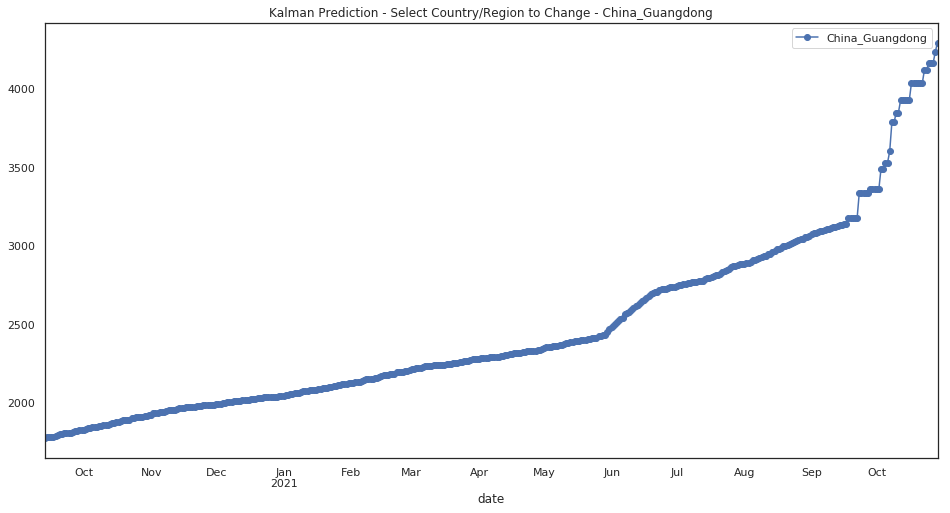

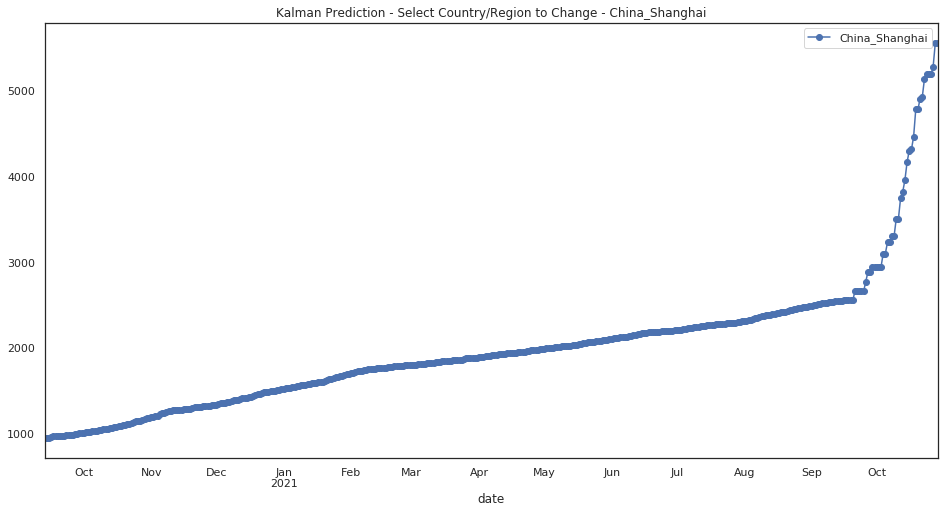

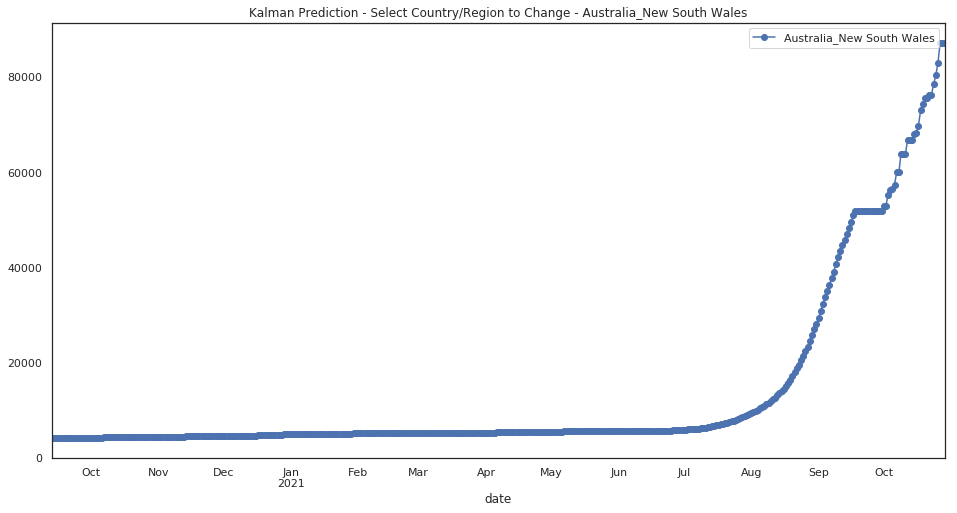

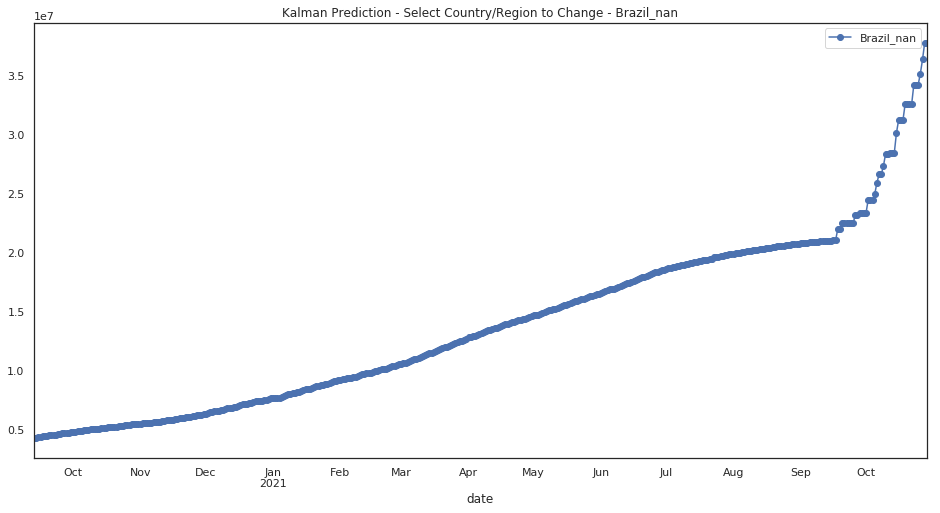

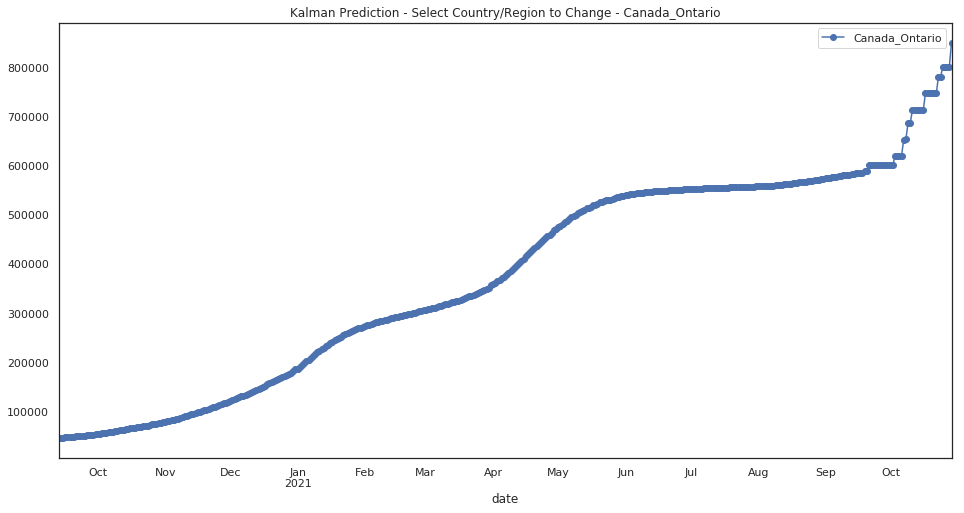

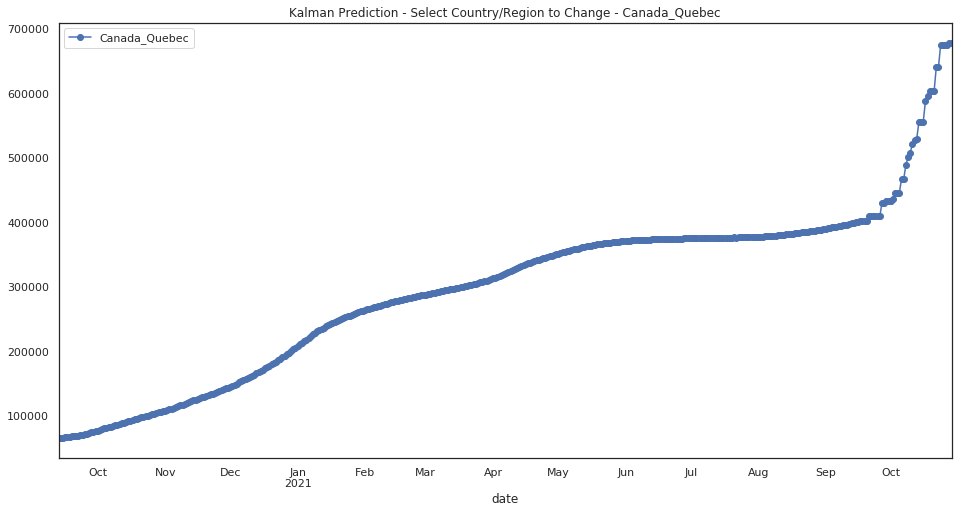

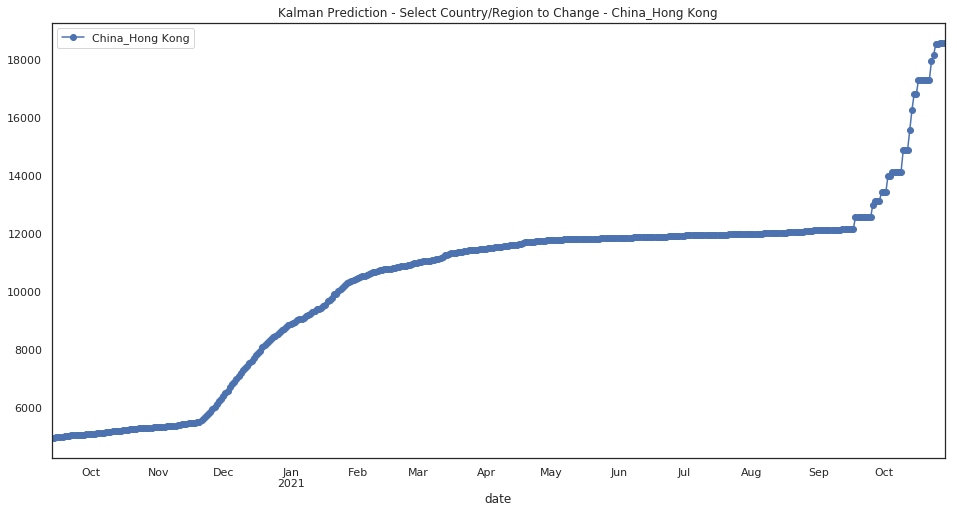

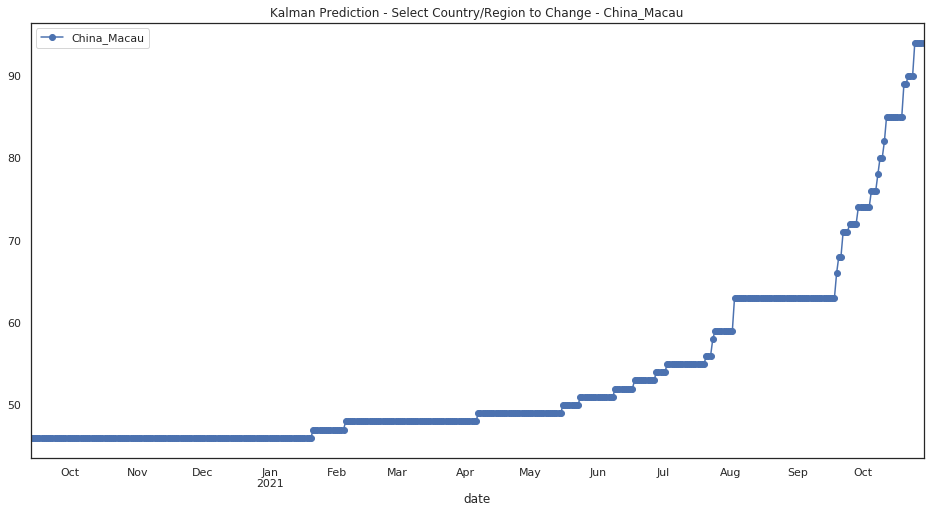

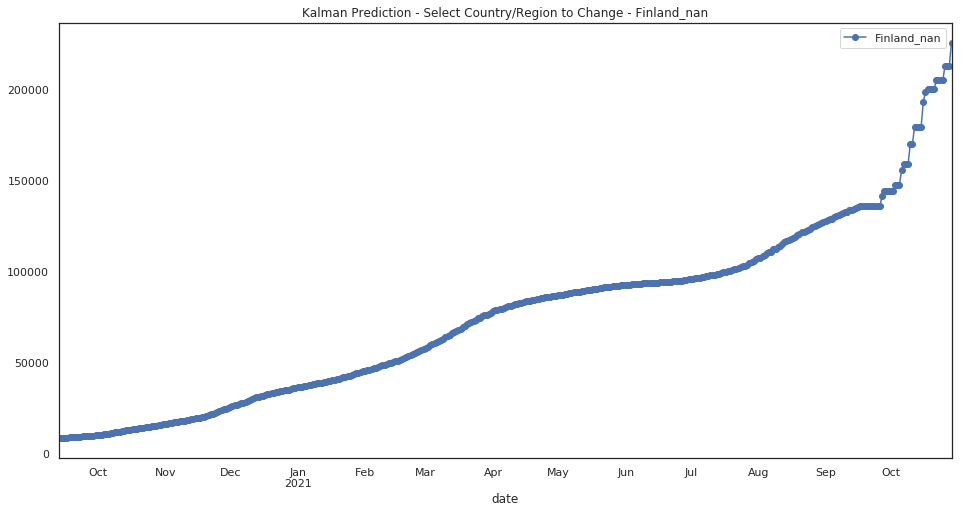

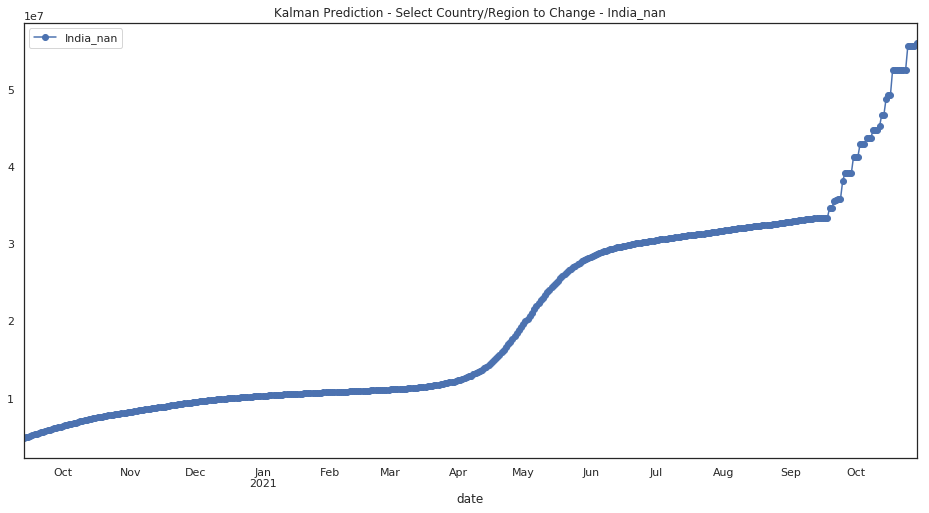

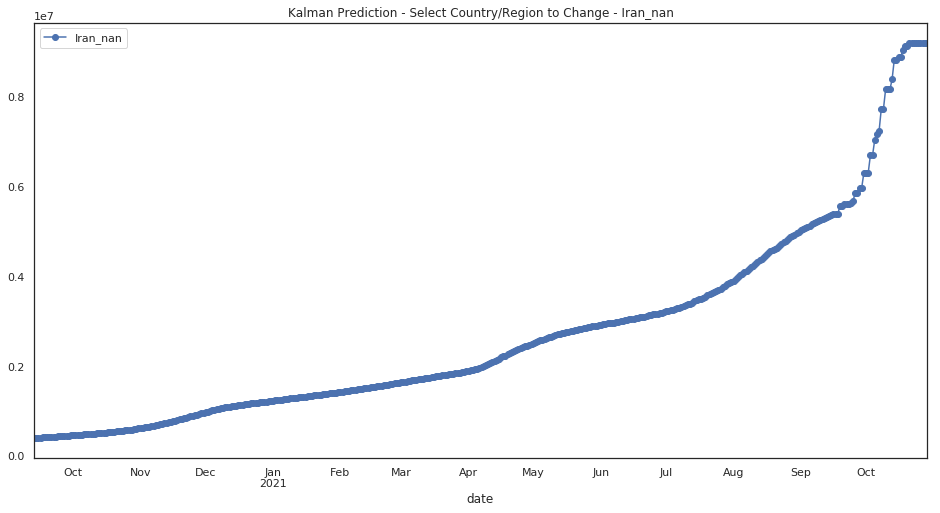

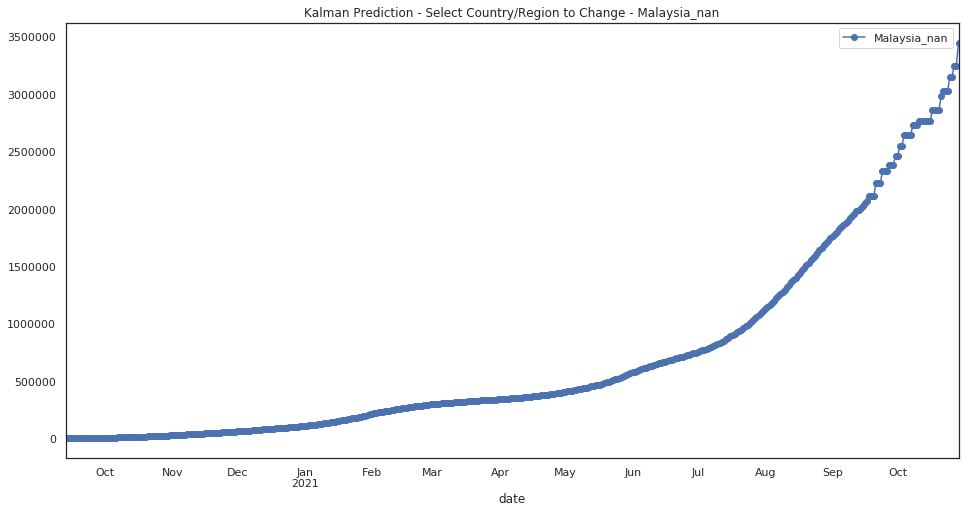

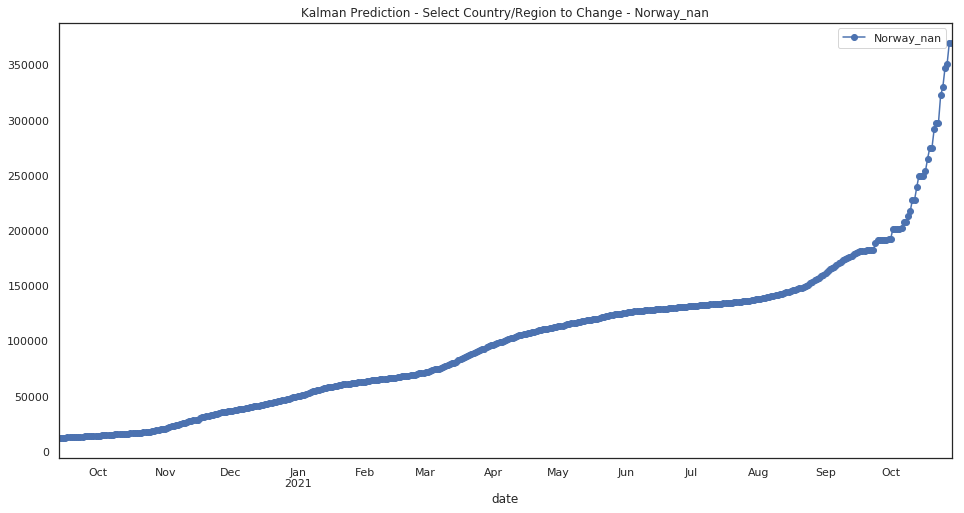

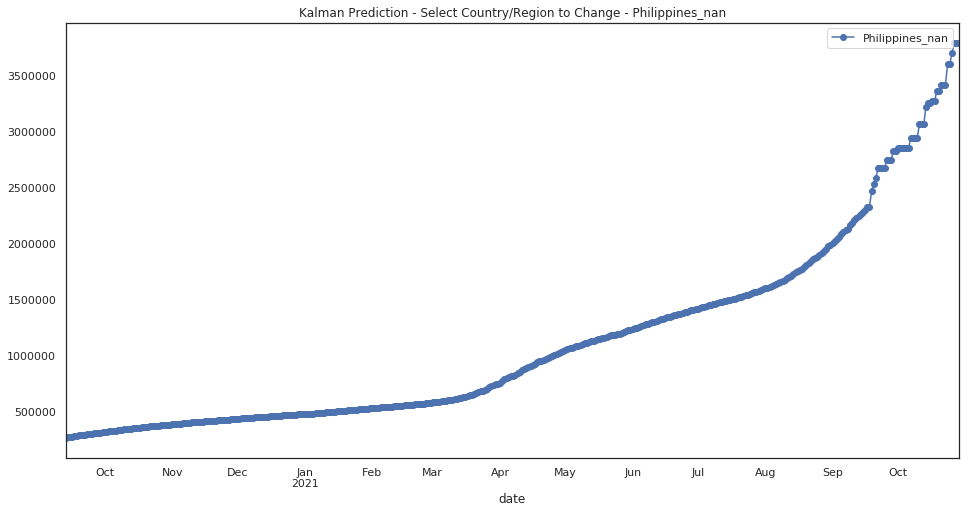

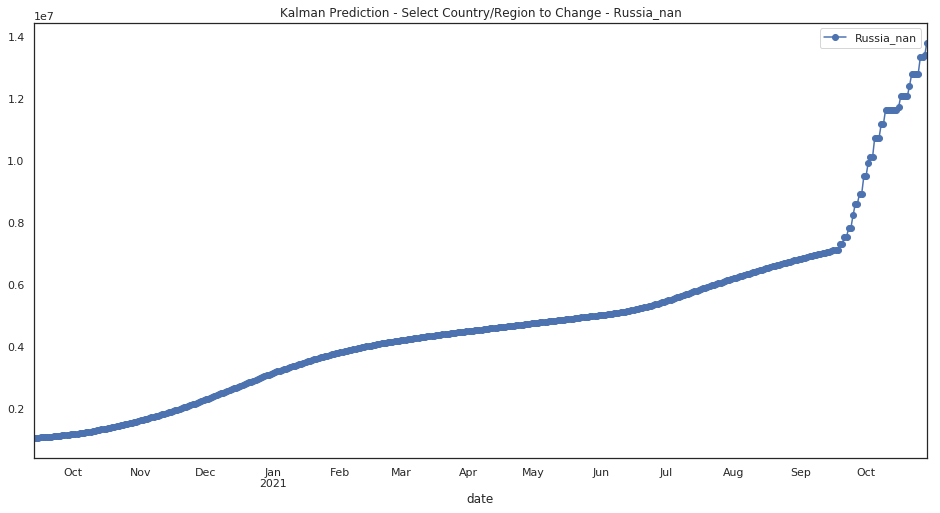

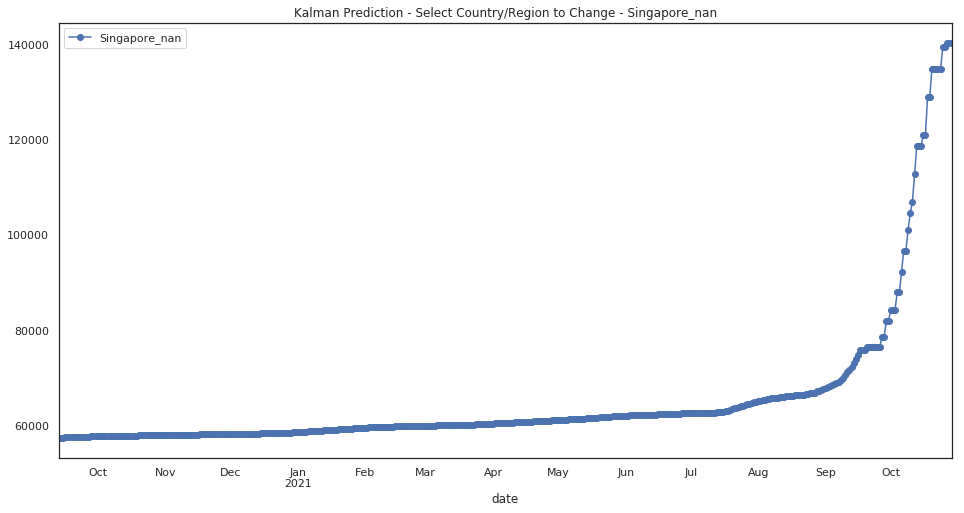

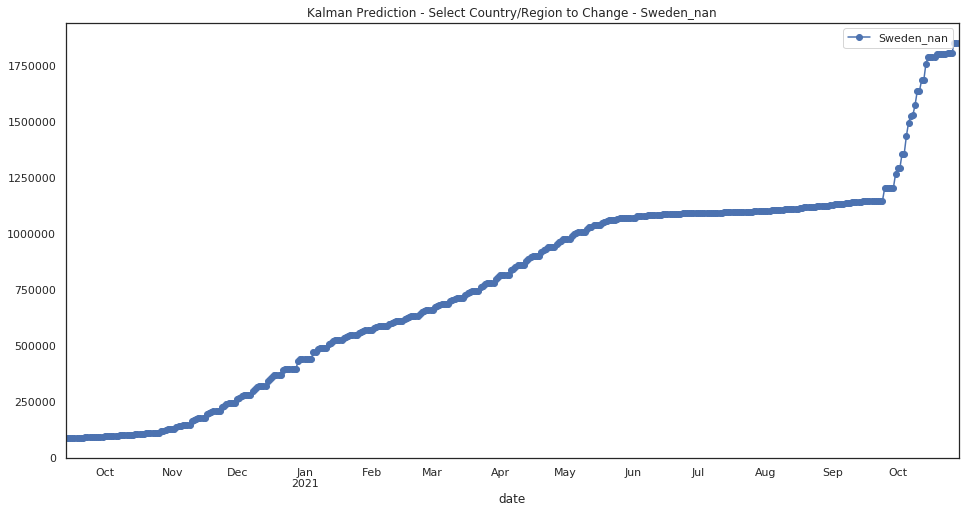

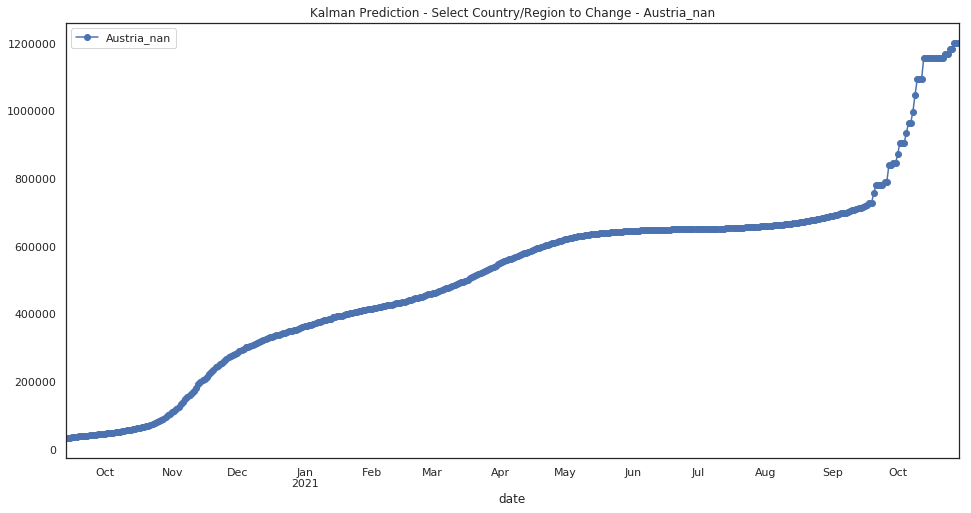

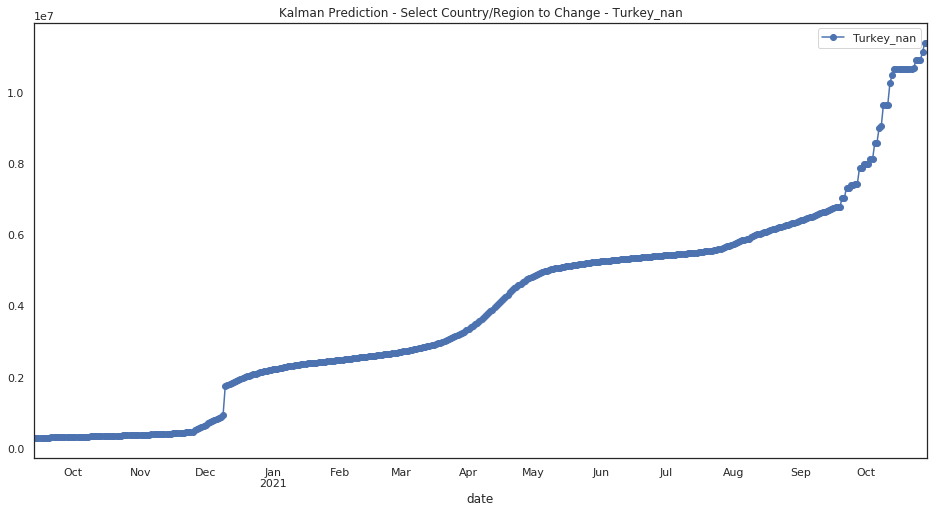

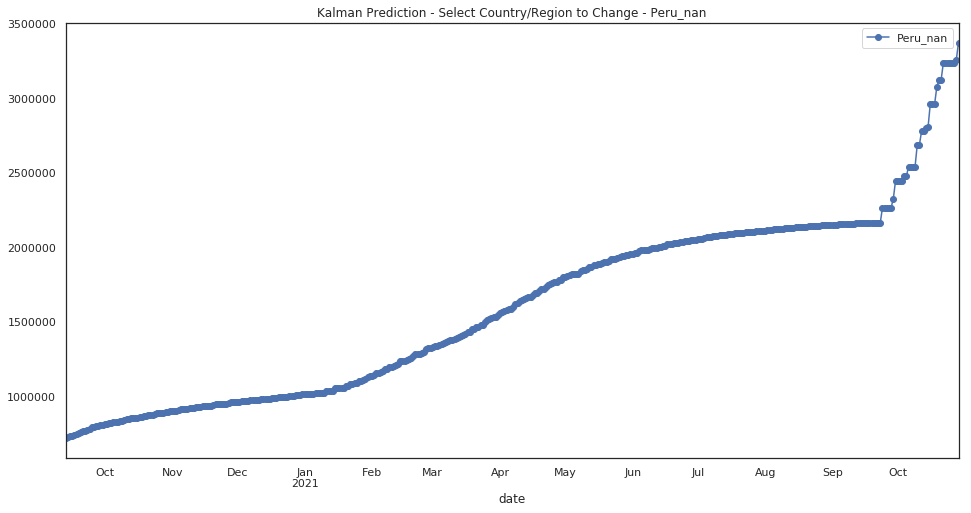

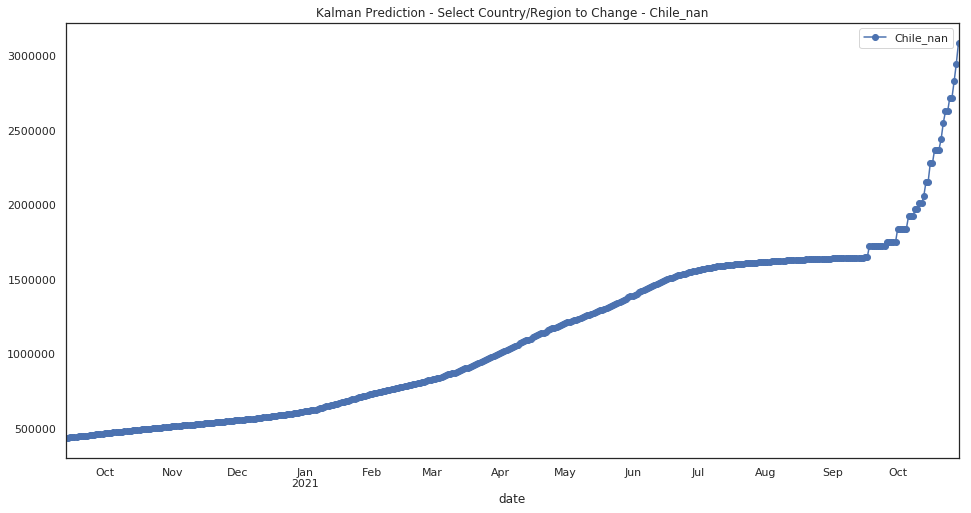

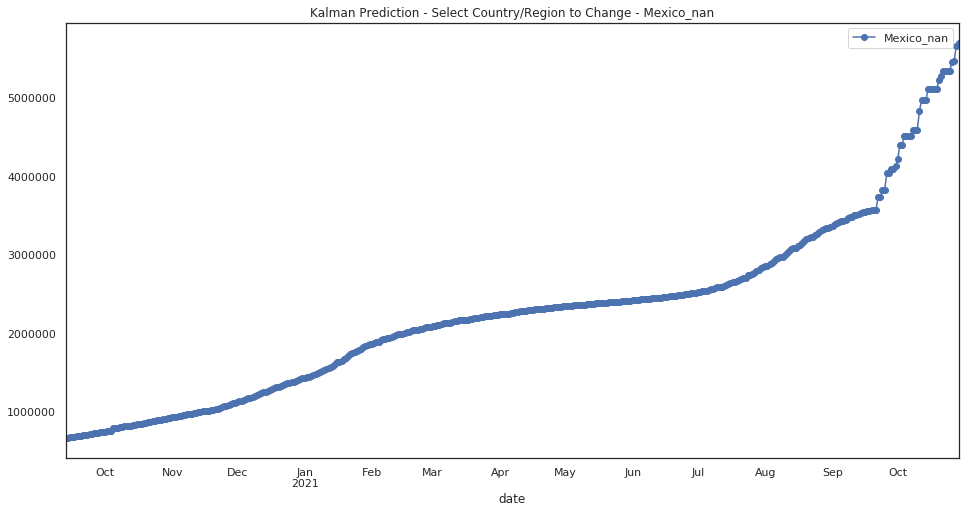

In [67]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [68]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2021-10-29 00:00:00
dtype: object


0  pred_confirmed
United States_nan                                   NaN      73817307.0
India_nan                                           NaN      56040553.0
Brazil_nan                                          NaN      37817906.0
Russia_nan                                          NaN      13812253.0
United Kingdom_nan                                  NaN      12935803.0
Turkey_nan                                          NaN      11413345.0
Iran_nan                                            NaN       9204440.0
France_nan                                          NaN       8718409.0
Italy_nan                                           NaN       8433155.0
Argentina_nan                                       NaN       7709270.0
Indonesia_nan                                       NaN       7428448.0
Colombia_nan                                        NaN       7057882.0
Germany_nan                                         NaN       6686135.0
Spain_nan                                           NaN       6329918.0
Mexico_nan                                          NaN       5702003.0
South Africa_nan                                    NaN       5205955.0
Poland_nan                                          NaN       3927563.0
Philippines_nan                                     NaN       3797007.0
Czechia_nan                                         NaN       3716230.0
Ukraine_nan                                         NaN       3513110.0
Malaysia_nan                                        NaN       3448495.0
Peru_nan                                            NaN       3373129.0
Japan_nan                                           NaN       3171633.0
Chile_nan                                           NaN       3087647.0
Iraq_nan                                            NaN       2958194.0
Netherlands_nan                                     NaN       2732209.0
Bangladesh_nan                                      NaN       2378887.0
Thailand_nan                                        NaN       2210321.0
Israel_nan                                          NaN       2206050.0
United Arab Emirates_nan                            NaN       2121302.0
...                                                 ...             ...
United Kingdom_Anguilla                             NaN           547.0
China_Guangxi                                       NaN           501.0
China_Shanxi                                        NaN           465.0
China_Hainan                                        NaN           378.0
Australia_Tasmania                                  NaN           329.0
China_Gansu                                         NaN           296.0
Australia_Northern Territory                        NaN           295.0
China_Guizhou                                       NaN           246.0
China_Ningxia                                       NaN           110.0
United Kingdom_Falkland Islands (Malvinas)          NaN           108.0
China_Macau                                         NaN            94.0
United Kingdom_Montserrat                           NaN            48.0
France_Saint Pierre and Miquelon                    NaN            44.0
China_Unknown                                       NaN            37.0
Holy See_nan                                        NaN            34.0
Solomon Islands_nan                                 NaN            29.0
Canada_Repatriated Travellers                       NaN            27.0
China_Qinghai                                       NaN            24.0
Canada_Grand Princess                               NaN            22.0
Palau_nan                                           NaN            11.0
MS Zaandam_nan                                      NaN             9.0
United Kingdom_Saint Helena, Ascension and Tris...  NaN             4.0
Vanuatu_nan                                         NaN             4.0
Marshall Islands_nan                                NaN             4.0
Samoa_nan             

In [69]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [70]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [71]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [72]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [73]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [74]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-09-13          43049.0      19324.0      51218.0      10673.0   
2020-09-14          43097.0      19468.0      51428.0      10754.0   
2020-09-15          38858.0      11520.0      48496.0       1438.0   
2020-09-16          38901.0      11672.0      48734.0       1438.0   
2020-09-17          38941.0      11816.0      49127.0       1483.0   
2020-09-18          38958.0      11948.0      49345.0       1483.0   
2020-09-19          38969.0      12073.0      49552.0       1564.0   
2020-09-20          39005.0      12226.0      49752.0       1564.0   
2020-09-21          39253.0      12541.0      50068.0       1829.0   
2020-09-22          39258.0      12684.0      50259.0       1681.0   
2020-09-23          39302.0      12812.0      50446.0       1934.0   
2020-09-24          39329.0      12943.0      50627.0       1753.0   
2020-09-25          39340.0      13061.0      50803.0       1972.0   
2020-09-26          39344.0      13174.0      50965.0       1836.0   
2020-09-27          39371.0      13287.0      51117.0       1987.0   
2020-09-28          39400.0      13415.0      51263.0       2099.0   
2020-09-29          39411.0      13537.0      51416.0       1966.0   
2020-09-30          39427.0      13673.0      51582.0       2219.0   
2020-10-01          39444.0      13829.0      51747.0       2050.0   
2020-10-02          39452.0      13983.0      51906.0       2243.0   
2020-10-03          39456.0      14139.0      52056.0       2110.0   
2020-10-04          39495.0      14291.0      52195.0       2229.0   
2020-10-05          39581.0      14434.0      52328.0       2453.0   
2020-10-06          39657.0      14589.0      52454.0       2370.0   
2020-10-07          39718.0      14746.0      52575.0       2793.0   
2020-10-08          39782.0      14914.0      52710.0       2568.0   
2020-10-09          39855.0      15083.0      52862.0       2877.0   
2020-10-10          39872.0      15250.0      53004.0       2696.0   
2020-10-11          39936.0      15419.0      53136.0       2847.0   
2020-10-12          40028.0      15588.0      53371.0       3105.0   
...                     ...          ...          ...          ...   
2021-10-01         157027.0     192207.0     219654.0      20472.0   
2021-10-02         157100.0     189119.0     220367.0      20472.0   
2021-10-03         157100.0     189119.0     220528.0      20497.0   
2021-10-04         157100.0     196452.0     220528.0      20500.0   
2021-10-05         158766.0     208639.0     220528.0      20671.0   
2021-10-06         159841.0     217009.0     220528.0      20671.0   
2021-10-07         159010.0     219170.0     229370.0      21270.0   
2021-10-08         159010.0     218649.0     235250.0      21662.0   
2021-10-09         158955.0     230694.0     231185.0      21773.0   
2021-10-10         164346.0     234855.0     231620.0      21773.0   
2021-10-11         167879.0     231838.0     231390.0      22585.0   
2021-10-12         165282.0     241552.0     231390.0      22849.0   
2021-10-13         165297.0     251559.0     239839.0      23822.0   
2021-10-14         165282.0     249428.0     246000.0      24401.0   
2021-10-15         165282.0     252158.0     242067.0      24471.0   
2021-10-16         165282.0     262634.0     242067.0      25888.0   
2021-10-17         168242.0     269286.0     248708.0      26341.0   
2021-10-18         174461.0     265772.0     253669.0      26446.0   
2021-10-19         175060.0     278248.0     250637.0      27410.0   
2021-10-20         173281.0     288174.0     254138.0      28390.0   
2021-10-21         177642.0     282308.0     262062.0      29078.0   
2021-10-22         183556.0     282308.0     262920.0      29576.0   
2021-10-23         189754.0     296444.0     261155.0      29730.0   
2021-10-24         193474.0     308401.0     261155.0      29747.0   
2021-10-25

In [75]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [76]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'India_nan',
 'Brazil_nan',
 'Russia_nan',
 'United Kingdom_nan',
 'Turkey_nan',
 'Iran_nan',
 'France_nan',
 'Italy_nan',
 'Argentina_nan',
 'Indonesia_nan',
 'Colombia_nan',
 'Germany_nan',
 'Spain_nan',
 'Mexico_nan',
 'South Africa_nan',
 'Poland_nan',
 'Philippines_nan',
 'Czechia_nan',
 'Ukraine_nan',
 'Malaysia_nan',
 'Peru_nan',
 'Japan_nan',
 'Chile_nan',
 'Iraq_nan',
 'Netherlands_nan',
 'Bangladesh_nan',
 'Thailand_nan',
 'Israel_nan',
 'United Arab Emirates_nan',
 'Serbia_nan',
 'Kazakhstan_nan',
 'Sweden_nan',
 'Romania_nan',
 'Tunisia_nan',
 'Pakistan_nan',
 'Belgium_nan',
 'Morocco_nan',
 'Cuba_nan',
 'Portugal_nan',
 'Nepal_nan',
 'Jordan_nan',
 'Switzerland_nan',
 'Paraguay_nan',
 'Greece_nan',
 'Austria_nan',
 'Vietnam_nan',
 'Costa Rica_nan',
 'Hungary_nan',
 'Belarus_nan',
 'Sri Lanka_nan',
 'Saudi Arabia_nan',
 'Georgia_nan',
 'Bulgaria_nan',
 'Azerbaijan_nan',
 'Slovakia_nan',
 'Canada_Ontario',
 'Panama_nan',
 'Lebanon_nan',
 'Bolivia_nan',

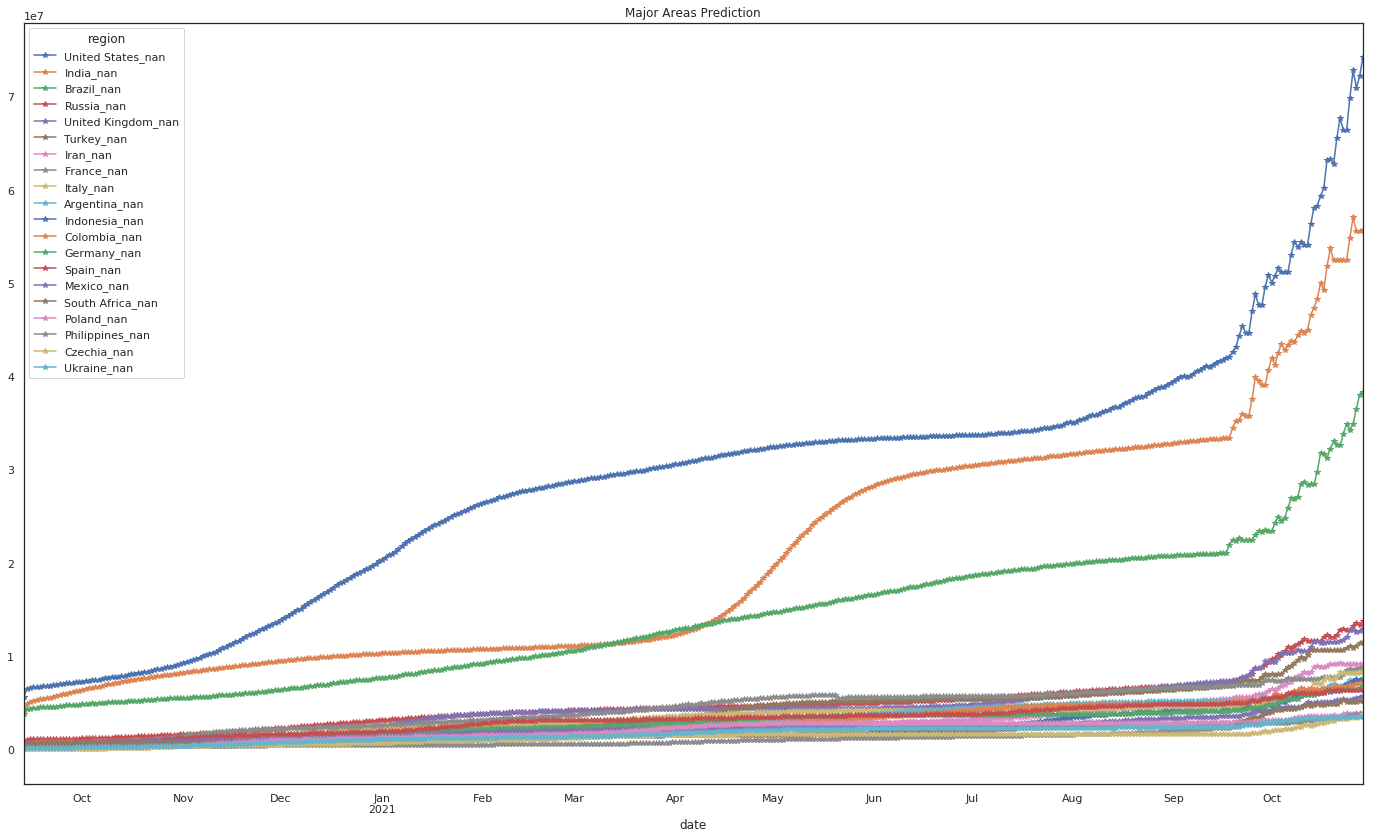

In [77]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

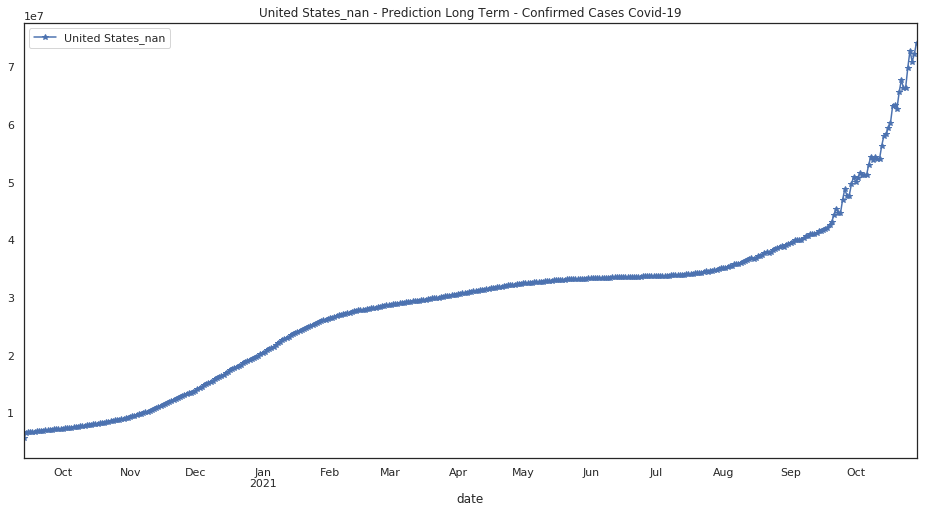

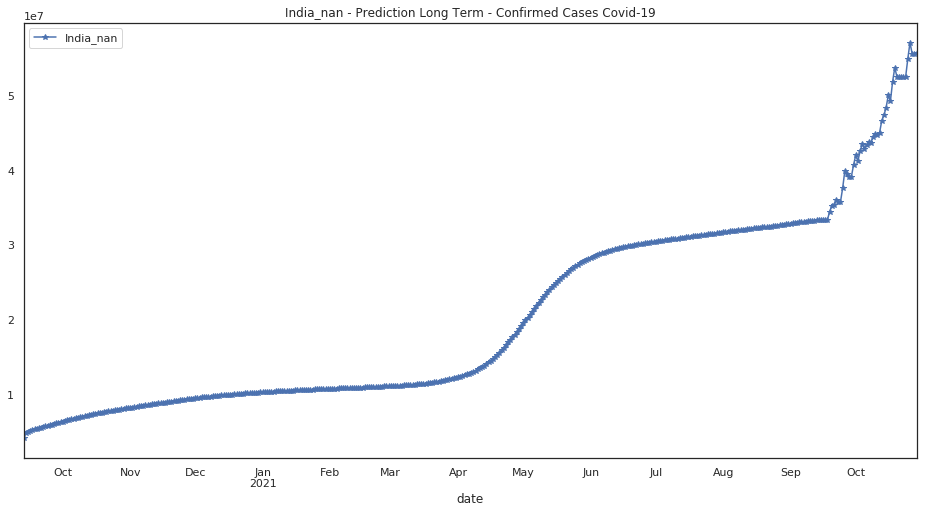

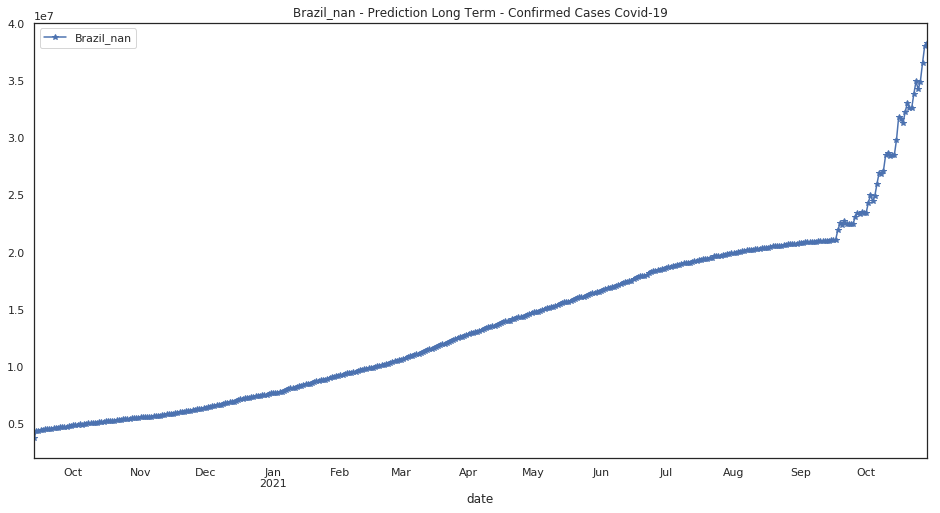

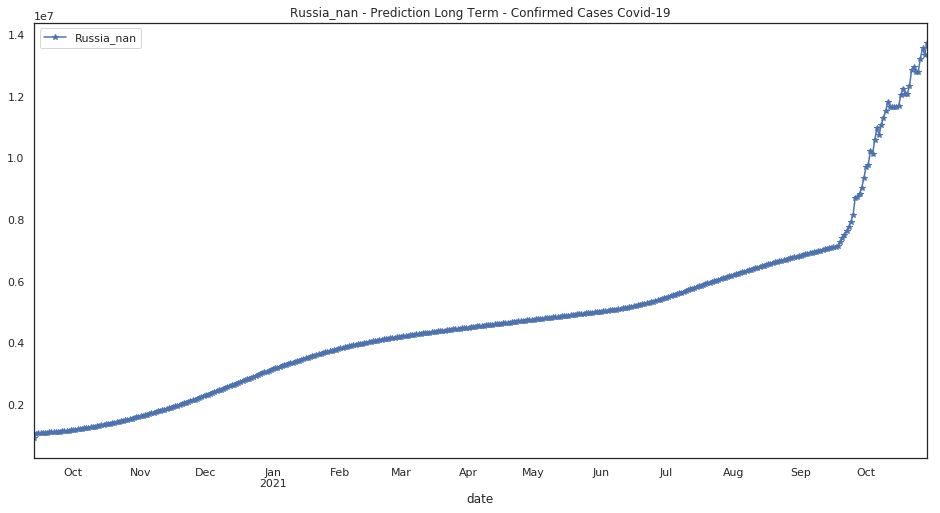

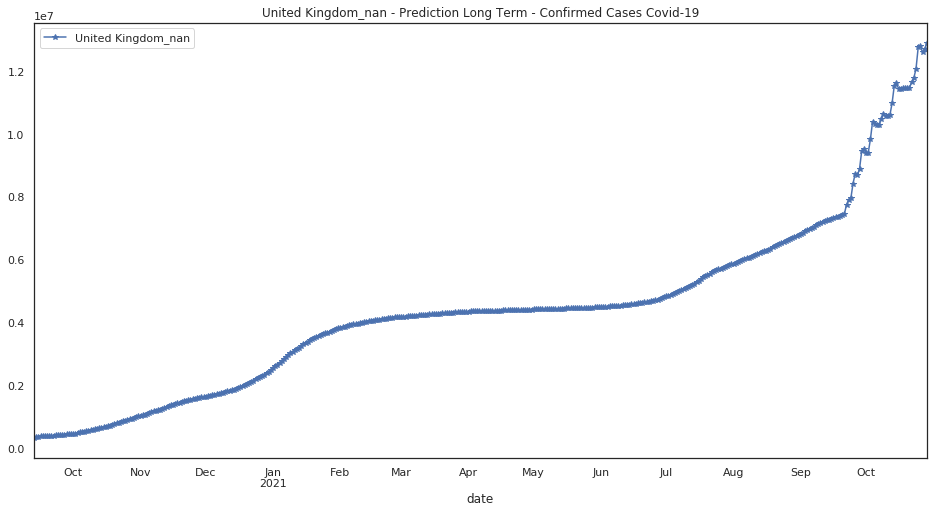

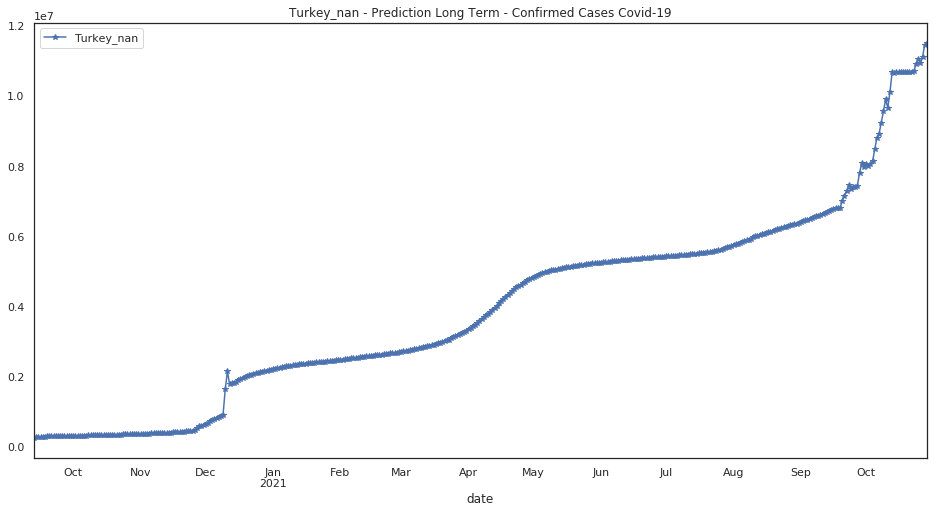

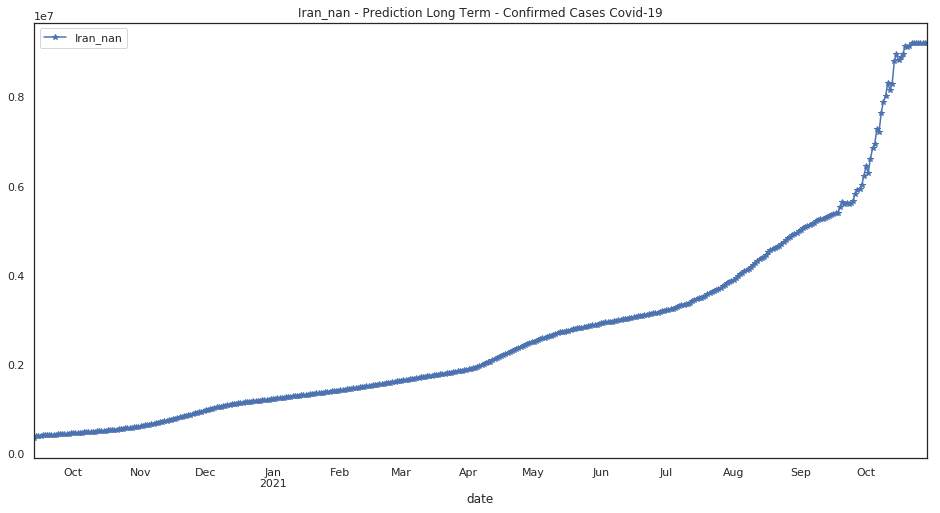

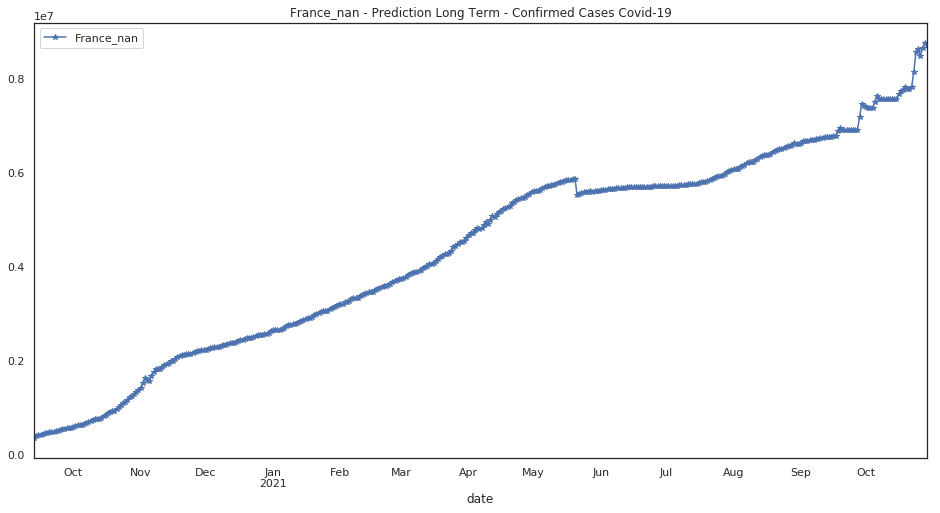

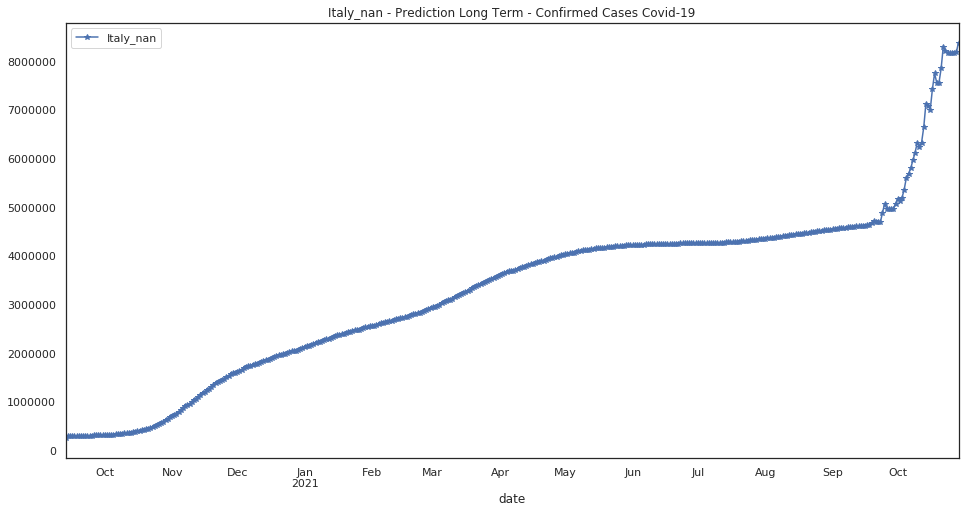

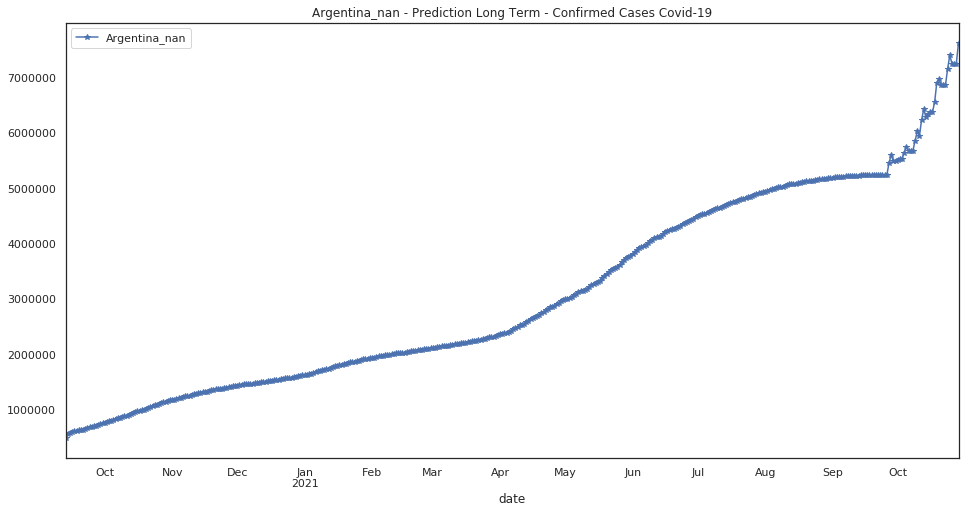

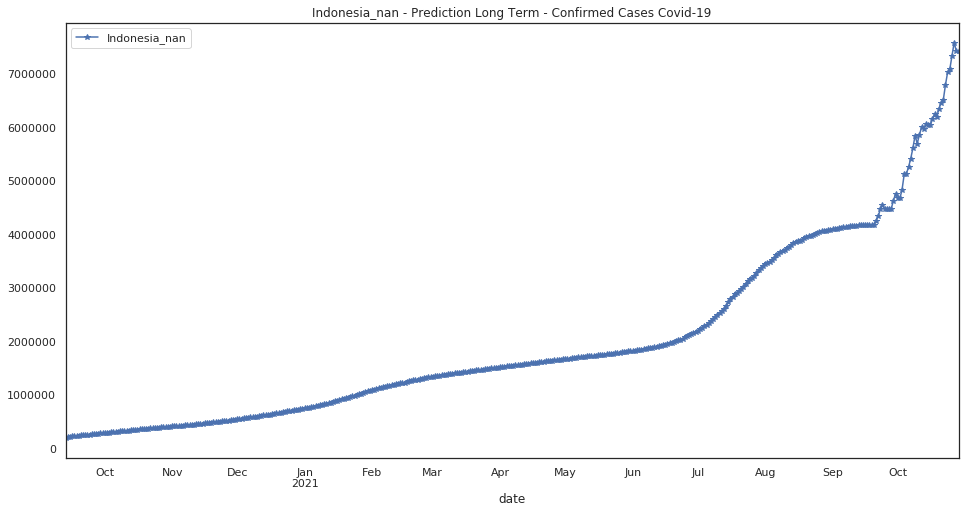

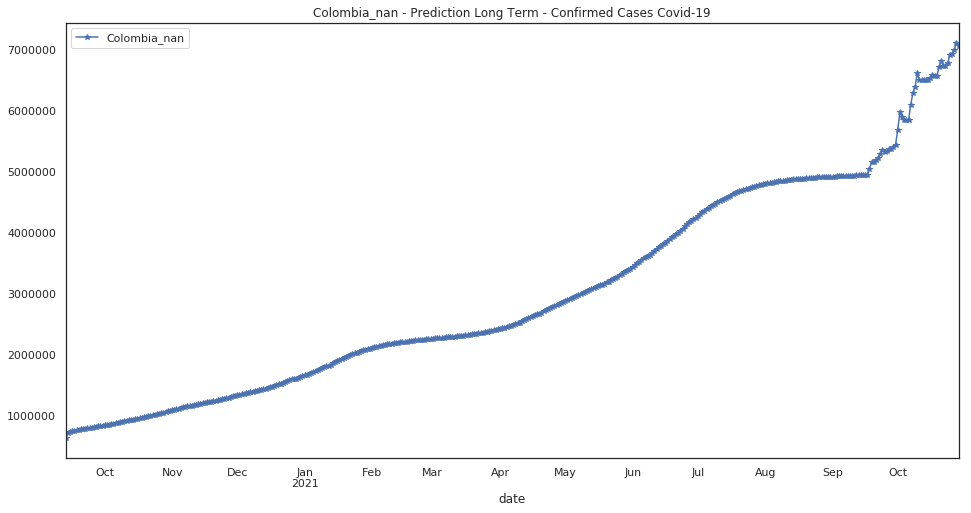

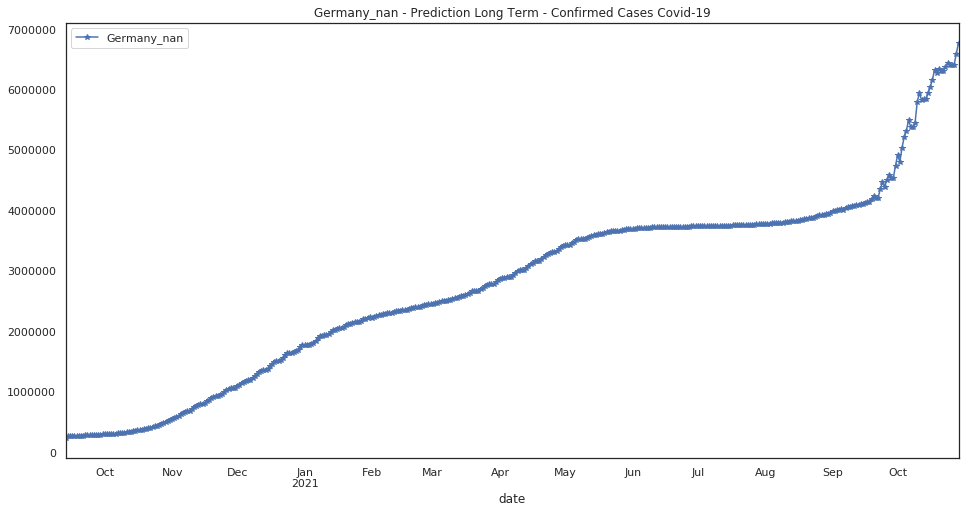

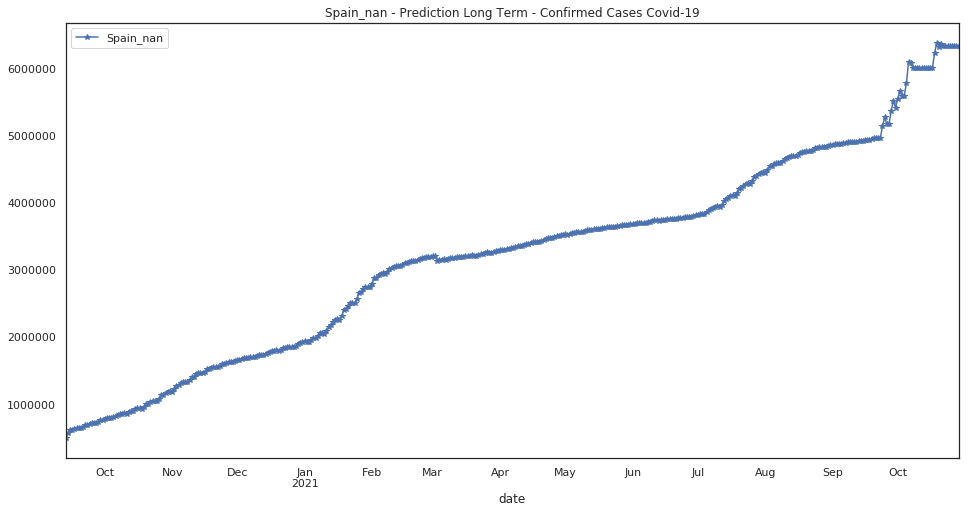

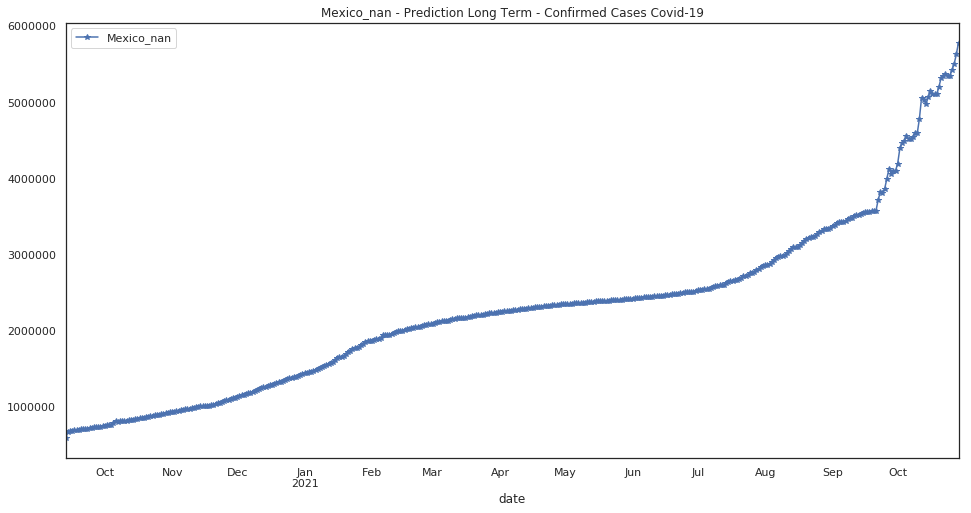

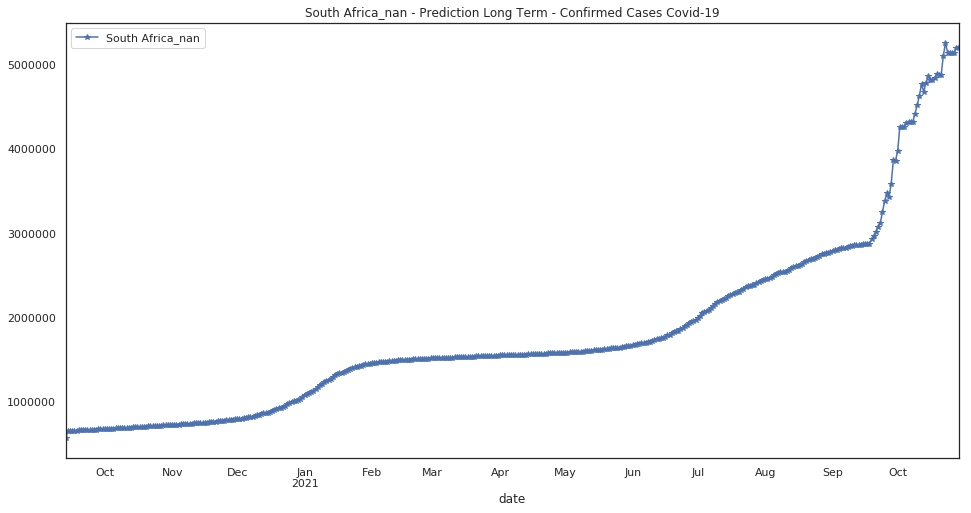

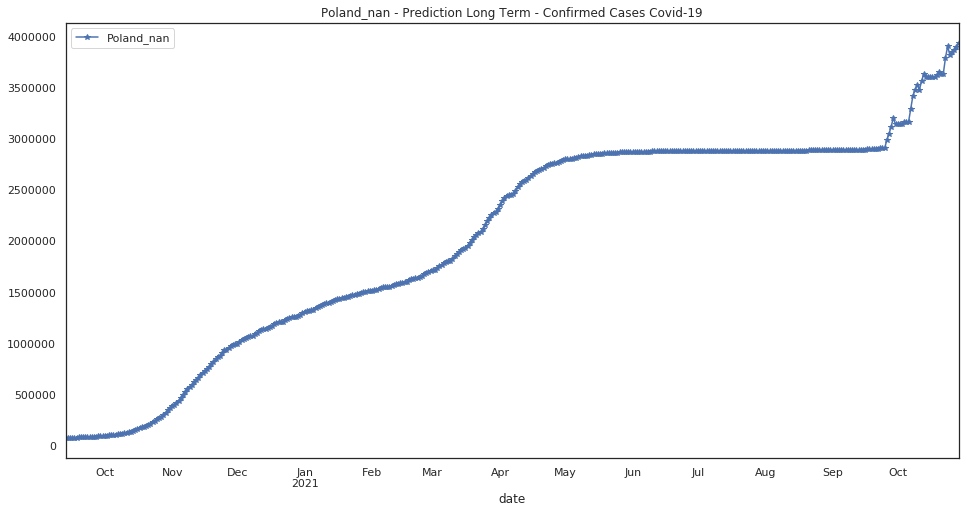

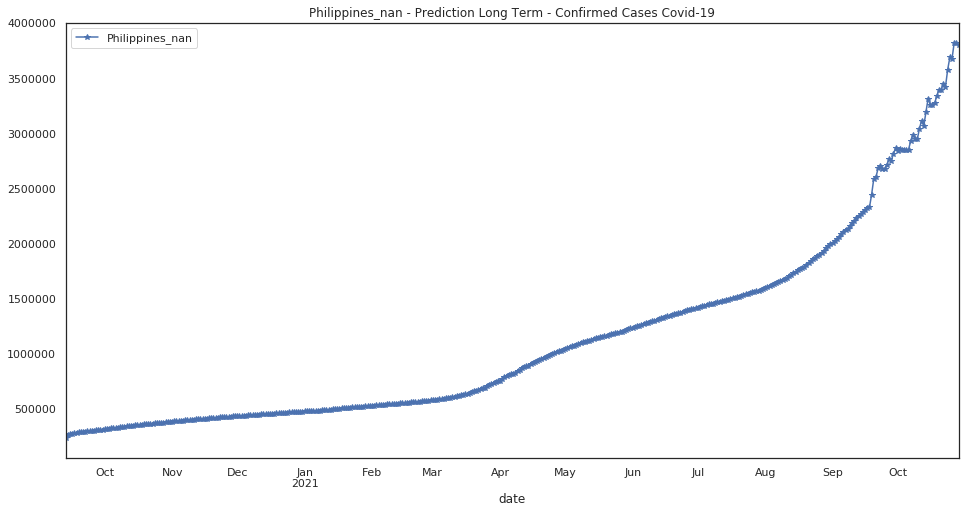

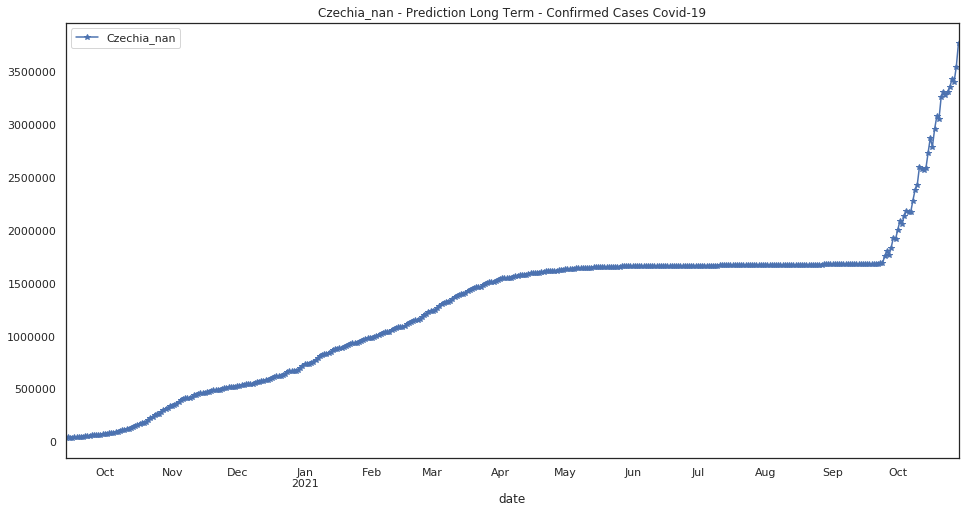

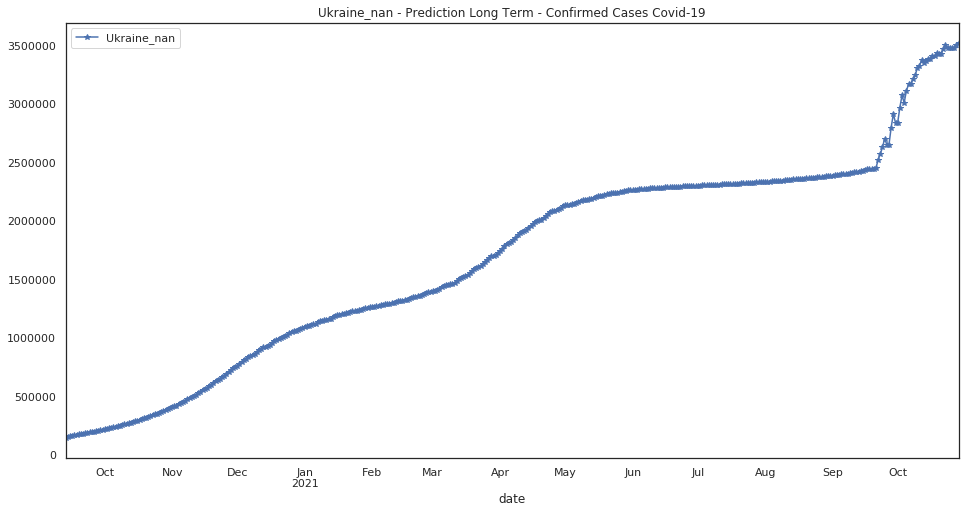

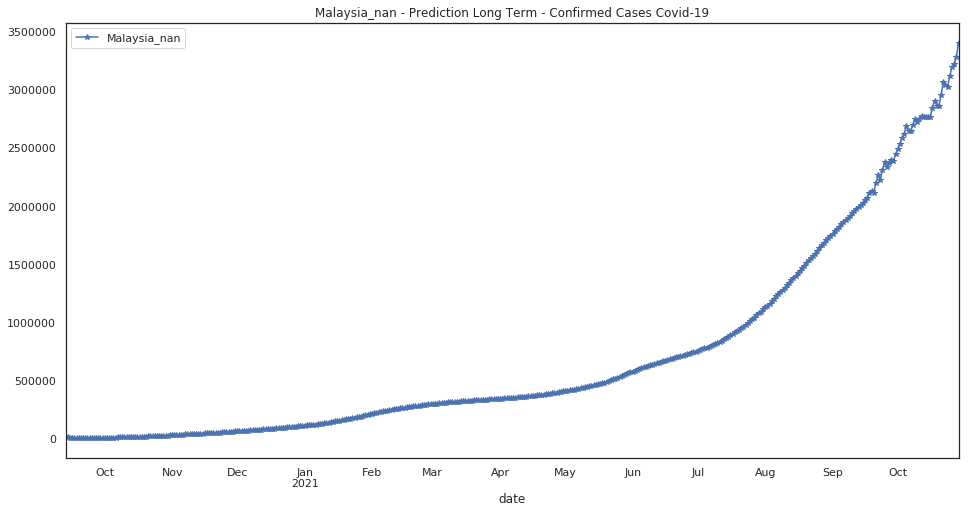

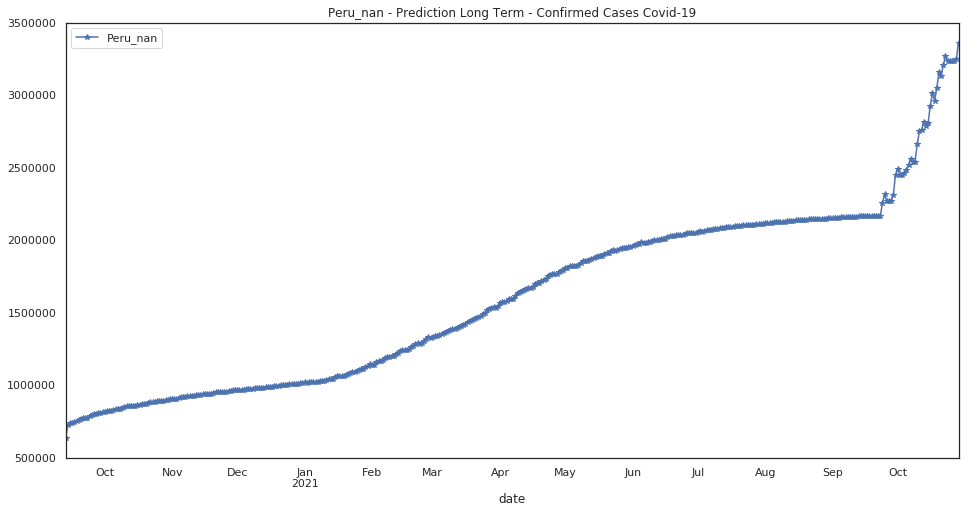

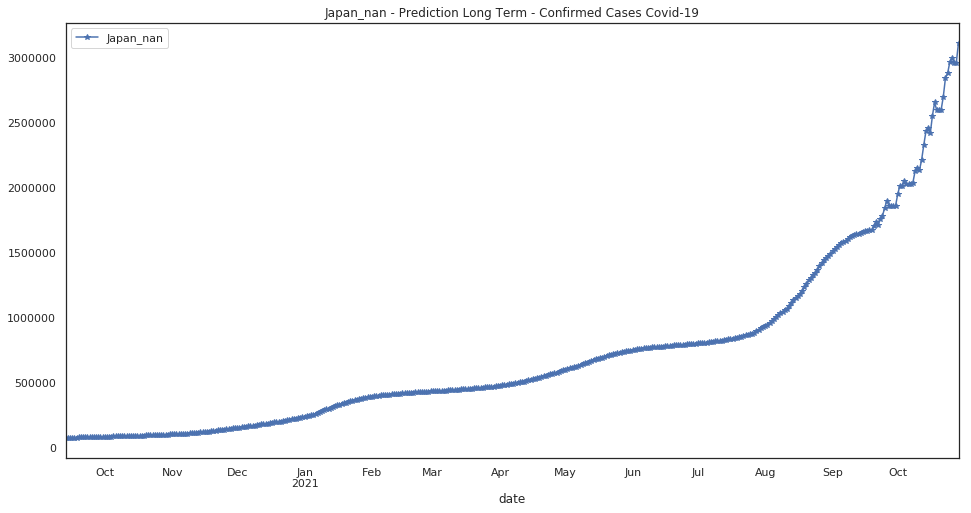

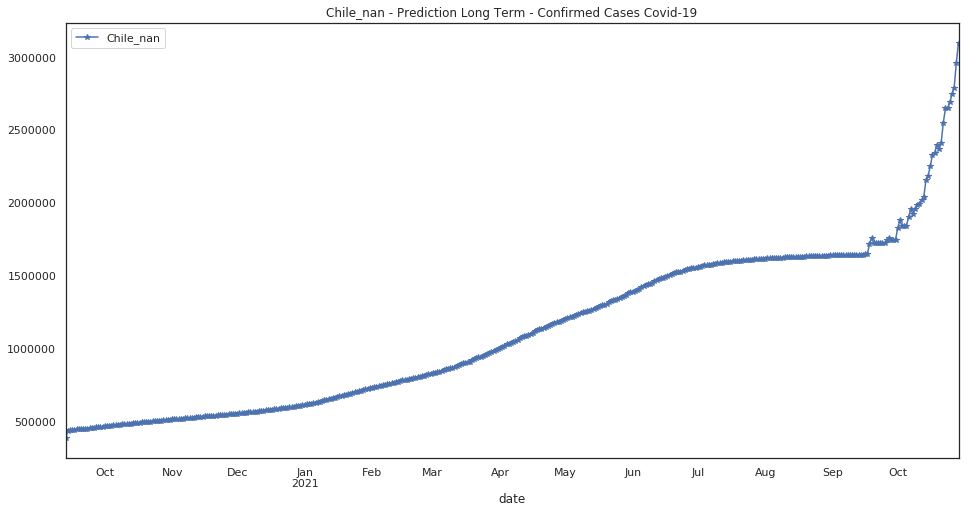

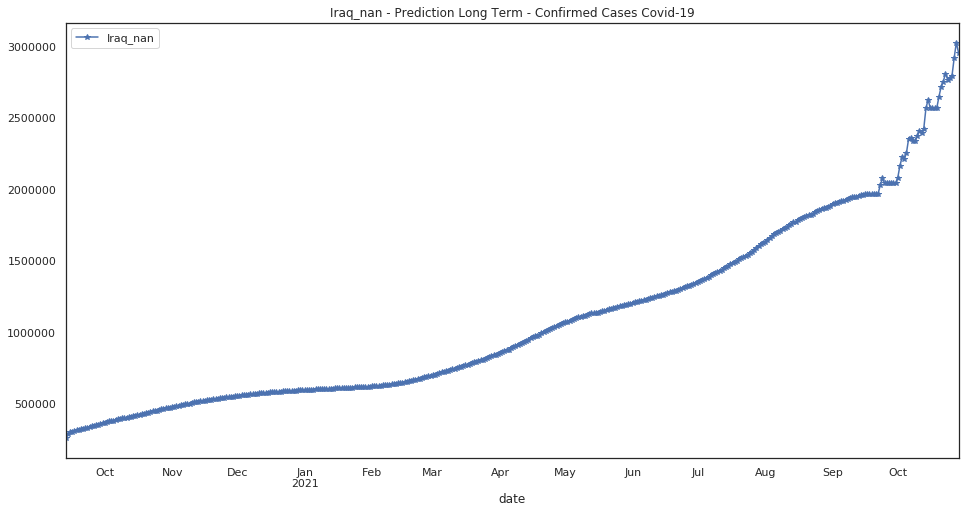

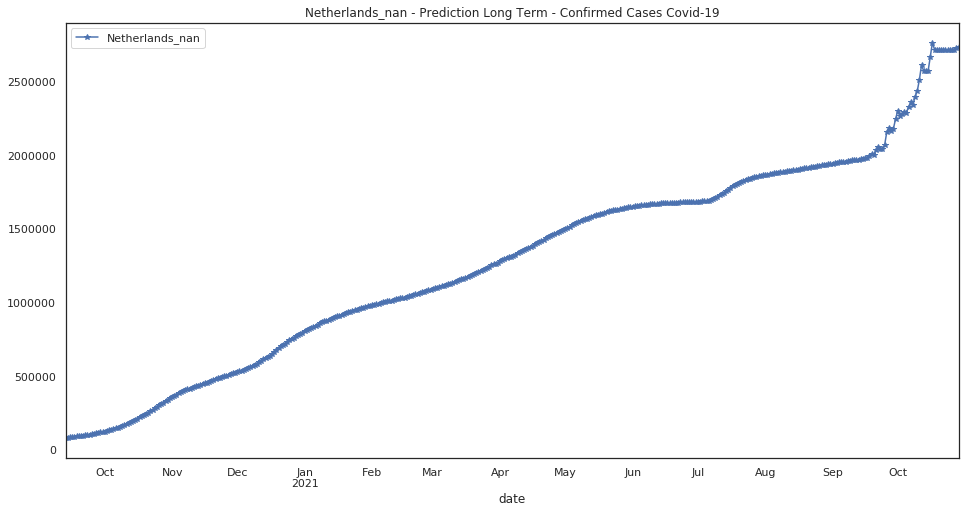

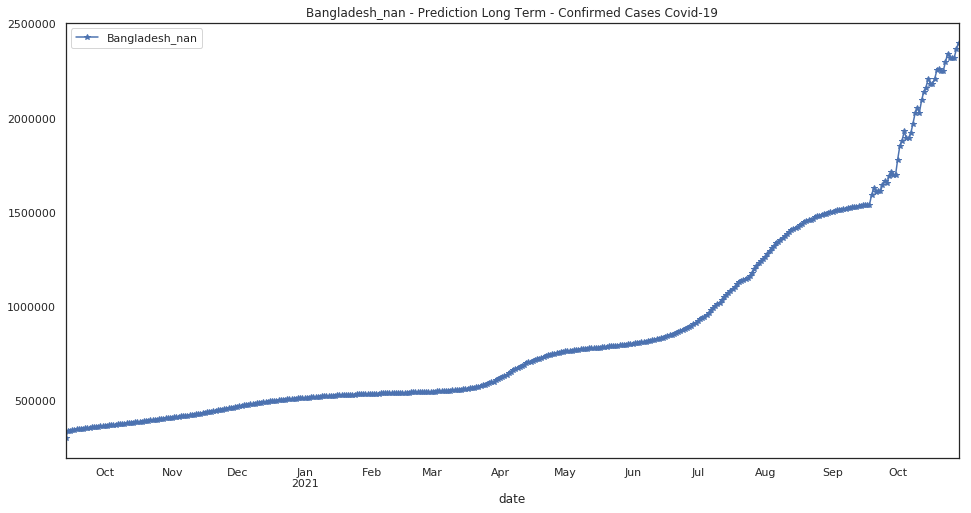

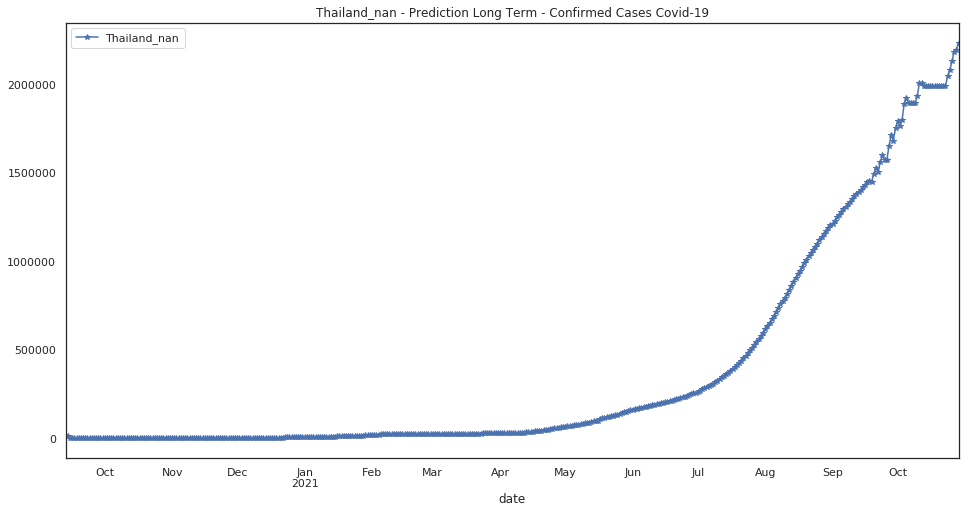

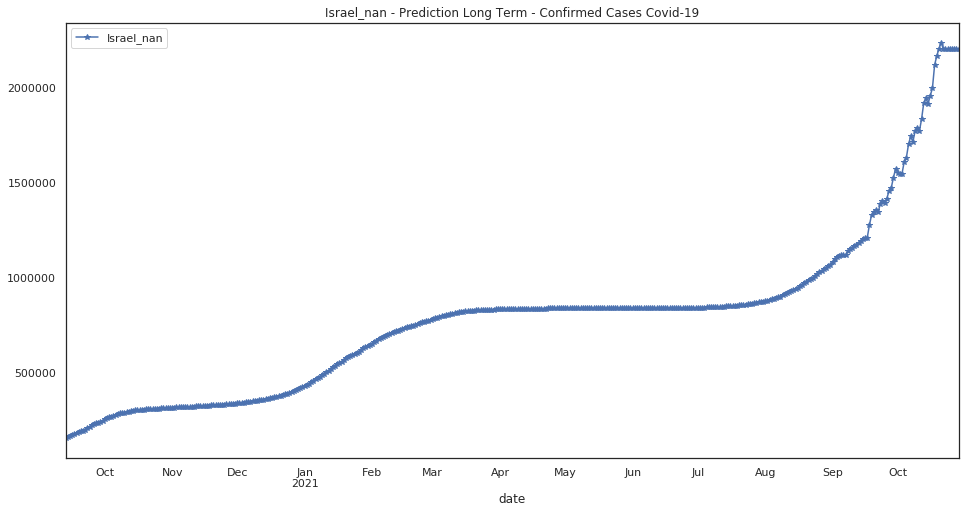

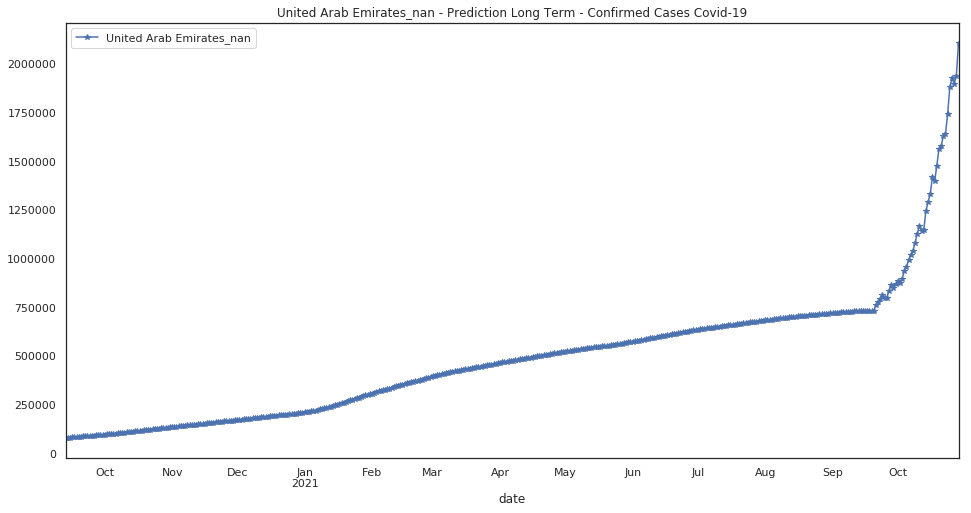

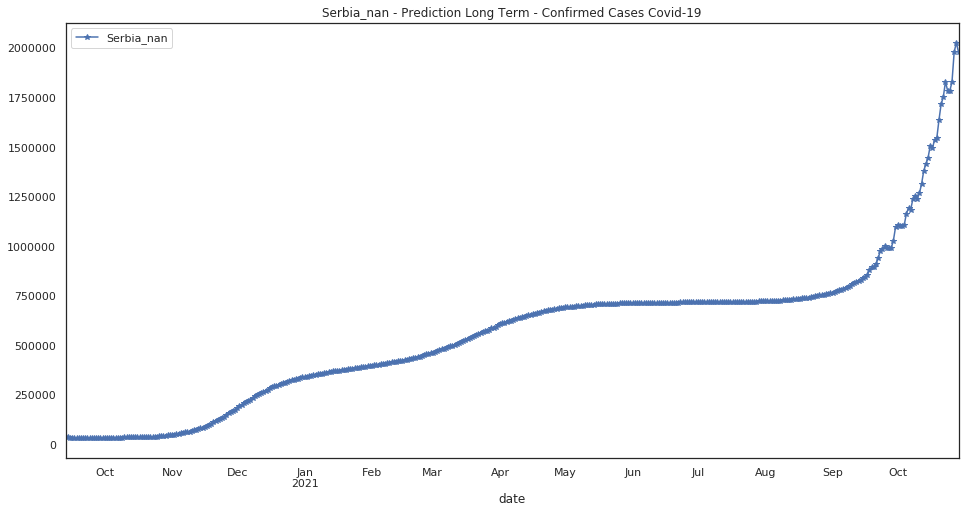

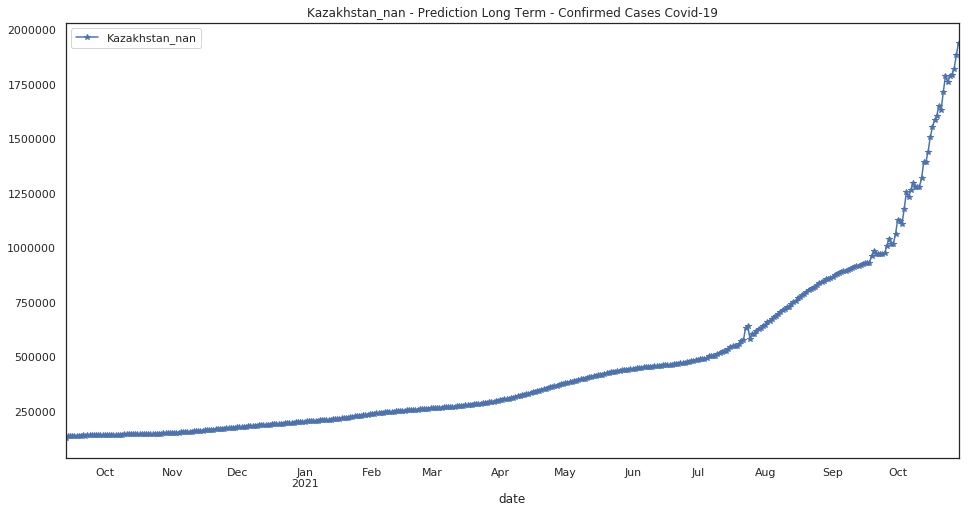

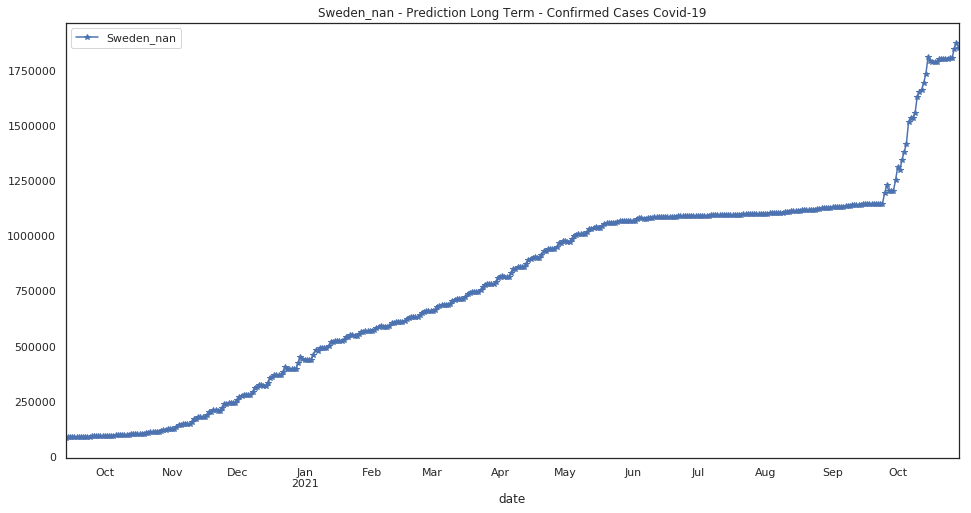

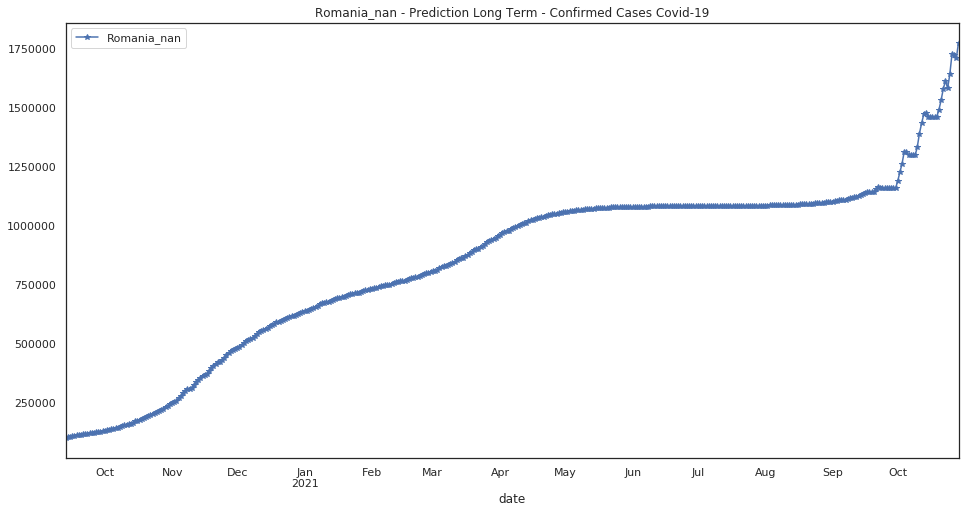

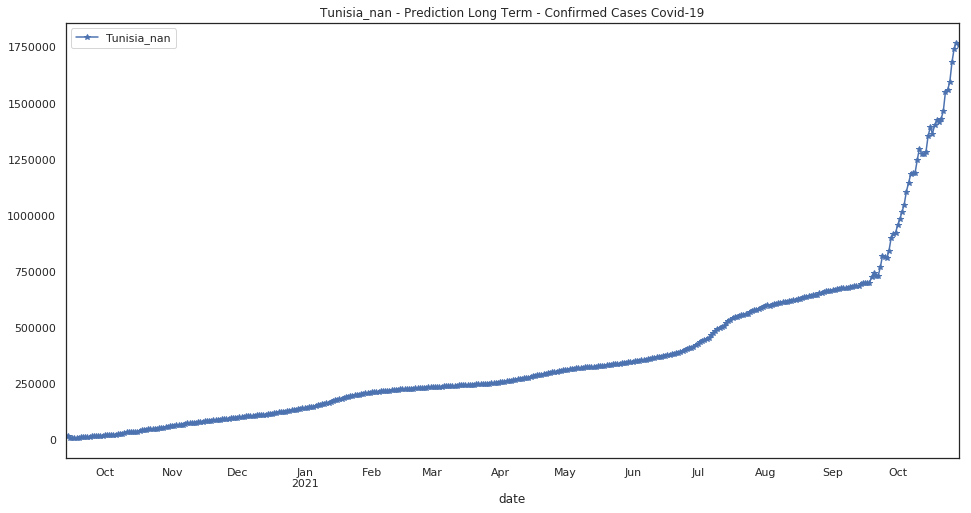

In [78]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

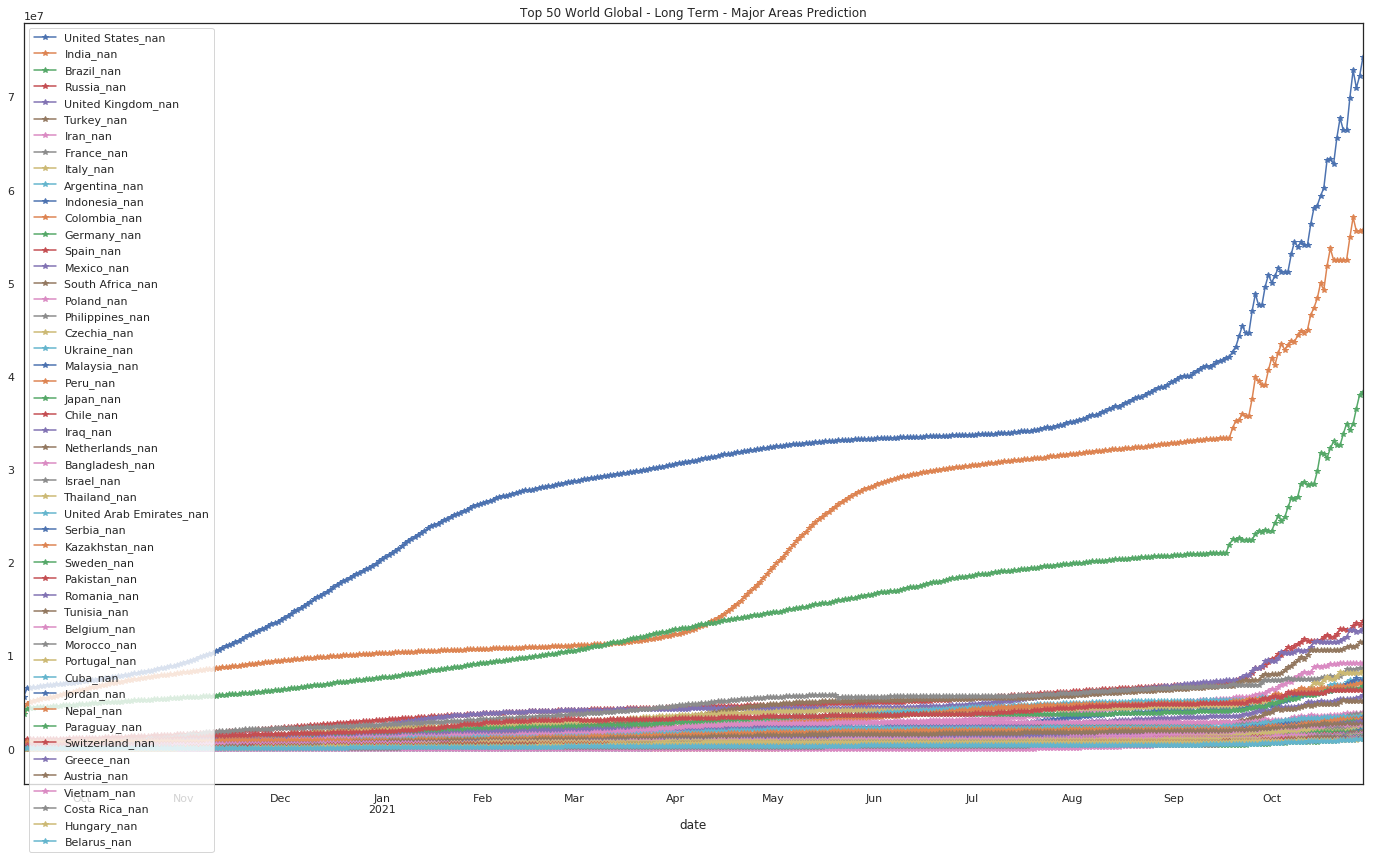

In [79]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

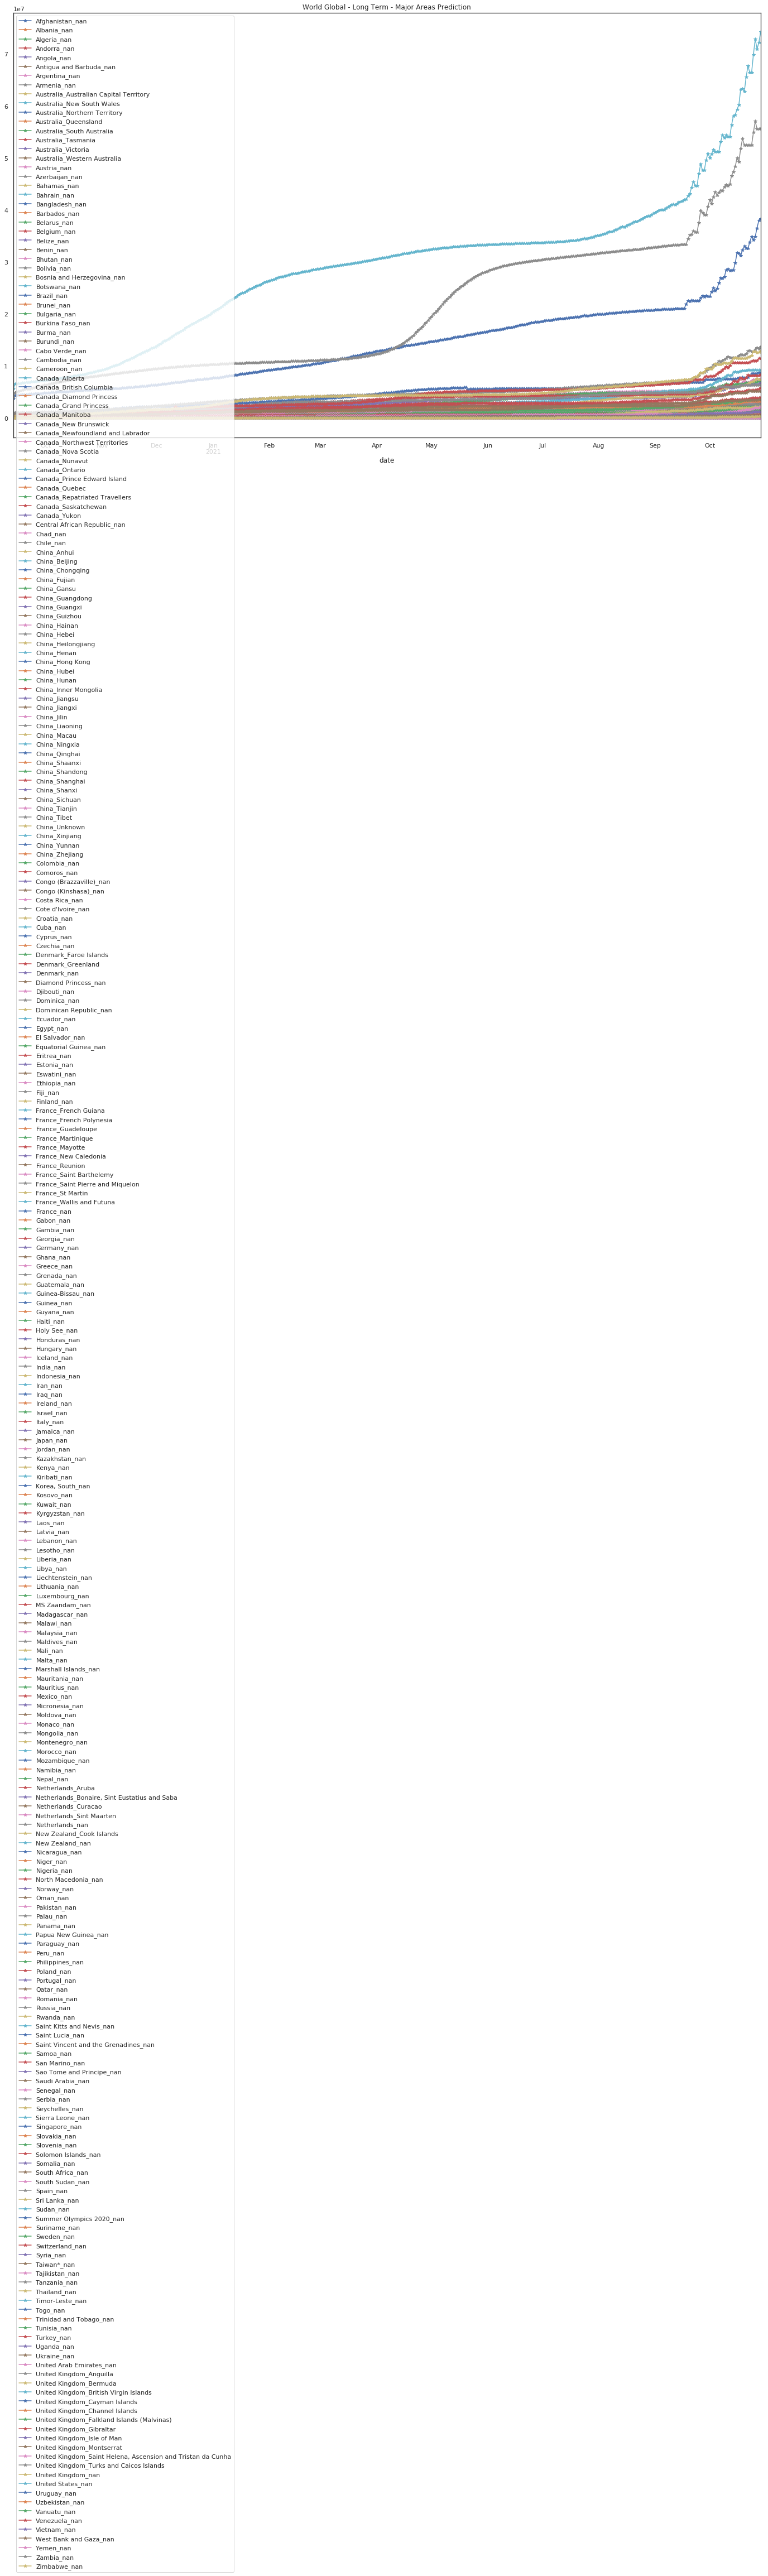

In [80]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [81]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [82]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-10-28          41108.0      20030.0      57075.0       4507.0   
2020-10-29          41211.0      20309.0      57393.0       4564.0   
2020-10-30          41337.0      20626.0      57707.0       4676.0   
2020-10-31          41414.0      20880.0      58005.0       4680.0   
2020-11-01          41485.0      21194.0      58315.0       4761.0   
2020-11-02          41567.0      21519.0      58630.0       4872.0   
2020-11-03          41682.0      21891.0      59010.0       4901.0   
2020-11-04          41800.0      22296.0      59571.0       5071.0   
2020-11-05          41878.0      22718.0      60247.0       5045.0   
2020-11-06          41995.0      23203.0      60912.0       5135.0   
2020-11-07          42054.0      23701.0      61493.0       5396.0   
2020-11-08          42087.0      24199.0      62116.0       5319.0   
2020-11-09          42208.0      24722.0      62768.0       5431.0   
2020-11-10          42357.0      25273.0      63473.0       5506.0   
2020-11-11          42531.0      25788.0      64301.0       5565.0   
2020-11-12          42691.0      26203.0      65158.0       5567.0   
2020-11-13          42865.0      26665.0      66038.0       5715.0   
2020-11-14          43050.0      27190.0      66883.0       5725.0   
2020-11-15          43118.0      27783.0      67717.0       5922.0   
2020-11-16          43270.0      28407.0      68613.0       5872.0   
2020-11-17          43469.0      29099.0      69603.0       5963.0   
2020-11-18          43672.0      29829.0      70663.0       6043.0   
2020-11-19          43921.0      30608.0      71698.0       6031.0   
2020-11-20          44273.0      31444.0      72783.0       6130.0   
2020-11-21          44554.0      32197.0      73832.0       6172.0   
2020-11-22          44591.0      32762.0      74868.0       6235.0   
2020-11-23          44721.0      33480.0      75897.0       6307.0   
2020-11-24          45013.0      34252.0      76970.0       6348.0   
2020-11-25          45319.0      34901.0      78055.0       6416.0   
2020-11-26          45560.0      35552.0      79090.0       6488.0   
...                     ...          ...          ...          ...   
2021-09-30         157027.0     189178.0     224058.0      20472.0   
2021-10-01         157027.0     192207.0     219654.0      20472.0   
2021-10-02         157100.0     189119.0     220367.0      20472.0   
2021-10-03         157100.0     189119.0     220528.0      20497.0   
2021-10-04         157100.0     196452.0     220528.0      20500.0   
2021-10-05         158766.0     208639.0     220528.0      20671.0   
2021-10-06         159841.0     217009.0     220528.0      20671.0   
2021-10-07         159010.0     219170.0     229370.0      21270.0   
2021-10-08         159010.0     218649.0     235250.0      21662.0   
2021-10-09         158955.0     230694.0     231185.0      21773.0   
2021-10-10         164346.0     234855.0     231620.0      21773.0   
2021-10-11         167879.0     231838.0     231390.0      22585.0   
2021-10-12         165282.0     241552.0     231390.0      22849.0   
2021-10-13         165297.0     251559.0     239839.0      23822.0   
2021-10-14         165282.0     249428.0     246000.0      24401.0   
2021-10-15         165282.0     252158.0     242067.0      24471.0   
2021-10-16         165282.0     262634.0     242067.0      25888.0   
2021-10-17         168242.0     269286.0     248708.0      26341.0   
2021-10-18         174461.0     265772.0     253669.0      26446.0   
2021-10-19         175060.0     278248.0     250637.0      27410.0   
2021-10-20         173281.0     288174.0     254138.0      28390.0   
2021-10-21         177642.0     282308.0     262062.0      29078.0   
2021-10-22         183556.0     282308.0     262920.0      29576.0   
2021-10-23         189754.0     296444.0     261155.0      29730.0   
2021-10-24

In [83]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [84]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [85]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [86]:
heatmap_m[:]

region        Lat        Long  \
0                                      Afghanistan_nan  33.939110   67.709953   
1                                          Albania_nan  41.153300   20.168300   
2                                          Algeria_nan  28.033900    1.659600   
3                                          Andorra_nan  42.506300    1.521800   
4                                           Angola_nan -11.202700   17.873900   
5                              Antigua and Barbuda_nan  17.060800  -61.796400   
6                                        Argentina_nan -38.416100  -63.616700   
7                                          Armenia_nan  40.069100   45.038200   
8               Australia_Australian Capital Territory -35.473500  149.012400   
9                            Australia_New South Wales -33.868800  151.209300   
10                        Australia_Northern Territory -12.463400  130.845600   
11                                Australia_Queensland -27.469800  153.025100   
12                           Australia_South Australia -34.928500  138.600700   
13                                  Australia_Tasmania -42.882100  147.327200   
14                                  Australia_Victoria -37.813600  144.963100   
15                         Australia_Western Australia -31.950500  115.860500   
16                                         Austria_nan  47.516200   14.550100   
17                                      Azerbaijan_nan  40.143100   47.576900   
18                                         Bahamas_nan  25.025885  -78.035889   
19                                         Bahrain_nan  26.027500   50.550000   
20                                      Bangladesh_nan  23.685000   90.356300   
21                                        Barbados_nan  13.193900  -59.543200   
22                                         Belarus_nan  53.709800   27.953400   
23                                         Belgium_nan  50.833300    4.469936   
24                                          Belize_nan  17.189900  -88.497600   
25                                           Benin_nan   9.307700    2.315800   
26                                          Bhutan_nan  27.514200   90.433600   
27                                         Bolivia_nan -16.290200  -63.588700   
28                          Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                        Botswana_nan -22.328500   24.684900   
..                                                 ...        ...         ...   
255                                    Timor-Leste_nan  -8.874217  125.727539   
256                                           Togo_nan   8.619500    0.824800   
257                            Trinidad and Tobago_nan  10.691800  -61.222500   
258                                        Tunisia_nan  33.886917    9.537499   
259                                         Turkey_nan  38.963700   35.243300   
260                                  United States_nan  40.000000 -100.000000   
261                                         Uganda_nan   1.373333   32.290275   
262                                        Ukraine_nan  48.379400   31.165600   
263                           United Arab Emirates_nan  23.424076   53.847818   
264                            United Kingdom_Anguilla  18.220600  -63.068600   
265                             United Kingdom_Bermuda  32.307800  -64.750500   
266              United Kingdom_British Virgin Islands  18.420700  -64.640000   
267                      United Kingdom_Cayman Islands  19.313300  -81.254600   
268                     United Kingdom_Channel Islands  49.372300   -2.364400   
269         United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
270                           United Kingdom_Gibraltar  36.140800   -5.353600   
271                         United Kingdom_Isle of Man  54.236100   -4.548100   
272                          United Kingdom_Montserrat  16.742498  -62.187366  

In [87]:
# Fill empty lat,long with 0
heatmap_m['Lat']=heatmap_m['Lat'].fillna(0)
heatmap_m['Long']=heatmap_m['Long'].fillna(0)
#
heatmap_m_fn="heatmap_m_"+str(num_days_R_prediction)+".csv"
heatmap_m.to_csv(r'data/'+heatmap_m_fn, index = False, header=True)

In [88]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
backday=num_BackTrack_Days
ndayarray=-1-backday-num_days_R_prediction
n2dayarray=-1-backday-(num_days_R_prediction*2)

for lat,lng,num,totpred,lastday7DayAvg,today7DayAvg in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]], \
                                                           (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg, \
                                                           (heatmap_m[heatmap_m.columns[ndayarray]]-heatmap_m[heatmap_m.columns[n2dayarray]])/ndaysavg):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' Current7DayAVG='+str(round(today7DayAvg))+' Predicted7DayAVG='+str(round(lastday7DayAvg))+' ConfTotPred='+str(round(totpred))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [89]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      16               Austria_nan  47.516200   14.550100   
2      20            Bangladesh_nan  23.685000   90.356300   
3      22               Belarus_nan  53.709800   27.953400   
4      23               Belgium_nan  50.833300    4.469936   
5      30                Brazil_nan -14.235000  -51.925300   
6      59                 Chile_nan -35.675100  -71.543000   
7      94              Colombia_nan   4.570900  -74.297300   
8      98            Costa Rica_nan   9.748900  -83.753400   
9     101                  Cuba_nan  21.521757  -77.781167   
10    103               Czechia_nan  49.817500   15.473000   
11    132                France_nan  46.227600    2.213700   
12    137               Germany_nan  51.165691   10.451526   
13    139                Greece_nan  39.074200   21.824300   
14    149               Hungary_nan  47.162500   19.503300   
15    151                 India_nan  20.593684   78.962880   
16    152             Indonesia_nan  -0.789300  113.921300   
17    153                  Iran_nan  32.427908   53.688046   
18    154                  Iraq_nan  33.223191   43.679291   
19    156                Israel_nan  31.046051   34.851612   
20    157                Israel_nan  31.046051   34.851612   
21    158                 Italy_nan  41.871940   12.567380   
22    160                 Japan_nan  36.204824  138.252924   
23    161                Jordan_nan  31.240000   36.510000   
24    162            Kazakhstan_nan  48.019600   66.923700   
25    182              Malaysia_nan   4.210484  101.975766   
26    189                Mexico_nan  23.634500 -102.552800   
27    195               Morocco_nan  31.791700   -7.092600   
28    198                 Nepal_nan  28.166700   84.250000   
29    203           Netherlands_nan  52.132600    5.291300   
30    212              Pakistan_nan  30.375300   69.345100   
31    216              Paraguay_nan -23.442500  -58.443800   
32    217                  Peru_nan  -9.190000  -75.015200   
33    218           Philippines_nan  12.879721  121.774017   
34    219                Poland_nan  51.919400   19.145100   
35    220              Portugal_nan  39.399900   -8.224500   
36    222               Romania_nan  45.943200   24.966800   
37    223                Russia_nan  61.524010  105.318756   
38    233                Serbia_nan  44.016500   21.005900   
39    241          South Africa_nan -30.559500   22.937500   
40    243                 Spain_nan  40.463667   -3.749220   
41    248                Sweden_nan  60.128161   18.643501   
42    249           Switzerland_nan  46.818200    8.227500   
43    254              Thailand_nan  15.870032  100.992541   
44    258               Tunisia_nan  33.886917    9.537499   
45    259                Turkey_nan  38.963700   35.243300   
46    260         United States_nan  40.000000 -100.000000   
47    262               Ukraine_nan  48.379400   31.165600   
48    263  United Arab Emirates_nan  23.424076   53.847818   
49    275        United Kingdom_nan  55.378100   -3.436000   
50    280               Vietnam_nan  14.058324  108.277199   

    2020-09-13 00:00:00  2020-09-14 00:00:00  2020-09-15 00:00:00  \
0              489676.0             555537.0             579038.0   
1               38171.0              38502.0              33541.0   
2              301238.0             337520.0             340228.0   
3               73621.0              74173.0              74360.0   
4               90287.0              93455.0              94306.0   
5             3752429.0            4330455.0            4383299.0   
6              385275.0             434748.0             437118.0   
7              628643.0             716319.0             728929.0   
8               57442.0              59090.0              57361.0   
9               13560.0              13596.0               4726.0   
10              4079

In [90]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
backday=num_BackTrack_Days
ndayarray=-1-backday-num_days_R_prediction
n2dayarray=-1-backday-(num_days_R_prediction*2)

for lat2,lng2,num2,totpred2,lastday7DayAvg2,today7DayAvg2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], \
                                                                (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg, \
                                                                (heatmap_m2[heatmap_m2.columns[ndayarray]]-heatmap_m2[heatmap_m2.columns[n2dayarray]])/ndaysavg):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' Current7DayAvg='+str(round(today7DayAvg2))+' Predicted7DayAvg='+str(round(lastday7DayAvg2))+' ConfTotPred='+str(round(totpred2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [91]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [92]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [93]:
exit()